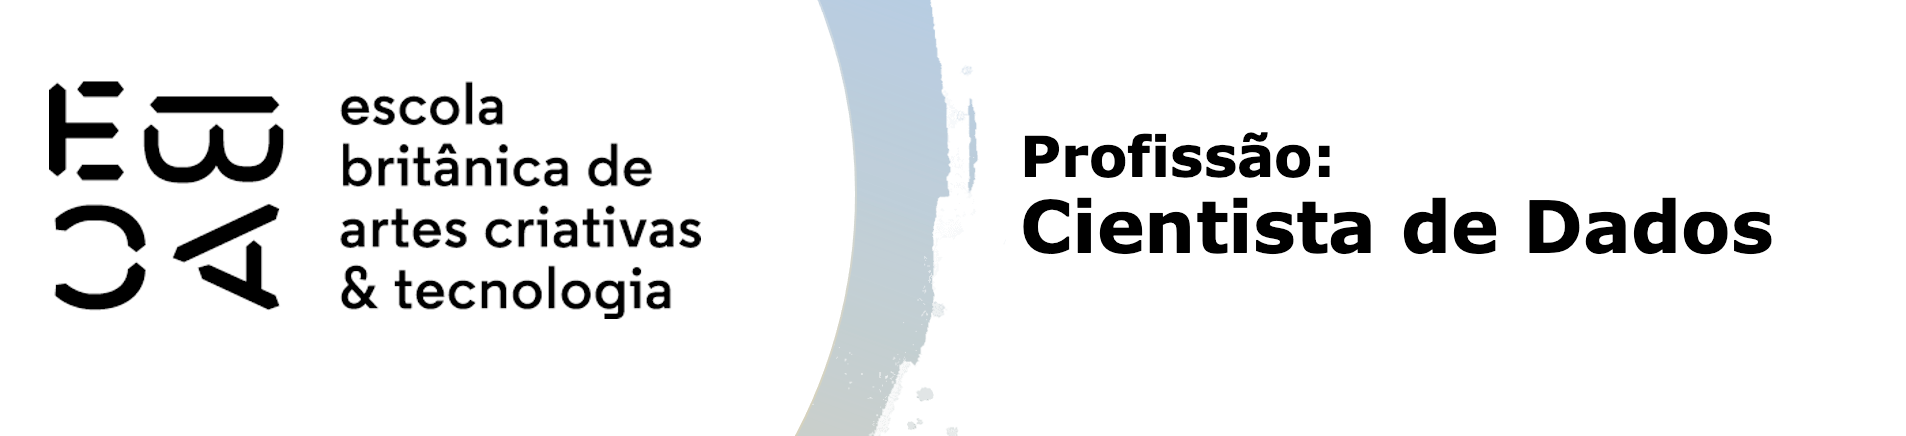

# Tarefa II

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [2]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [3]:
import pandas as pd

# Carregar o DataFrame
df = pd.read_feather('C:/Users/igors/OneDrive/Cursos/EBAC/03 - Profissão Cientista de Dados/03 - Cientista de Dados/Module 38 - Regressão Logística II/Exercício 2/credit_scoring.ftr')

# Converter 'data_ref' para datetime, caso não esteja
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Identificar as datas de referência únicas e ordená-las
datas_unicas = df['data_ref'].sort_values().unique()

# Selecionar as três últimas datas para validação (out-of-time)
datas_oot = datas_unicas[-3:]

# Criar um DataFrame de validação (df_oot) com as safras out-of-time
df_oot = df[df['data_ref'].isin(datas_oot)].copy()

# Criar um DataFrame de treino (df_train) com as safras restantes
df_train = df[~df['data_ref'].isin(datas_oot)].copy()

print("--- Datas Únicas no Dataset ---")
print(datas_unicas)

print("\n--- Safras Selecionadas para Validação (Out-of-Time) ---")
print(datas_oot)

print("\n--- Dimensões do DataFrame de Treino ---")
print(df_train.shape)

print("\n--- Dimensões do DataFrame de Validação (Out-of-Time) ---")
print(df_oot.shape)

--- Datas Únicas no Dataset ---
<DatetimeArray>
['2015-01-01 00:00:00', '2015-02-01 00:00:00', '2015-03-01 00:00:00',
 '2015-04-01 00:00:00', '2015-05-01 00:00:00', '2015-06-01 00:00:00',
 '2015-07-01 00:00:00', '2015-08-01 00:00:00', '2015-09-01 00:00:00',
 '2015-10-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00',
 '2016-01-01 00:00:00', '2016-02-01 00:00:00', '2016-03-01 00:00:00']
Length: 15, dtype: datetime64[ns]

--- Safras Selecionadas para Validação (Out-of-Time) ---
<DatetimeArray>
['2016-01-01 00:00:00', '2016-02-01 00:00:00', '2016-03-01 00:00:00']
Length: 3, dtype: datetime64[ns]

--- Dimensões do DataFrame de Treino ---
(600000, 15)

--- Dimensões do DataFrame de Validação (Out-of-Time) ---
(150000, 15)


## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [4]:
import pandas as pd

# --- 3. Descritiva Básica Univariada ---
print("--- Descritiva Básica Univariada ---")

# Contagem de linhas para cada mês em 'data_ref' (no DataFrame original)
print("\n--- Número de linhas para cada mês em 'data_ref' (DataFrame completo) ---")
print(df['data_ref'].value_counts().sort_index())

print("\n--- Descritiva para Variáveis Quantitativas ---")
# Seleciona as colunas numéricas, excluindo 'index'
quantitative_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('index')

for col in quantitative_cols:
    print(f"\n--- Coluna: {col} ---")
    print(df[col].describe())

    if col == 'tempo_emprego':
        nulos = df[col].isnull().sum()
        percent_nulos = (nulos / len(df)) * 100
        print(f"Valores Nulos em '{col}': {nulos} ({percent_nulos:.2f}%)")

    if col == 'renda':
        print(f"Percentil 95: {df[col].quantile(0.95):.2f}")
        print(f"Percentil 99: {df[col].quantile(0.99):.2f}")
        print(f"Percentil 99.9: {df[col].quantile(0.999):.2f}")

print("\n--- Descritiva para Variáveis Qualitativas (Categóricas e Booleana) ---")
# Seleciona colunas do tipo 'object' e 'bool', excluindo 'data_ref'
# A coluna 'mau' é a target, mas sua distribuição é importante aqui
qualitative_cols = df.select_dtypes(include=['object', 'bool']).columns.drop('data_ref', errors='ignore')

for col in qualitative_cols:
    print(f"\n--- Coluna: {col} ---")
    print(df[col].value_counts())
    if col == 'mau':
        # Para a variável resposta 'mau', mostramos também a porcentagem
        percent_mau = df[col].value_counts(normalize=True)[True] * 100
        print(f"Porcentagem de 'True' (mau pagador): {percent_mau:.2f}%")
    else:
        print(f"Total de valores não nulos: {df[col].count()}")

print("\n--- Análise Descritiva Concluída ---")

--- Descritiva Básica Univariada ---

--- Número de linhas para cada mês em 'data_ref' (DataFrame completo) ---
data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

--- Descritiva para Variáveis Quantitativas ---

--- Coluna: qtd_filhos ---
count    750000.000000
mean          0.433251
std           0.739379
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          14.000000
Name: qtd_filhos, dtype: float64

--- Coluna: idade ---
count    750000.000000
mean         43.804733
std          11.229868
min          22.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          68.000000
Name: idade, dtype: float64

--- Coluna: tempo_empre

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável


--- Análise Bivariada: Variáveis Quantitativas vs. 'mau' ---


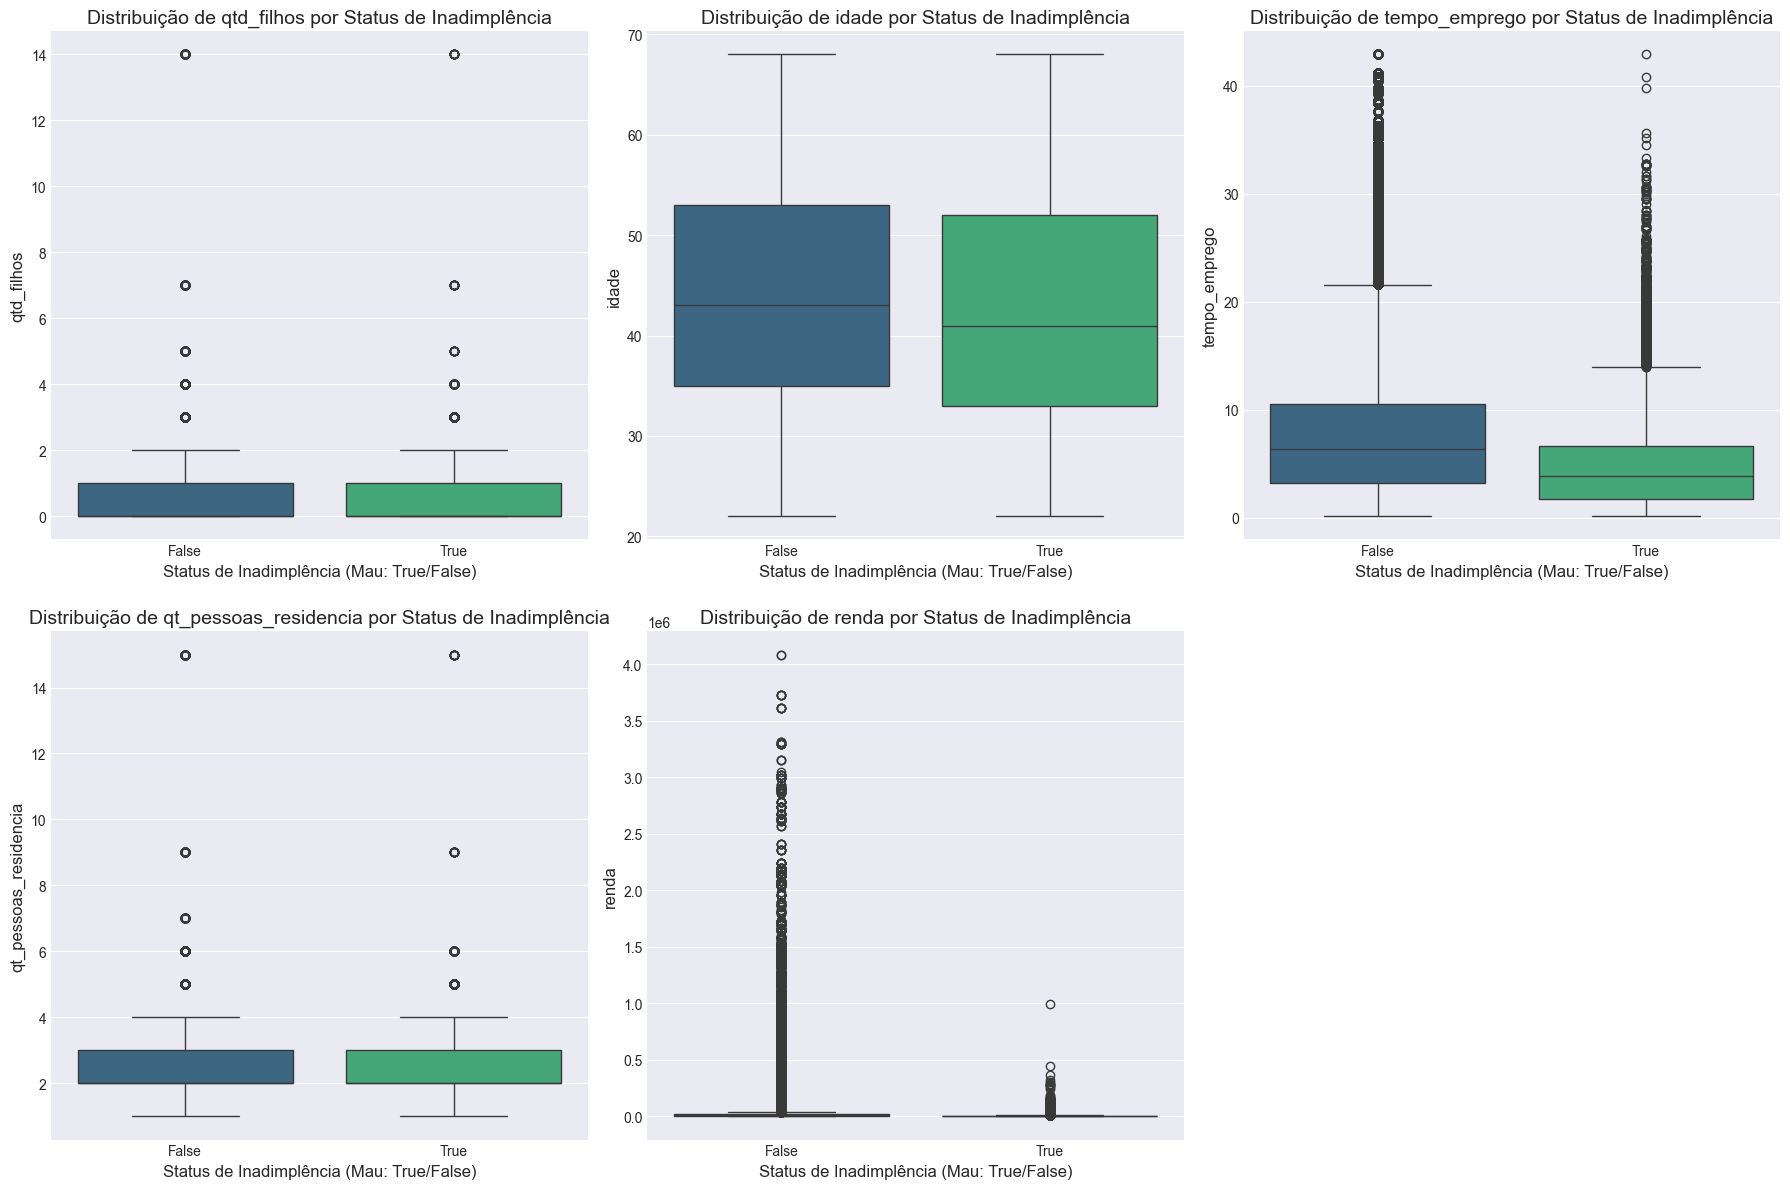


--- Estatísticas (Média e Mediana) das Variáveis Quantitativas por 'mau' ---

--- qtd_filhos ---
           mean  median
mau                    
False  0.431739     0.0
True   0.451068     0.0

--- idade ---
            mean  median
mau                     
False  43.896274    43.0
True   42.725543    41.0

--- tempo_emprego ---
           mean    median
mau                      
False  8.004300  6.345205
True   4.695965  3.854795

--- qt_pessoas_residencia ---
           mean  median
mau                    
False  2.211221     2.0
True   2.224272     2.0

--- renda ---
               mean   median
mau                         
False  24804.689618  8602.87
True    4774.871007  2507.28

--- Análise Bivariada: Variáveis Qualitativas vs. 'mau' ---

--- Coluna: sexo vs. 'mau' ---
mau    False   True     All
sexo                       
F     463950  40630  504580
M     227407  18013  245420
All   691357  58643  750000

Proporção de 'mau' por categoria:
mau       False     True 
sexo        

C:\Users\igors\AppData\Local\Temp\ipykernel_31652\2553433777.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions[True], palette='rocket')
C:\Users\igors\AppData\Local\Temp\ipykernel_31652\2553433777.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions[True], palette='rocket')



Proporção de 'mau' por categoria:
mau                   False     True 
posse_de_veiculo                     
N                 92.121043  7.878957
S                 92.274847  7.725153

--- Coluna: posse_de_imovel vs. 'mau' ---
mau               False   True     All
posse_de_imovel                       
N                224515  21793  246308
S                466842  36850  503692
All              691357  58643  750000

Proporção de 'mau' por categoria:
mau                  False     True 
posse_de_imovel                     
N                91.152135  8.847865
S                92.684021  7.315979

--- Coluna: tipo_renda vs. 'mau' ---


C:\Users\igors\AppData\Local\Temp\ipykernel_31652\2553433777.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions[True], palette='rocket')


mau                False   True     All
tipo_renda                             
Assalariado       354527  31213  385740
Bolsista             346     15     361
Empresário        159508  13204  172712
Pensionista       115825  10440  126265
Servidor público   61151   3771   64922
All               691357  58643  750000

Proporção de 'mau' por categoria:
mau                   False     True 
tipo_renda                           
Assalariado       91.908280  8.091720
Bolsista          95.844875  4.155125
Empresário        92.354903  7.645097
Pensionista       91.731675  8.268325
Servidor público  94.191491  5.808509

--- Coluna: educacao vs. 'mau' ---


C:\Users\igors\AppData\Local\Temp\ipykernel_31652\2553433777.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions[True], palette='rocket')


mau                   False   True     All
educacao                                  
Fundamental            7789    786    8575
Médio                466106  40730  506836
Pós graduação           753     59     812
Superior completo    189684  14622  204306
Superior incompleto   27025   2446   29471
All                  691357  58643  750000

Proporção de 'mau' por categoria:
mau                      False     True 
educacao                                
Fundamental          90.833819  9.166181
Médio                91.963870  8.036130
Pós graduação        92.733990  7.266010
Superior completo    92.843088  7.156912
Superior incompleto  91.700316  8.299684

--- Coluna: estado_civil vs. 'mau' ---


C:\Users\igors\AppData\Local\Temp\ipykernel_31652\2553433777.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions[True], palette='rocket')


mau            False   True     All
estado_civil                       
Casado        485953  40519  526472
Separado       39090   3481   42571
Solteiro       84214   7445   91659
União          52846   4839   57685
Viúvo          29254   2359   31613
All           691357  58643  750000

Proporção de 'mau' por categoria:
mau               False     True 
estado_civil                     
Casado        92.303674  7.696326
Separado      91.823072  8.176928
Solteiro      91.877502  8.122498
União         91.611337  8.388663
Viúvo         92.537880  7.462120

--- Coluna: tipo_residencia vs. 'mau' ---


C:\Users\igors\AppData\Local\Temp\ipykernel_31652\2553433777.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions[True], palette='rocket')
C:\Users\igors\AppData\Local\Temp\ipykernel_31652\2553433777.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions[True], palette='rocket')


mau               False   True     All
tipo_residencia                       
Aluguel            9416    933   10349
Casa             622288  52006  674294
Com os pais       30086   3146   33232
Comunitário        3012    278    3290
Estúdio            5042    353    5395
Governamental     21513   1927   23440
All              691357  58643  750000

Proporção de 'mau' por categoria:
mau                  False     True 
tipo_residencia                     
Aluguel          90.984636  9.015364
Casa             92.287341  7.712659
Com os pais      90.533221  9.466779
Comunitário      91.550152  8.449848
Estúdio          93.456905  6.543095
Governamental    91.779010  8.220990


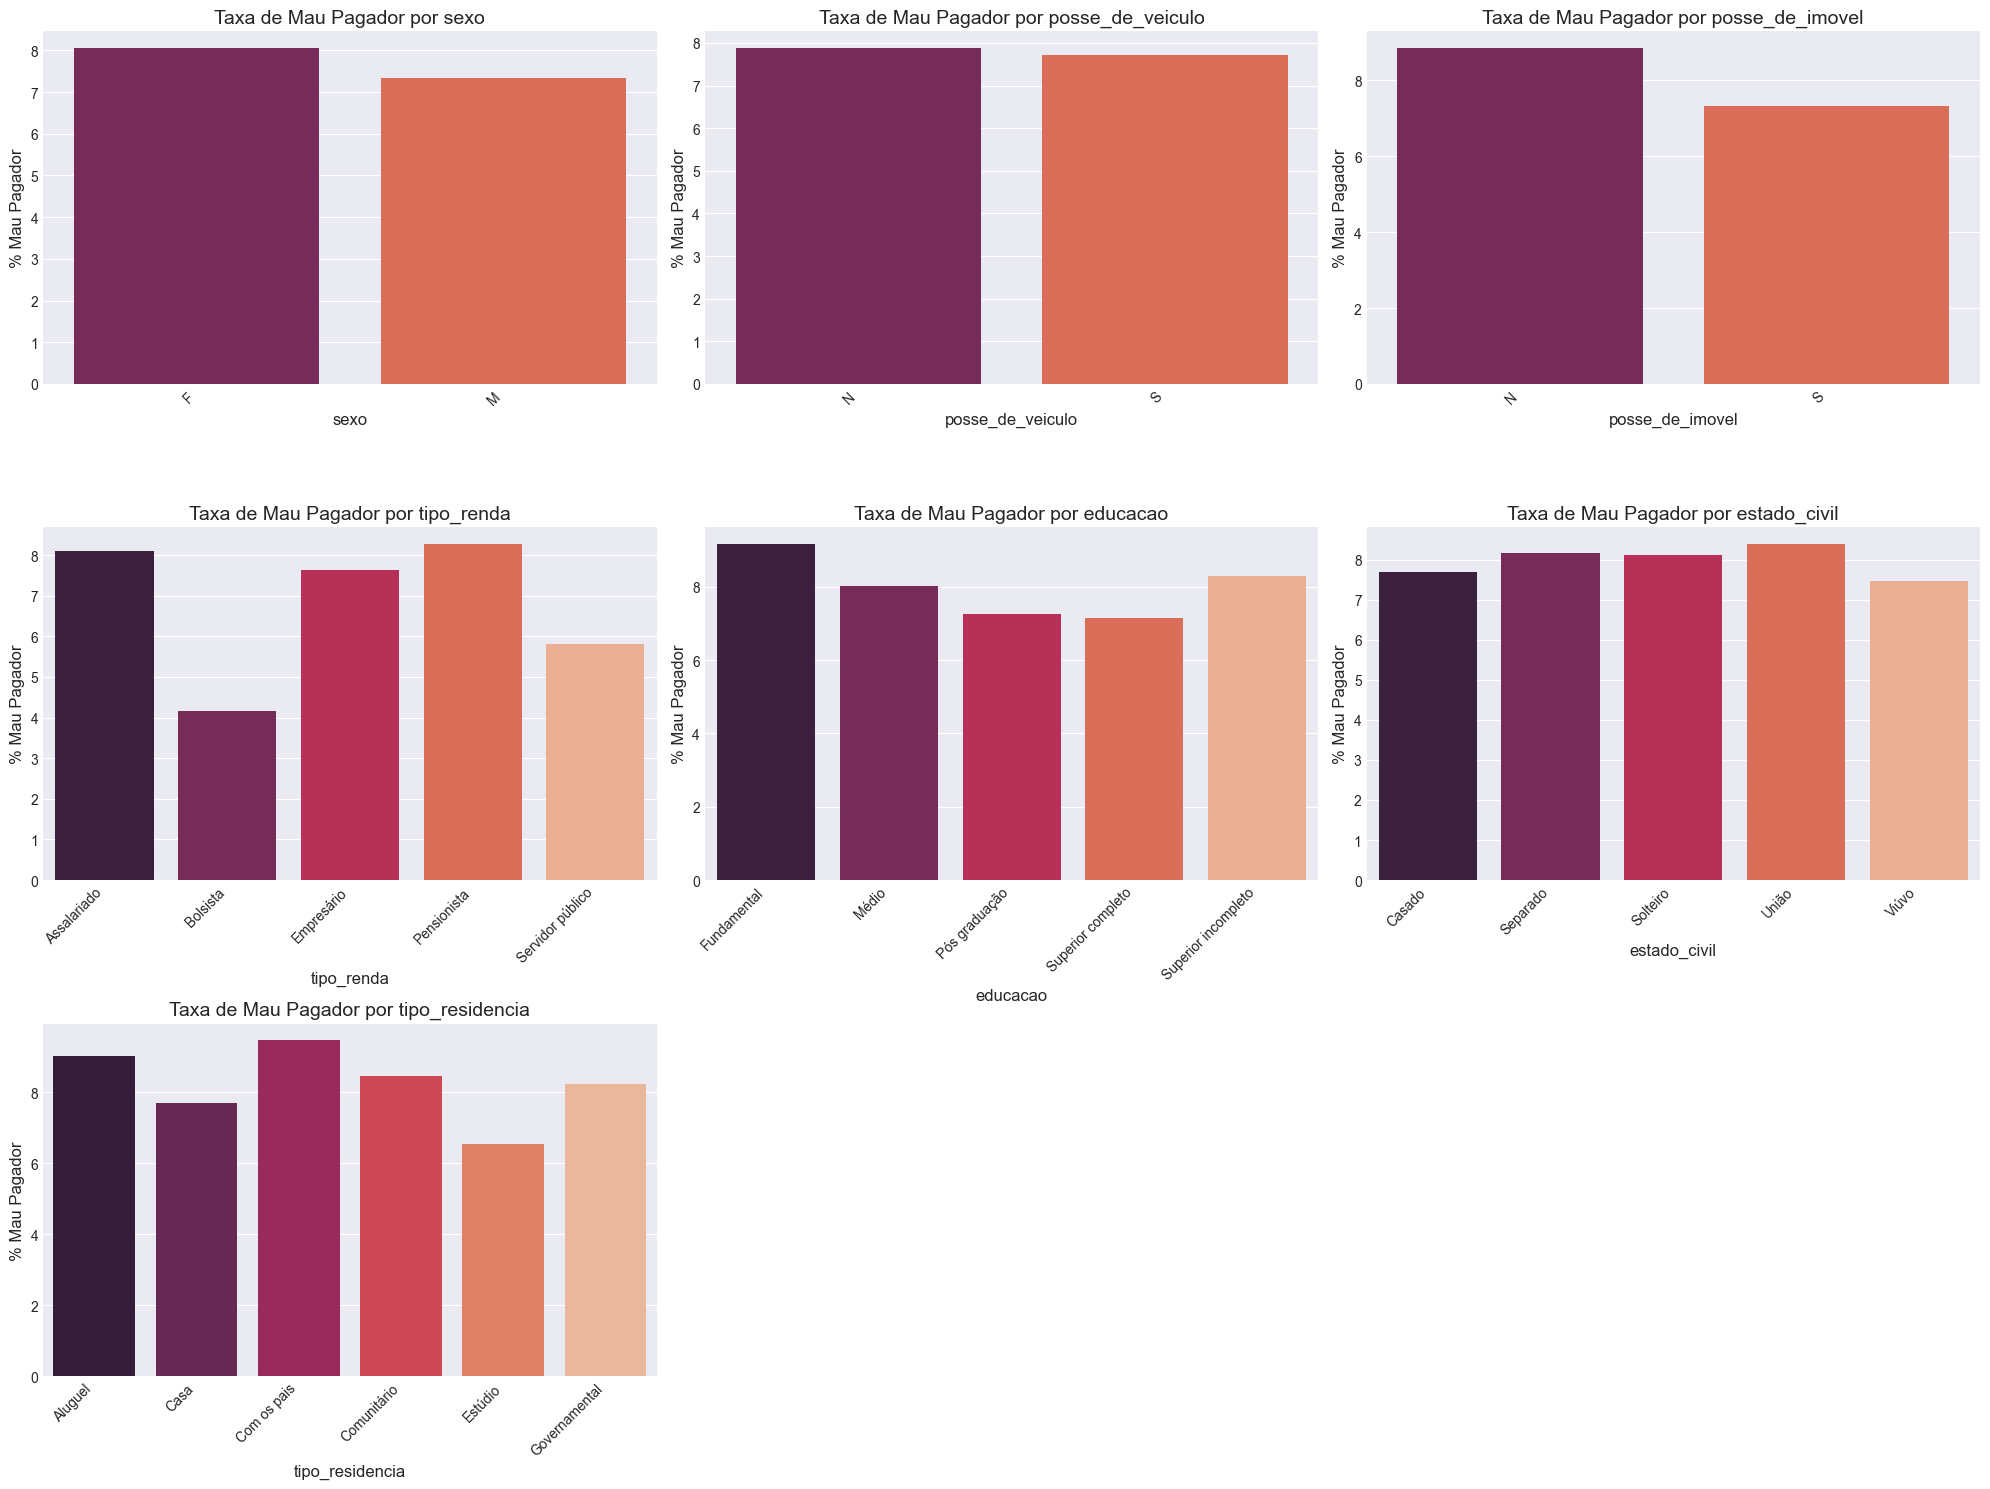


--- Análise Bivariada Concluída ---


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Análise Bivariada: Variáveis Quantitativas vs. 'mau' ---
print("\n--- Análise Bivariada: Variáveis Quantitativas vs. 'mau' ---")

# Seleciona as colunas numéricas, excluindo 'index' e 'data_ref'
quantitative_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['index', 'data_ref'], errors='ignore')

# Configurações de plotagem
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(18, 12))

for i, col in enumerate(quantitative_cols):
    plt.subplot(2, 3, i + 1)
    # >>> MODIFICAÇÃO AQUI: Adicionado hue='mau' e legend=False <<<
    sns.boxplot(x='mau', y=col, data=df, palette='viridis', hue='mau', legend=False)
    plt.title(f'Distribuição de {col} por Status de Inadimplência', fontsize=14)
    plt.xlabel('Status de Inadimplência (Mau: True/False)', fontsize=12)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

# Estatísticas (Média e Mediana) das Variáveis Quantitativas por 'mau'
print("\n--- Estatísticas (Média e Mediana) das Variáveis Quantitativas por 'mau' ---")
for col in quantitative_cols:
    print(f"\n--- {col} ---")
    print(df.groupby('mau')[col].agg(['mean', 'median']))

# --- Análise Bivariada: Variáveis Qualitativas vs. 'mau' ---
print("\n--- Análise Bivariada: Variáveis Qualitativas vs. 'mau' ---")

# Seleciona colunas do tipo 'object' e 'bool', excluindo 'data_ref' e a própria 'mau'
qualitative_cols = df.select_dtypes(include=['object', 'bool']).columns.drop(['data_ref', 'mau'], errors='ignore')

plt.figure(figsize=(20, 15)) # Tamanho geral da figura para os gráficos de barras

for i, col in enumerate(qualitative_cols):
    print(f"\n--- Coluna: {col} vs. 'mau' ---")
    # Tabela de contingência
    cross_tab = pd.crosstab(df[col], df['mau'], margins=True)
    print(cross_tab)

    # Proporção de 'mau' por categoria
    proportions = pd.crosstab(df[col], df['mau'], normalize='index') * 100
    print("\nProporção de 'mau' por categoria:")
    print(proportions)

    # Visualização da taxa de mau pagador por categoria
    plt.subplot(3, 3, i + 1)
    # >>> Nenhuma alteração necessária aqui, pois 'hue' já seria usado se fosse o caso <<<
    sns.barplot(x=proportions.index, y=proportions[True], palette='rocket')
    plt.title(f'Taxa de Mau Pagador por {col}', fontsize=14)
    plt.ylabel('% Mau Pagador', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

print("\n--- Análise Bivariada Concluída ---")

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carregamento e Preparação Inicial do DataFrame ---
# Carregar o DataFrame
df = pd.read_feather('C:/Users/igors/OneDrive/Cursos/EBAC/03 - Profissão Cientista de Dados/03 - Cientista de Dados/Module 38 - Regressão Logística II/Exercício 2/credit_scoring.ftr')

# Garantir que 'data_ref' é do tipo datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# --- 2. Amostragem: Separando Dados de Treino e Validação (Out-of-Time) ---
# Identificar as datas de referência únicas e ordená-las
datas_unicas = df['data_ref'].sort_values().unique()

# Selecionar as três últimas datas para validação (out-of-time)
datas_oot = datas_unicas[-3:]

# Criar DataFrame de validação (df_oot) com as safras out-of-time
df_oot = df[df['data_ref'].isin(datas_oot)].copy()

# Criar DataFrame de treino (df_train) com as safras restantes
df_train = df[~df['data_ref'].isin(datas_oot)].copy()

print(f"Dimensões do DataFrame de Treino: {df_train.shape}")
print(f"Dimensões do DataFrame de Validação (Out-of-Time): {df_oot.shape}\n")


# --- 3. Tratamento de Missings e Outliers ---

# 3.1. Tratamento de 'tempo_emprego' (Missing Values)
# Imputar com a mediana
mediana_tempo_emprego_train = df_train['tempo_emprego'].median()

# APLICAÇÃO DA CORREÇÃO AQUI para df_train
df_train['tempo_emprego'] = df_train['tempo_emprego'].fillna(mediana_tempo_emprego_train)
# APLICAÇÃO DA CORREÇÃO AQUI para df_oot
df_oot['tempo_emprego'] = df_oot['tempo_emprego'].fillna(mediana_tempo_emprego_train)

print(f"Valores nulos em 'tempo_emprego' após imputação (treino): {df_train['tempo_emprego'].isnull().sum()}")
print(f"Valores nulos em 'tempo_emprego' após imputação (oot): {df_oot['tempo_emprego'].isnull().sum()}\n")

# 3.2. Tratamento de 'renda' (Outliers e Assimetria via Log-transformação)
df_train['renda_log'] = df_train['renda'].apply(lambda x: np.log(x + 1))
df_oot['renda_log'] = df_oot['renda'].apply(lambda x: np.log(x + 1))

print("Estatísticas da 'renda_log' (treino) após transformação:")
print(df_train['renda_log'].describe())


# --- 4. Agrupamento de Categorias e Tratamento de "Zeros Estruturais" ---
# Agrupamentos baseados em potencial similaridade de risco ou baixa frequência observada em análises passadas.
# O objetivo é consolidar categorias para evitar "zeros estruturais" (categorias sem eventos de 'mau')
# e simplificar o modelo.

# Agrupamento de 'educacao'
df_train['educacao_agrupada'] = df_train['educacao'].replace({
    'Fundamental': 'Outros_Educacao',
    'Pós graduação': 'Superior_Completo'
})
df_oot['educacao_agrupada'] = df_oot['educacao'].replace({
    'Fundamental': 'Outros_Educacao',
    'Pós graduação': 'Superior_Completo'
})

# Agrupamento de 'estado_civil'
df_train['estado_civil_agrupado'] = df_train['estado_civil'].replace({
    'União': 'Outros_Civil',
    'Separado': 'Outros_Civil',
    'Viúvo': 'Outros_Civil'
})
df_oot['estado_civil_agrupado'] = df_oot['estado_civil'].replace({
    'União': 'Outros_Civil',
    'Separado': 'Outros_Civil',
    'Viúvo': 'Outros_Civil'
})

# Agrupamento de 'tipo_residencia'
df_train['tipo_residencia_agrupada'] = df_train['tipo_residencia'].replace({
    'Com os pais': 'Outros_Residencia',
    'Governamental': 'Outros_Residencia',
    'Aluguel': 'Outros_Residencia',
    'Estúdio': 'Outros_Residencia',
    'Comunitário': 'Outros_Residencia'
})
df_oot['tipo_residencia_agrupada'] = df_oot['tipo_residencia'].replace({
    'Com os pais': 'Outros_Residencia',
    'Governamental': 'Outros_Residencia',
    'Aluguel': 'Outros_Residencia',
    'Estúdio': 'Outros_Residencia',
    'Comunitário': 'Outros_Residencia'
})

print("\n--- Novas Contagens de Categorias Após Agrupamento (Treino) ---")
print("Educação Agrupada:\n", df_train['educacao_agrupada'].value_counts())
print("\nEstado Civil Agrupado:\n", df_train['estado_civil_agrupado'].value_counts())
print("\nTipo Residência Agrupada:\n", df_train['tipo_residencia_agrupada'].value_counts())


# --- 5. Codificação de Variáveis Categóricas (One-Hot Encoding) ---
# Definir as colunas categóricas para One-Hot Encoding (usando as agrupadas)
categorical_cols = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
    'educacao_agrupada', 'estado_civil_agrupado', 'tipo_residencia_agrupada'
]

# Inicializar o OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajustar o encoder no conjunto de treino e transformar ambos os conjuntos
ohe.fit(df_train[categorical_cols])
X_train_cat_encoded = ohe.transform(df_train[categorical_cols])
X_oot_cat_encoded = ohe.transform(df_oot[categorical_cols])

# Criar DataFrames com as variáveis codificadas e garantir os índices
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)
df_train_encoded = pd.DataFrame(X_train_cat_encoded, columns=encoded_feature_names, index=df_train.index)
df_oot_encoded = pd.DataFrame(X_oot_cat_encoded, columns=encoded_feature_names, index=df_oot.index)

# Definir as variáveis numéricas finais a serem usadas no modelo
numerical_cols = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda_log']

# Combinar variáveis numéricas e categóricas codificadas
X_train = pd.concat([df_train[numerical_cols], df_train_encoded], axis=1)
X_oot = pd.concat([df_oot[numerical_cols], df_oot_encoded], axis=1)

y_train = df_train['mau']
y_oot = df_oot['mau']

print(f"\nDimensões de X_train após codificação: {X_train.shape}")
print(f"Dimensões de X_oot após codificação: {X_oot.shape}")


# --- 6. Desenvolvimento do Modelo de Regressão Logística ---
print("\n--- Desenvolvendo o Modelo de Regressão Logística ---")

# Adicionar uma constante ao conjunto de features para o intercepto do modelo
X_train_sm = sm.add_constant(X_train)
X_oot_sm = sm.add_constant(X_oot)

# Ajustar o modelo de Regressão Logística
modelo_logistico = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
resultado_logistico = modelo_logistico.fit()

print("\n--- Resumo do Modelo de Regressão Logística ---")
print(resultado_logistico.summary())


# --- 7. Proposta de Equação Preditiva e Justificativa de Categorias Não Significativas ---
print("\n--- Análise da Equação Preditiva e Significância ---")

# Coletar coeficientes e p-valores
coeficientes = resultado_logistico.params
p_valores = resultado_logistico.pvalues

# Formatar a equação
equation_parts = []
for var, coef in coeficientes.items():
    if var == 'const':
        equation_parts.append(f"{coef:.4f}")
    else:
        sign = '+' if coef >= 0 else '-'
        equation_parts.append(f"{sign} {abs(coef):.4f} * {var}")

equation = "P(mau=True) = 1 / (1 + exp(-(" + " ".join(equation_parts) + ")))"
print(f"\nEquação Preditiva Proposta para P(mau=True):\n{equation}\n")


# Identificar e justificar categorias/variáveis não significantes
print("--- Variáveis e Categorias Não Significativas (p-valor >= 0.05) ---")
non_significant_vars = p_valores[p_valores >= 0.05].index.tolist()

if 'const' in non_significant_vars:
    non_significant_vars.remove('const')

if non_significant_vars:
    print("As seguintes variáveis (ou categorias) não são estatisticamente significativas (p-valor >= 0.05):")
    for var in non_significant_vars:
        p_val = p_valores[var]
        print(f"- {var} (p-valor: {p_val:.4f})")
    print("\nJustificativa para variáveis/categorias não significativas:")
    print("Variáveis não significativas indicam que, em presença das outras variáveis no modelo, não há evidência estatística forte o suficiente para afirmar que seus coeficientes são diferentes de zero.")
    print("Isso pode ocorrer por: ")
    print("  a) Falta de poder preditivo intrínseco da variável.")
    print("  b) Alta correlação (multicolinearidade) com outras variáveis já incluídas, onde o modelo 'dilui' o efeito entre elas.")
    print("  c) Agrupamento de categorias que não resultou em diferenciação de risco ou a existência de categorias com pouquíssimas observações.")
    print("Em um refinamento do modelo, variáveis não significativas podem ser removidas para simplificar o modelo (princípio da parcimônia) ou seus agrupamentos reavaliados para ver se o poder preditivo melhora.")
else:
    print("Todas as variáveis no modelo são estatisticamente significativas ao nível de 0.05.")

print("\n--- Desenvolvimento do Modelo Concluído ---")

Dimensões do DataFrame de Treino: (600000, 15)
Dimensões do DataFrame de Validação (Out-of-Time): (150000, 15)

Valores nulos em 'tempo_emprego' após imputação (treino): 0
Valores nulos em 'tempo_emprego' após imputação (oot): 0

Estatísticas da 'renda_log' (treino) após transformação:
count    600000.000000
mean          9.270624
std           1.211877
min           5.092891
25%           8.449257
50%           9.199136
75%           9.981831
max          15.222584
Name: renda_log, dtype: float64

--- Novas Contagens de Categorias Após Agrupamento (Treino) ---
Educação Agrupada:
 educacao_agrupada
Médio                  405449
Superior completo      163440
Superior incompleto     23559
Outros_Educacao          6901
Superior_Completo         651
Name: count, dtype: int64

Estado Civil Agrupado:
 estado_civil_agrupado
Casado          421149
Outros_Civil    105630
Solteiro         73221
Name: count, dtype: int64

Tipo Residência Agrupada:
 tipo_residencia_agrupada
Casa                 53

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

Dimensões do DataFrame de Treino: (600000, 15)
Dimensões do DataFrame de Validação (Out-of-Time): (150000, 15)

Valores nulos em 'tempo_emprego' após imputação (treino): 0
Valores nulos em 'tempo_emprego' após imputação (oot): 0

Estatísticas da 'renda_log' (treino) após transformação:
count    600000.000000
mean          9.270624
std           1.211877
min           5.092891
25%           8.449257
50%           9.199136
75%           9.981831
max          15.222584
Name: renda_log, dtype: float64

--- Novas Contagens de Categorias Após Agrupamento (Treino) ---
Educação Agrupada:
 educacao_agrupada
Médio                  405449
Superior completo      163440
Superior incompleto     23559
Outros_Educacao          6901
Superior_Completo         651
Name: count, dtype: int64

Estado Civil Agrupado:
 estado_civil_agrupado
Casado          421149
Outros_Civil    105630
Solteiro         73221
Name: count, dtype: int64

Tipo Residência Agrupada:
 tipo_residencia_agrupada
Casa                 53

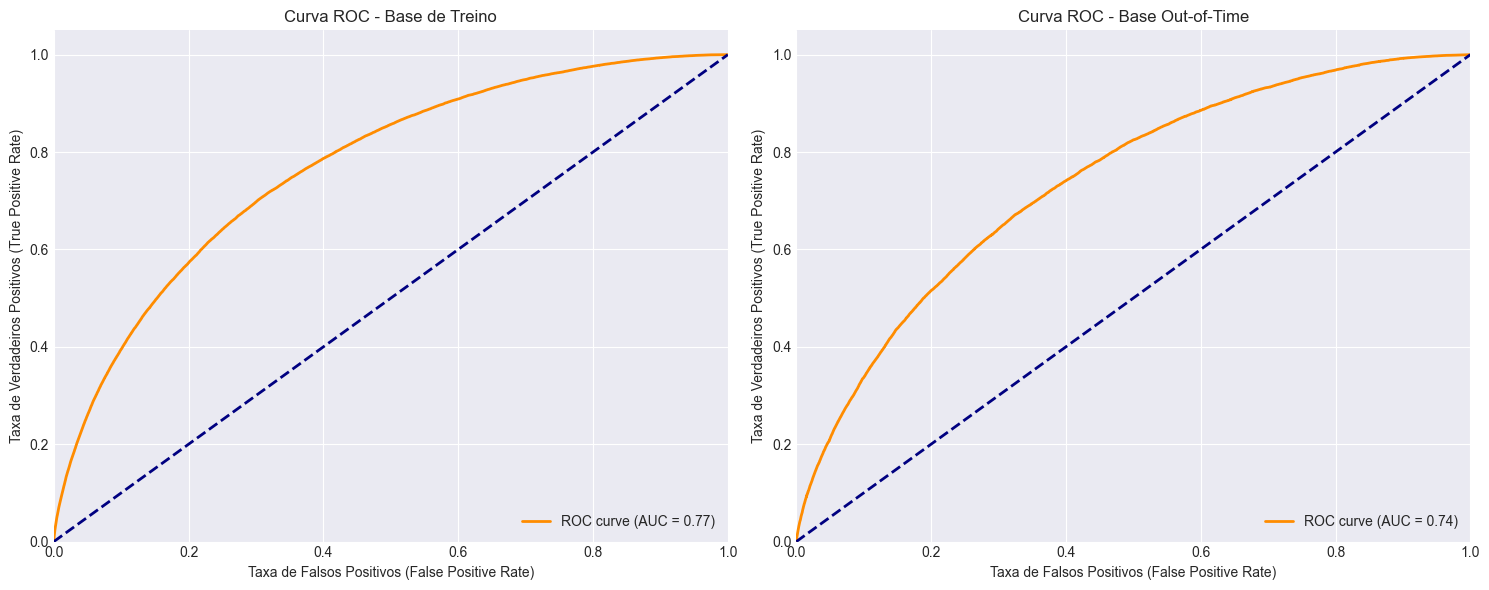

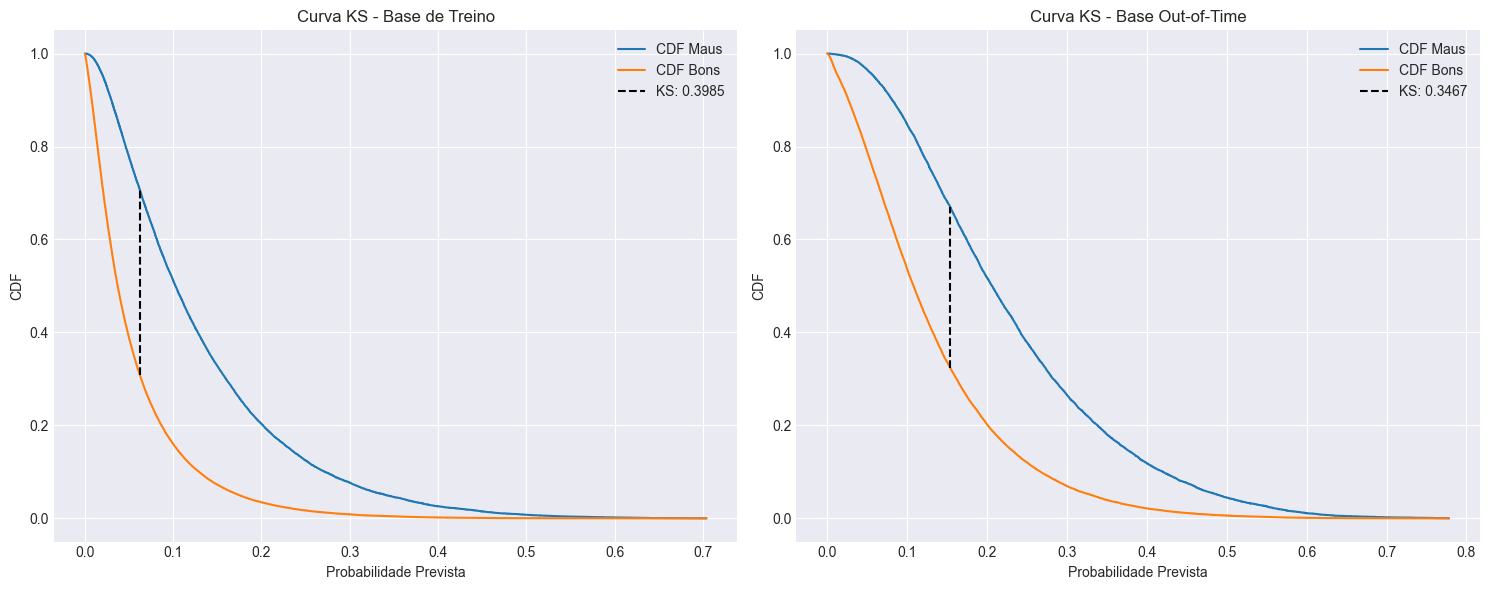


--- Avaliação do Modelo Concluída ---


In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc # <<< ADICIONE ESTA LINHA


# --- 1. Carregamento e Preparação Inicial do DataFrame ---
# Carregar o DataFrame
df = pd.read_feather('C:/Users/igors/OneDrive/Cursos/EBAC/03 - Profissão Cientista de Dados/03 - Cientista de Dados/Module 38 - Regressão Logística II/Exercício 2/credit_scoring.ftr')

# Garantir que 'data_ref' é do tipo datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# --- 2. Amostragem: Separando Dados de Treino e Validação (Out-of-Time) ---
# Identificar as datas de referência únicas e ordená-las
datas_unicas = df['data_ref'].sort_values().unique()

# Selecionar as três últimas datas para validação (out-of-time)
datas_oot = datas_unicas[-3:]

# Criar DataFrame de validação (df_oot) com as safras out-of-time
df_oot = df[df['data_ref'].isin(datas_oot)].copy()

# Criar DataFrame de treino (df_train) com as safras restantes
df_train = df[~df['data_ref'].isin(datas_oot)].copy()

print(f"Dimensões do DataFrame de Treino: {df_train.shape}")
print(f"Dimensões do DataFrame de Validação (Out-of-Time): {df_oot.shape}\n")


# --- 3. Tratamento de Missings e Outliers ---

# 3.1. Tratamento de 'tempo_emprego' (Missing Values)
# Imputar com a mediana
mediana_tempo_emprego_train = df_train['tempo_emprego'].median()

# APLICAÇÃO DA CORREÇÃO AQUI para df_train (sem inplace=True)
df_train['tempo_emprego'] = df_train['tempo_emprego'].fillna(mediana_tempo_emprego_train)
# APLICAÇÃO DA CORREÇÃO AQUI para df_oot (sem inplace=True)
df_oot['tempo_emprego'] = df_oot['tempo_emprego'].fillna(mediana_tempo_emprego_train)

print(f"Valores nulos em 'tempo_emprego' após imputação (treino): {df_train['tempo_emprego'].isnull().sum()}")
print(f"Valores nulos em 'tempo_emprego' após imputação (oot): {df_oot['tempo_emprego'].isnull().sum()}\n")

# 3.2. Tratamento de 'renda' (Outliers e Assimetria via Log-transformação)
df_train['renda_log'] = df_train['renda'].apply(lambda x: np.log(x + 1))
df_oot['renda_log'] = df_oot['renda'].apply(lambda x: np.log(x + 1))

print("Estatísticas da 'renda_log' (treino) após transformação:")
print(df_train['renda_log'].describe())


# --- 4. Agrupamento de Categorias e Tratamento de "Zeros Estruturais" ---
# Agrupamentos baseados em potencial similaridade de risco ou baixa frequência observada em análises passadas.

# Agrupamento de 'educacao'
df_train['educacao_agrupada'] = df_train['educacao'].replace({
    'Fundamental': 'Outros_Educacao',
    'Pós graduação': 'Superior_Completo'
})
df_oot['educacao_agrupada'] = df_oot['educacao'].replace({
    'Fundamental': 'Outros_Educacao',
    'Pós graduação': 'Superior_Completo'
})

# Agrupamento de 'estado_civil'
df_train['estado_civil_agrupado'] = df_train['estado_civil'].replace({
    'União': 'Outros_Civil',
    'Separado': 'Outros_Civil',
    'Viúvo': 'Outros_Civil'
})
df_oot['estado_civil_agrupado'] = df_oot['estado_civil'].replace({
    'União': 'Outros_Civil',
    'Separado': 'Outros_Civil',
    'Viúvo': 'Outros_Civil'
})

# Agrupamento de 'tipo_residencia'
df_train['tipo_residencia_agrupada'] = df_train['tipo_residencia'].replace({
    'Com os pais': 'Outros_Residencia',
    'Governamental': 'Outros_Residencia',
    'Aluguel': 'Outros_Residencia',
    'Estúdio': 'Outros_Residencia',
    'Comunitário': 'Outros_Residencia'
})
df_oot['tipo_residencia_agrupada'] = df_oot['tipo_residencia'].replace({
    'Com os pais': 'Outros_Residencia',
    'Governamental': 'Outros_Residencia',
    'Aluguel': 'Outros_Residencia',
    'Estúdio': 'Outros_Residencia',
    'Comunitário': 'Outros_Residencia'
})

print("\n--- Novas Contagens de Categorias Após Agrupamento (Treino) ---")
print("Educação Agrupada:\n", df_train['educacao_agrupada'].value_counts())
print("\nEstado Civil Agrupado:\n", df_train['estado_civil_agrupado'].value_counts())
print("\nTipo Residência Agrupada:\n", df_train['tipo_residencia_agrupada'].value_counts())


# --- 5. Codificação de Variáveis Categóricas (One-Hot Encoding) ---
# Definir as colunas categóricas para One-Hot Encoding (usando as agrupadas)
categorical_cols = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
    'educacao_agrupada', 'estado_civil_agrupado', 'tipo_residencia_agrupada'
]

# Inicializar o OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajustar o encoder no conjunto de treino e transformar ambos os conjuntos
ohe.fit(df_train[categorical_cols])
X_train_cat_encoded = ohe.transform(df_train[categorical_cols])
X_oot_cat_encoded = ohe.transform(df_oot[categorical_cols])

# Criar DataFrames com as variáveis codificadas e garantir os índices
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)
df_train_encoded = pd.DataFrame(X_train_cat_encoded, columns=encoded_feature_names, index=df_train.index)
df_oot_encoded = pd.DataFrame(X_oot_cat_encoded, columns=encoded_feature_names, index=df_oot.index)

# Definir as variáveis numéricas finais a serem usadas no modelo
numerical_cols = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda_log']

# Combinar variáveis numéricas e categóricas codificadas
X_train = pd.concat([df_train[numerical_cols], df_train_encoded], axis=1)
X_oot = pd.concat([df_oot[numerical_cols], df_oot_encoded], axis=1)

y_train = df_train['mau']
y_oot = df_oot['mau']

print(f"\nDimensões de X_train após codificação: {X_train.shape}")
print(f"Dimensões de X_oot após codificação: {X_oot.shape}")


# --- 6. Desenvolvimento do Modelo de Regressão Logística ---
print("\n--- Desenvolvendo o Modelo de Regressão Logística ---")

# Adicionar uma constante ao conjunto de features para o intercepto do modelo
X_train_sm = sm.add_constant(X_train)
X_oot_sm = sm.add_constant(X_oot)

# Ajustar o modelo de Regressão Logística
modelo_logistico = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
resultado_logistico = modelo_logistico.fit()

print("\n--- Resumo do Modelo de Regressão Logística ---")
print(resultado_logistico.summary())


# --- 7. Proposta de Equação Preditiva e Justificativa de Categorias Não Significativas ---
print("\n--- Análise da Equação Preditiva e Significância ---")

# Coletar coeficientes e p-valores
coeficientes = resultado_logistico.params
p_valores = resultado_logistico.pvalues

# Formatar a equação
equation_parts = []
for var, coef in coeficientes.items():
    if var == 'const':
        equation_parts.append(f"{coef:.4f}")
    else:
        sign = '+' if coef >= 0 else '-'
        equation_parts.append(f"{sign} {abs(coef):.4f} * {var}")

equation = "P(mau=True) = 1 / (1 + exp(-(" + " ".join(equation_parts) + ")))"
print(f"\nEquação Preditiva Proposta para P(mau=True):\n{equation}\n")


# Identificar e justificar categorias/variáveis não significantes
print("--- Variáveis e Categorias Não Significativas (p-valor >= 0.05) ---")
non_significant_vars = p_valores[p_valores >= 0.05].index.tolist()

if 'const' in non_significant_vars:
    non_significant_vars.remove('const')

if non_significant_vars:
    print("As seguintes variáveis (ou categorias) não são estatisticamente significativas (p-valor >= 0.05):")
    for var in non_significant_vars:
        p_val = p_valores[var]
        print(f"- {var} (p-valor: {p_val:.4f})")
    print("\nJustificativa para variáveis/categorias não significativas:")
    print("Variáveis não significativas indicam que, em presença das outras variáveis no modelo, não há evidência estatística forte o suficiente para afirmar que seus coeficientes são diferentes de zero.")
    print("Isso pode ocorrer por: ")
    print("  a) Falta de poder preditivo intrínseco da variável.")
    print("  b) Alta correlação (multicolinearidade) com outras variáveis já incluídas, onde o modelo 'dilui' o efeito entre elas.")
    print("  c) Agrupamento de categorias que não resultou em diferenciação de risco ou a existência de categorias com pouquíssimas observações.")
    print("Em um refinamento do modelo, variáveis não significativas podem ser removidas para simplificar o modelo (princípio da parcimônia) ou seus agrupamentos reavaliados para ver se o poder preditivo melhora.")
else:
    print("Todas as variáveis no modelo são estatisticamente significativas ao nível de 0.05.")

print("\n--- Desenvolvimento do Modelo Concluído ---\n")


# --- 8. Avaliação do Modelo ---
print("\n--- Avaliação do Poder Discriminante do Modelo ---")

# Previsão das probabilidades
y_pred_proba_train = resultado_logistico.predict(X_train_sm)
y_pred_proba_oot = resultado_logistico.predict(X_oot_sm)

# --- 8.1. Acurácia ---
# Para calcular a acurácia, precisamos de uma classe prevista (0 ou 1).
# Vamos usar um limiar de 0.5 para converter probabilidades em classes.
y_pred_class_train = (y_pred_proba_train > 0.5).astype(int)
y_pred_class_oot = (y_pred_proba_oot > 0.5).astype(int)

acuracia_train = accuracy_score(y_train, y_pred_class_train)
acuracia_oot = accuracy_score(y_oot, y_pred_class_oot)

print("--- Acurácia ---")
print(f"Acurácia (Base de Treino): {acuracia_train:.4f}")
print(f"Acurácia (Base Out-of-Time): {acuracia_oot:.4f}\n")

# --- 8.2. Gini (baseado na curva ROC AUC) ---
# Gini = 2 * AUC - 1

# Base de Treino
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)
gini_train = 2 * roc_auc_train - 1

# Base Out-of-Time
fpr_oot, tpr_oot, _ = roc_curve(y_oot, y_pred_proba_oot)
roc_auc_oot = auc(fpr_oot, tpr_oot)
gini_oot = 2 * roc_auc_oot - 1

print("--- Coeficiente de Gini ---")
print(f"Gini (Base de Treino): {gini_train:.4f}")
print(f"Gini (Base Out-of-Time): {gini_oot:.4f}\n")

# --- 8.3. Kolmogorov-Smirnov (KS) ---
def calculate_ks(y_true, y_proba):
    df_results = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
    df_results.sort_values(by='y_proba', ascending=False, inplace=True)
    
    # <<< CORREÇÃO AQUI: Resetar o índice após a ordenação >>>
    df_results.reset_index(drop=True, inplace=True) 

    df_results['cum_bad'] = df_results['y_true'].cumsum()
    df_results['cum_good'] = (1 - df_results['y_true']).cumsum()

    total_bad = df_results['y_true'].sum()
    total_good = (1 - df_results['y_true']).sum()
    
    cdf_bad = df_results['cum_bad'] / total_bad if total_bad > 0 else 0
    cdf_good = df_results['cum_good'] / total_good if total_good > 0 else 0

    ks_value = np.max(np.abs(cdf_bad - cdf_good))
    
    # Retornar a Series de probabilidades reindexada
    return ks_value, cdf_bad, cdf_good, df_results['y_proba']

# Base de Treino
ks_train, cdf_bad_train, cdf_good_train, proba_sorted_train = calculate_ks(y_train, y_pred_proba_train)
# Base Out-of-Time
ks_oot, cdf_bad_oot, cdf_good_oot, proba_sorted_oot = calculate_ks(y_oot, y_pred_proba_oot)

print("--- Kolmogorov-Smirnov (KS) ---")
print(f"KS (Base de Treino): {ks_train:.4f}")
print(f"KS (Base Out-of-Time): {ks_oot:.4f}\n")

# --- Visualização da Curva ROC e KS para ambas as bases ---
plt.figure(figsize=(15, 6))

# Curva ROC - Treino
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curva ROC - Base de Treino')
plt.legend(loc="lower right")

# Curva ROC - Out-of-Time
plt.subplot(1, 2, 2)
plt.plot(fpr_oot, tpr_oot, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_oot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curva ROC - Base Out-of-Time')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Curva KS - Treino e OOT
plt.figure(figsize=(15, 6))

# Curva KS - Treino
plt.subplot(1, 2, 1)
plt.plot(proba_sorted_train, cdf_bad_train, label='CDF Maus')
plt.plot(proba_sorted_train, cdf_good_train, label='CDF Bons')
# A linha vertical para o KS precisa do índice numérico da posição máxima
max_ks_idx_train = np.argmax(np.abs(cdf_bad_train - cdf_good_train))
plt.plot([proba_sorted_train.iloc[max_ks_idx_train], proba_sorted_train.iloc[max_ks_idx_train]], # Use .iloc para acesso posicional
            [cdf_good_train.iloc[max_ks_idx_train], cdf_bad_train.iloc[max_ks_idx_train]],
            'k--', label=f'KS: {ks_train:.4f}')
plt.title('Curva KS - Base de Treino')
plt.xlabel('Probabilidade Prevista')
plt.ylabel('CDF')
plt.legend()

# Curva KS - Out-of-Time
plt.subplot(1, 2, 2)
plt.plot(proba_sorted_oot, cdf_bad_oot, label='CDF Maus')
plt.plot(proba_sorted_oot, cdf_good_oot, label='CDF Bons')
# A linha vertical para o KS precisa do índice numérico da posição máxima
max_ks_idx_oot = np.argmax(np.abs(cdf_bad_oot - cdf_good_oot))
plt.plot([proba_sorted_oot.iloc[max_ks_idx_oot], proba_sorted_oot.iloc[max_ks_idx_oot]], # Use .iloc para acesso posicional
            [cdf_good_oot.iloc[max_ks_idx_oot], cdf_bad_oot.iloc[max_ks_idx_oot]],
            'k--', label=f'KS: {ks_oot:.4f}')
plt.title('Curva KS - Base Out-of-Time')
plt.xlabel('Probabilidade Prevista')
plt.ylabel('CDF')
plt.legend()

plt.tight_layout()
plt.show()

print("\n--- Avaliação do Modelo Concluída ---")

## Criar um pipeline utilizando o sklearn pipeline 

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc


--- Pipeline de Pré-processamento Aplicado ---
Dimensões de X_train_final: (600000, 27)
Dimensões de X_oot_final: (150000, 27)
Primeiras 5 colunas de X_train_final: ['tempo_emprego', 'tempo_emprego_missing_indicator', 'renda_log', 'sexo_F', 'sexo_M']...

--- Desenvolvendo o Modelo de Regressão Logística ---

--- Resumo do Modelo de Regressão Logística ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    mau   No. Observations:               600000
Model:                            GLM   Df Residuals:                   599979
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2027e+05
Date:                Sat, 28 Jun 2025   Deviance:                   2.4053e+05
Time:                        13:20:56   Pearson chi2:                 5.98e+05
No. Itera

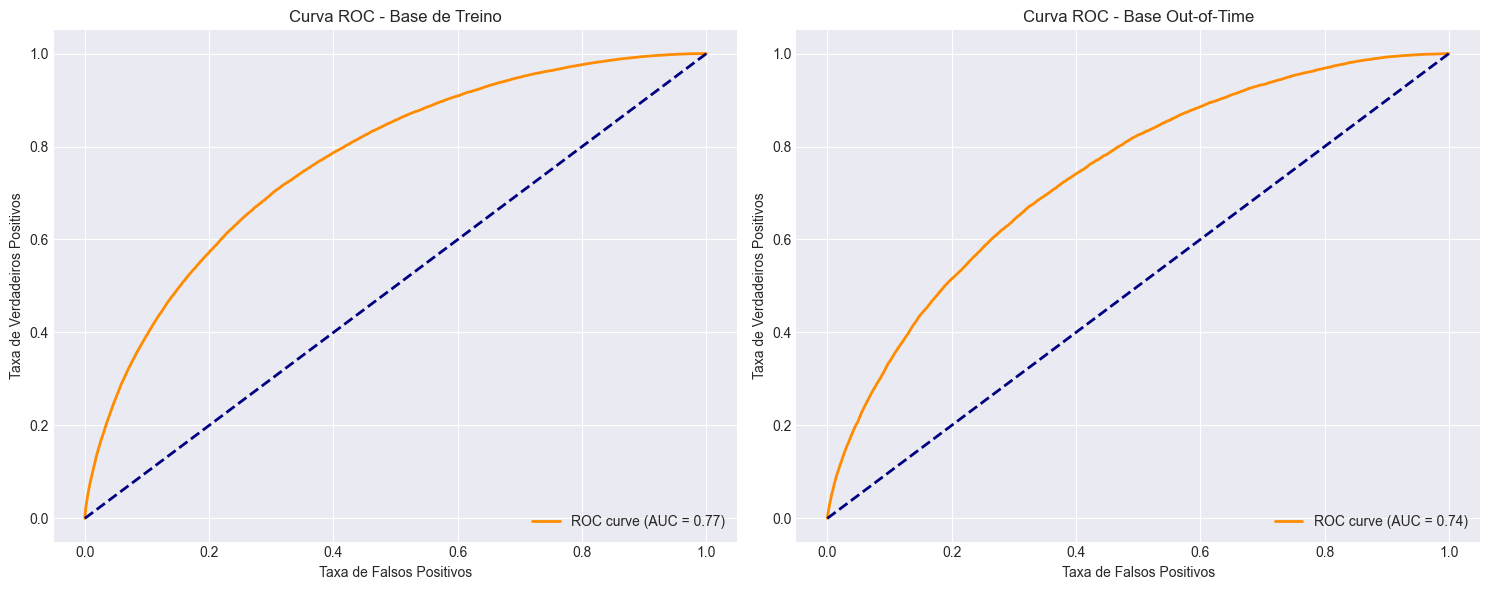

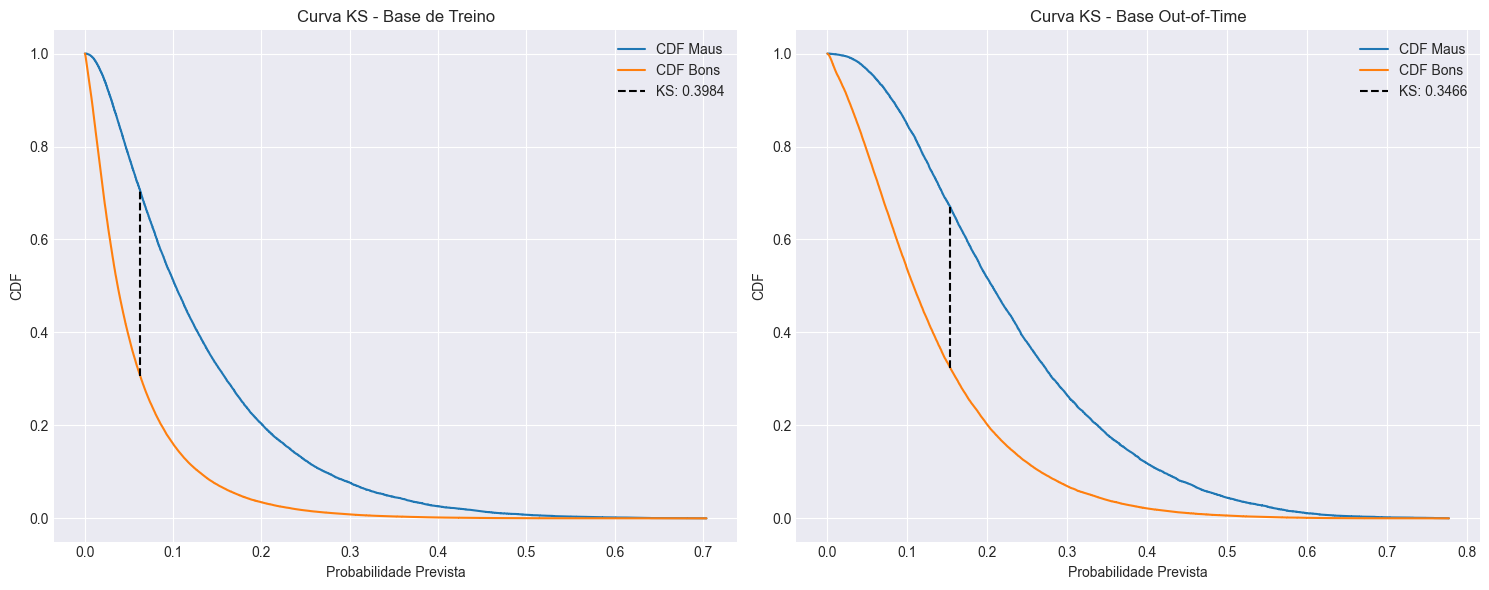

In [9]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
import statsmodels.api as sm # Para o modelo GLM
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


# --- Re-carregar e preparar os dados (garantir um ponto de partida limpo) ---
df = pd.read_feather('C:/Users/igors/OneDrive/Cursos/EBAC/03 - Profissão Cientista de Dados/03 - Cientista de Dados/Module 38 - Regressão Logística II/Exercício 2/credit_scoring.ftr')
df['data_ref'] = pd.to_datetime(df['data_ref'])

datas_unicas = df['data_ref'].sort_values().unique()
datas_oot = datas_unicas[-3:]
df_oot = df[df['data_ref'].isin(datas_oot)].copy()
df_train = df[~df['data_ref'].isin(datas_oot)].copy()

# --- Agrupamento de Categorias (feito ANTES do pipeline para simplificar) ---
# O agrupamento é feito diretamente no DataFrame, criando novas colunas "_agrupada"
# Poderíamos criar um transformer customizado, mas para este caso, é prático fazer aqui.

df_train['educacao_agrupada'] = df_train['educacao'].replace({
    'Fundamental': 'Outros_Educacao',
    'Pós graduação': 'Superior_Completo'
})
df_oot['educacao_agrupada'] = df_oot['educacao'].replace({
    'Fundamental': 'Outros_Educacao',
    'Pós graduação': 'Superior_Completo'
})

df_train['estado_civil_agrupado'] = df_train['estado_civil'].replace({
    'União': 'Outros_Civil',
    'Separado': 'Outros_Civil',
    'Viúvo': 'Outros_Civil'
})
df_oot['estado_civil_agrupado'] = df_oot['estado_civil'].replace({
    'União': 'Outros_Civil',
    'Separado': 'Outros_Civil',
    'Viúvo': 'Outros_Civil'
})

df_train['tipo_residencia_agrupada'] = df_train['tipo_residencia'].replace({
    'Com os pais': 'Outros_Residencia',
    'Governamental': 'Outros_Residencia',
    'Aluguel': 'Outros_Residencia',
    'Estúdio': 'Outros_Residencia',
    'Comunitário': 'Outros_Residencia'
})
df_oot['tipo_residencia_agrupada'] = df_oot['tipo_residencia'].replace({
    'Com os pais': 'Outros_Residencia',
    'Governamental': 'Outros_Residencia',
    'Aluguel': 'Outros_Residencia',
    'Estúdio': 'Outros_Residencia',
    'Comunitário': 'Outros_Residencia'
})

# --- Definição de Variáveis para o Pipeline ---

# Variáveis numéricas que precisam de imputação e/ou transformação
numerical_cols_impute = ['tempo_emprego']
numerical_cols_log = ['renda'] # Aplicaremos log(x+1) nesta
numerical_cols_passthrough = ['qtd_filhos', 'idade', 'qt_pessoas_residencia'] # Não precisam de transformações específicas no pipeline

# Variáveis categóricas (usando as colunas agrupadas)
categorical_cols = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
    'educacao_agrupada', 'estado_civil_agrupado', 'tipo_residencia_agrupada'
]

# --- Criação do Pré-processador (ColumnTransformer) ---

# Transformador para variáveis numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer_tempo_emprego', SimpleImputer(strategy='median', add_indicator=True)), # Imputa nulos e adiciona indicador de nulo
])

# Transformador para 'renda' (log-transformação)
# O FunctionTransformer permite aplicar uma função simples (como np.log1p para log(x+1))
log_transformer = Pipeline(steps=[
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
])

# Transformador para variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer para aplicar diferentes transformações a diferentes colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('num_impute', numeric_transformer, numerical_cols_impute),
        ('log_trans', log_transformer, numerical_cols_log),
        ('cat', categorical_transformer, categorical_cols),
        ('pass', 'passthrough', numerical_cols_passthrough) # Mantém estas colunas como estão
    ],
    remainder='drop' # Descarta colunas não especificadas (como 'data_ref', 'index', 'renda' original)
)

# --- Montando o Pipeline Completo (Pré-processamento + Modelo) ---

# Para o modelo GLM do statsmodels, não podemos encaixar diretamente no pipeline do sklearn,
# pois ele espera um estimador com fit/predict.
# Faremos o pré-processamento com o pipeline e depois usaremos o statsmodels.

# Ajustar e transformar os dados de treino
X_train_processed = preprocessor.fit_transform(df_train)
X_oot_processed = preprocessor.transform(df_oot)

# Obter nomes das colunas após o pré-processamento
# Isso é um pouco mais complexo com ColumnTransformer e FunctionTransformer
# Vamos reconstruir o DataFrame para statsmodels e manter os nomes
feature_names = (
    numerical_cols_impute + # Tempo de emprego (após imputação)
    [f'{col}_missing_indicator' for col in numerical_cols_impute] + # Indicador de missing
    [f'{col}_log' for col in numerical_cols_log] + # Renda log
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)) +
    numerical_cols_passthrough # Colunas pass-through
)

# Criar DataFrames processados com nomes de colunas
X_train_final = pd.DataFrame(X_train_processed, columns=feature_names, index=df_train.index)
X_oot_final = pd.DataFrame(X_oot_processed, columns=feature_names, index=df_oot.index)

y_train = df_train['mau']
y_oot = df_oot['mau']

print("\n--- Pipeline de Pré-processamento Aplicado ---")
print(f"Dimensões de X_train_final: {X_train_final.shape}")
print(f"Dimensões de X_oot_final: {X_oot_final.shape}")
print(f"Primeiras 5 colunas de X_train_final: {X_train_final.columns.tolist()[:5]}...")


# --- Desenvolvimento do Modelo de Regressão Logística (com statsmodels) ---
print("\n--- Desenvolvendo o Modelo de Regressão Logística ---")

# Adicionar uma constante ao conjunto de features para o intercepto do modelo
X_train_sm = sm.add_constant(X_train_final)
X_oot_sm = sm.add_constant(X_oot_final)

modelo_logistico = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
resultado_logistico = modelo_logistico.fit()

print("\n--- Resumo do Modelo de Regressão Logística ---")
print(resultado_logistico.summary())


# --- Avaliação do Modelo ---
print("\n--- Avaliação do Poder Discriminante do Modelo ---")

y_pred_proba_train = resultado_logistico.predict(X_train_sm)
y_pred_proba_oot = resultado_logistico.predict(X_oot_sm)

# Acurácia
y_pred_class_train = (y_pred_proba_train > 0.5).astype(int)
y_pred_class_oot = (y_pred_proba_oot > 0.5).astype(int)
acuracia_train = accuracy_score(y_train, y_pred_class_train)
acuracia_oot = accuracy_score(y_oot, y_pred_class_oot)
print("--- Acurácia ---")
print(f"Acurácia (Base de Treino): {acuracia_train:.4f}")
print(f"Acurácia (Base Out-of-Time): {acuracia_oot:.4f}\n")

# Gini
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)
gini_train = 2 * roc_auc_train - 1
fpr_oot, tpr_oot, _ = roc_curve(y_oot, y_pred_proba_oot)
roc_auc_oot = auc(fpr_oot, tpr_oot)
gini_oot = 2 * roc_auc_oot - 1
print("--- Coeficiente de Gini ---")
print(f"Gini (Base de Treino): {gini_train:.4f}")
print(f"Gini (Base Out-of-Time): {gini_oot:.4f}\n")

# KS
def calculate_ks(y_true, y_proba):
    df_results = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
    df_results.sort_values(by='y_proba', ascending=False, inplace=True)
    df_results.reset_index(drop=True, inplace=True) # Resetar índice
    df_results['cum_bad'] = df_results['y_true'].cumsum()
    df_results['cum_good'] = (1 - df_results['y_true']).cumsum()
    total_bad = df_results['y_true'].sum()
    total_good = (1 - df_results['y_true']).sum()
    cdf_bad = df_results['cum_bad'] / total_bad if total_bad > 0 else 0
    cdf_good = df_results['cum_good'] / total_good if total_good > 0 else 0
    ks_value = np.max(np.abs(cdf_bad - cdf_good))
    return ks_value, cdf_bad, cdf_good, df_results['y_proba']

ks_train, cdf_bad_train, cdf_good_train, proba_sorted_train = calculate_ks(y_train, y_pred_proba_train)
ks_oot, cdf_bad_oot, cdf_good_oot, proba_sorted_oot = calculate_ks(y_oot, y_pred_proba_oot)
print("--- Kolmogorov-Smirnov (KS) ---")
print(f"KS (Base de Treino): {ks_train:.4f}")
print(f"KS (Base Out-of-Time): {ks_oot:.4f}\n")

# Plotagens
plt.figure(figsize=(15, 6))
# ROC Treino
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base de Treino'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
# ROC OOT
plt.subplot(1, 2, 2)
plt.plot(fpr_oot, tpr_oot, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_oot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base Out-of-Time'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
plt.tight_layout(); plt.show()

plt.figure(figsize=(15, 6))
# KS Treino
plt.subplot(1, 2, 1)
plt.plot(proba_sorted_train, cdf_bad_train, label='CDF Maus')
plt.plot(proba_sorted_train, cdf_good_train, label='CDF Bons')
max_ks_idx_train = np.argmax(np.abs(cdf_bad_train - cdf_good_train))
plt.plot([proba_sorted_train.iloc[max_ks_idx_train], proba_sorted_train.iloc[max_ks_idx_train]],
         [cdf_good_train.iloc[max_ks_idx_train], cdf_bad_train.iloc[max_ks_idx_train]], 'k--', label=f'KS: {ks_train:.4f}')
plt.title('Curva KS - Base de Treino'); plt.xlabel('Probabilidade Prevista'); plt.ylabel('CDF'); plt.legend()
# KS OOT
plt.subplot(1, 2, 2)
plt.plot(proba_sorted_oot, cdf_bad_oot, label='CDF Maus')
plt.plot(proba_sorted_oot, cdf_good_oot, label='CDF Bons')
max_ks_idx_oot = np.argmax(np.abs(cdf_bad_oot - cdf_good_oot))
plt.plot([proba_sorted_oot.iloc[max_ks_idx_oot], proba_sorted_oot.iloc[max_ks_idx_oot]],
         [cdf_good_oot.iloc[max_ks_idx_oot], cdf_bad_oot.iloc[max_ks_idx_oot]], 'k--', label=f'KS: {ks_oot:.4f}')
plt.title('Curva KS - Base Out-of-Time'); plt.xlabel('Probabilidade Prevista'); plt.ylabel('CDF'); plt.legend()
plt.tight_layout(); plt.show()

### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

--- Distribuição antes do Capping (Renda Log e Tempo de Emprego) ---


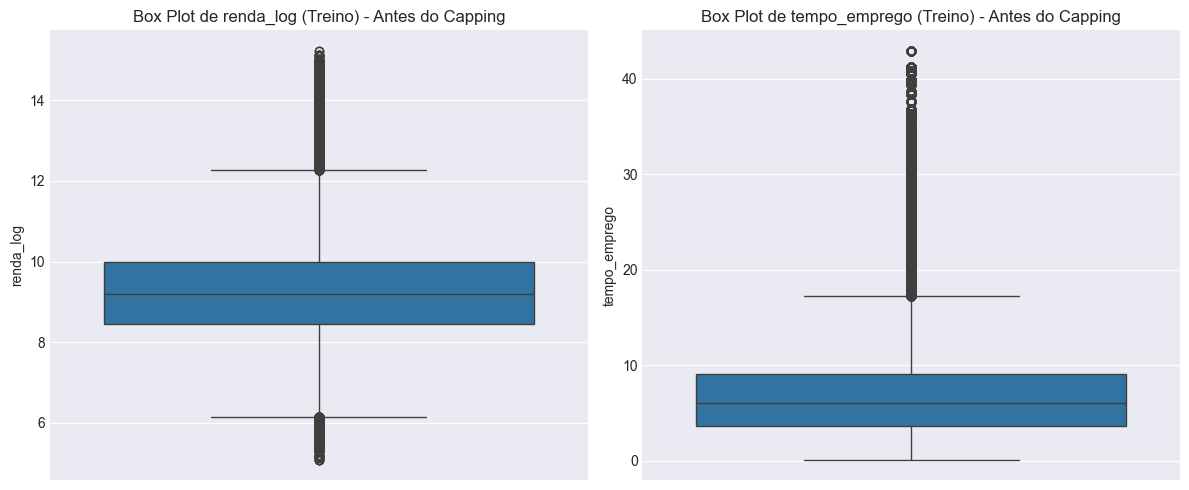


--- Aplicando Capping para 'renda_log' ---
Limites de Capping para renda_log: Inferior=6.15, Superior=12.28
Número de outliers abaixo do limite inferior (treino): 889
Número de outliers acima do limite superior (treino): 10808

--- Aplicando Capping para 'tempo_emprego' ---
Limites de Capping para tempo_emprego: Inferior=-4.52, Superior=17.22
Número de outliers abaixo do limite inferior (treino): 0
Número de outliers acima do limite superior (treino): 45847

--- Distribuição após o Capping (Renda Log Capped e Tempo de Emprego Capped) ---


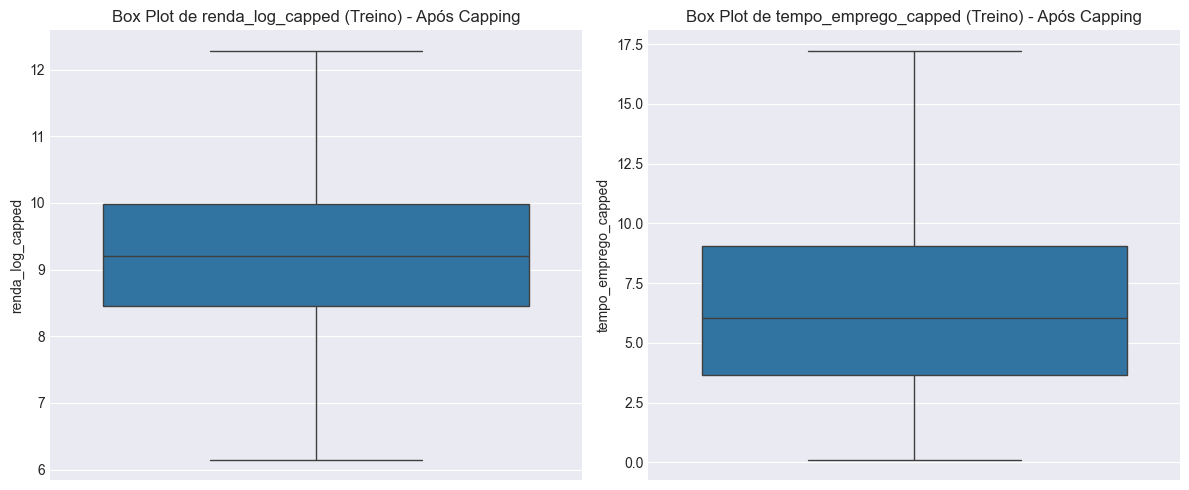


--- Pipeline de Pré-processamento Aplicado (Com Capping) ---
Dimensões de X_train_final: (600000, 26)
Dimensões de X_oot_final: (150000, 26)
Primeiras 5 colunas de X_train_final: ['sexo_F', 'sexo_M', 'posse_de_veiculo_N', 'posse_de_veiculo_S', 'posse_de_imovel_N']...

--- Desenvolvendo o Modelo de Regressão Logística (Com Capping) ---

--- Resumo do Modelo de Regressão Logística (Após Capping) ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    mau   No. Observations:               600000
Model:                            GLM   Df Residuals:                   599980
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2029e+05
Date:                Sat, 28 Jun 2025   Deviance:                   2.4058e+05
Time:                        13:21:13   Pears

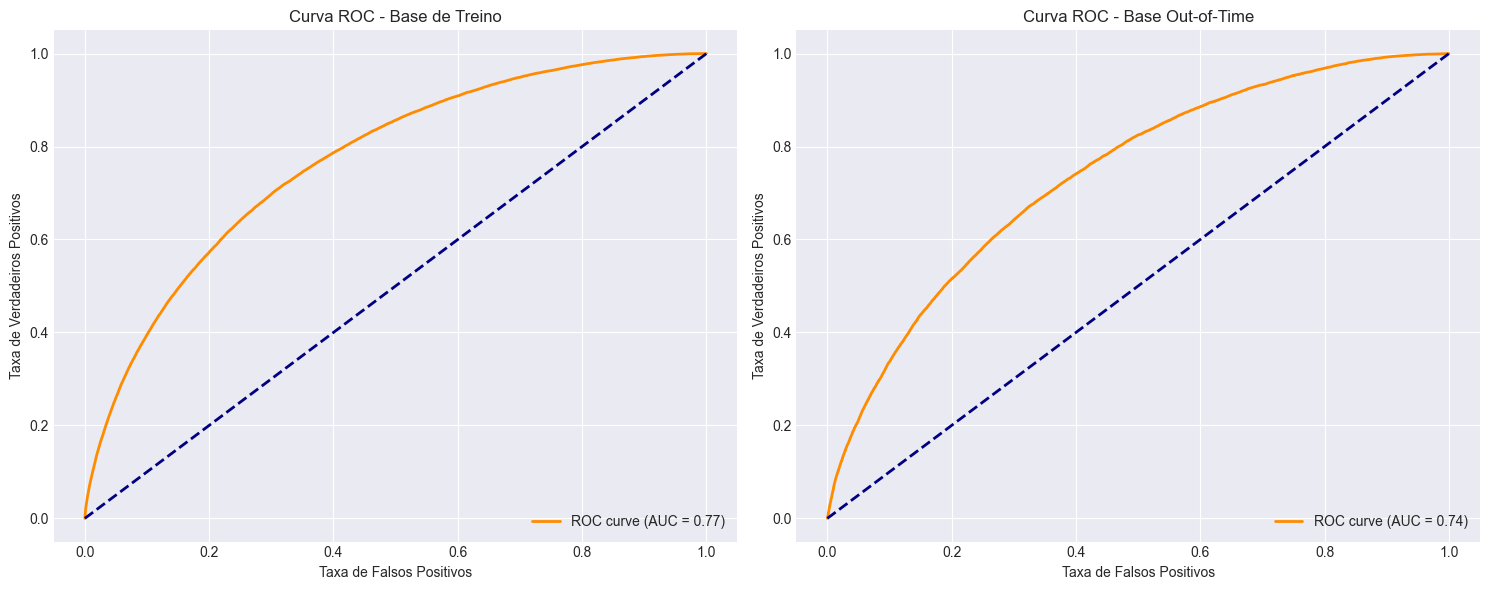

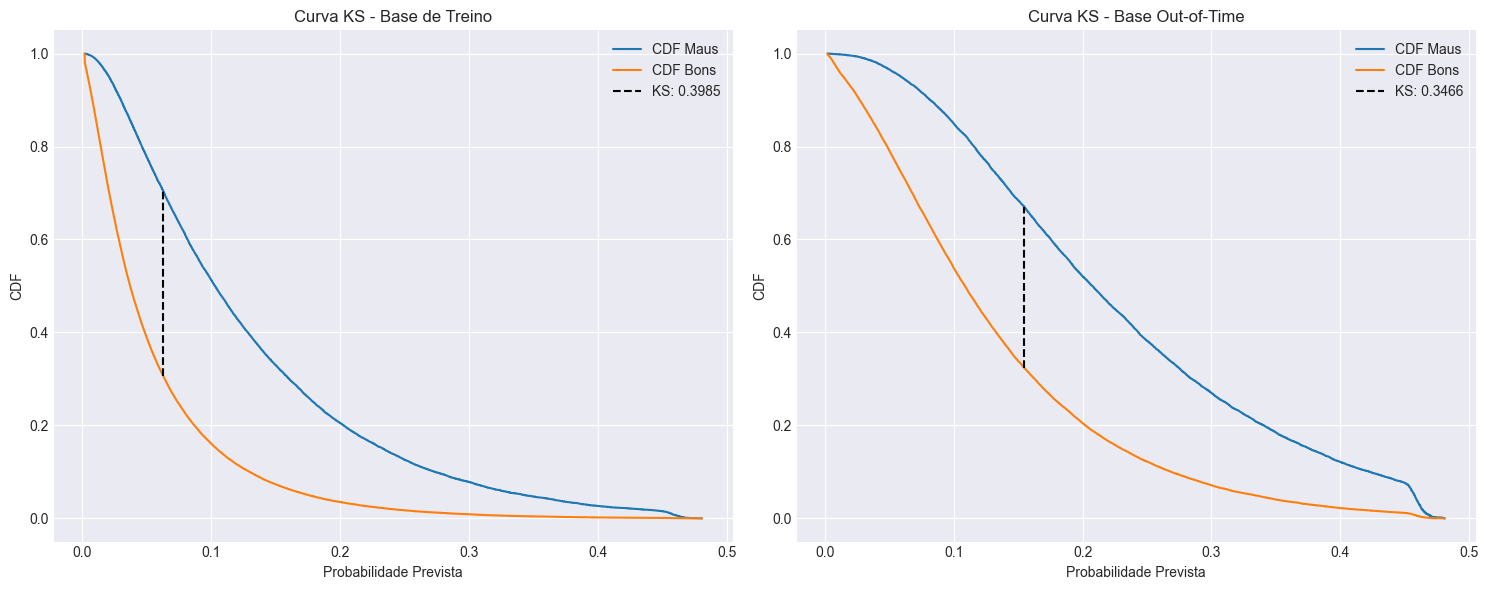

In [10]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# --- Re-carregar e preparar os dados (garantir um ponto de partida limpo) ---
df = pd.read_feather('C:/Users/igors/OneDrive/Cursos/EBAC/03 - Profissão Cientista de Dados/03 - Cientista de Dados/Module 38 - Regressão Logística II/Exercício 2/credit_scoring.ftr')
df['data_ref'] = pd.to_datetime(df['data_ref'])

datas_unicas = df['data_ref'].sort_values().unique()
datas_oot = datas_unicas[-3:]
df_oot = df[df['data_ref'].isin(datas_oot)].copy()
df_train = df[~df['data_ref'].isin(datas_oot)].copy()

# --- Agrupamento de Categorias (feito ANTES do pipeline para simplificar) ---
df_train['educacao_agrupada'] = df_train['educacao'].replace({'Fundamental': 'Outros_Educacao', 'Pós graduação': 'Superior_Completo'})
df_oot['educacao_agrupada'] = df_oot['educacao'].replace({'Fundamental': 'Outros_Educacao', 'Pós graduação': 'Superior_Completo'})
df_train['estado_civil_agrupado'] = df_train['estado_civil'].replace({'União': 'Outros_Civil', 'Separado': 'Outros_Civil', 'Viúvo': 'Outros_Civil'})
df_oot['estado_civil_agrupado'] = df_oot['estado_civil'].replace({'União': 'Outros_Civil', 'Separado': 'Outros_Civil', 'Viúvo': 'Outros_Civil'})
df_train['tipo_residencia_agrupada'] = df_train['tipo_residencia'].replace({'Com os pais': 'Outros_Residencia', 'Governamental': 'Outros_Residencia', 'Aluguel': 'Outros_Residencia', 'Estúdio': 'Outros_Residencia', 'Comunitário': 'Outros_Residencia'})
df_oot['tipo_residencia_agrupada'] = df_oot['tipo_residencia'].replace({'Com os pais': 'Outros_Residencia', 'Governamental': 'Outros_Residencia', 'Aluguel': 'Outros_Residencia', 'Estúdio': 'Outros_Residencia', 'Comunitário': 'Outros_Residencia'})

# --- TRATAMENTO INICIAL DE MISSINGS E LOG-TRANSFORMAÇÃO PARA RENDA ---
# Aplicaremos a imputação de tempo_emprego com a mediana ANTES da winsorization
# para que a mediana seja calculada sobre a distribuição completa (sem NaNs) antes do capping.
# A log-transformação da renda também deve vir antes para que o capping seja feito na escala logarítmica.

mediana_tempo_emprego_train = df_train['tempo_emprego'].median()
df_train['tempo_emprego'] = df_train['tempo_emprego'].fillna(mediana_tempo_emprego_train)
df_oot['tempo_emprego'] = df_oot['tempo_emprego'].fillna(mediana_tempo_emprego_train)

df_train['renda_log'] = df_train['renda'].apply(lambda x: np.log(x + 1))
df_oot['renda_log'] = df_oot['renda'].apply(lambda x: np.log(x + 1))

print("--- Distribuição antes do Capping (Renda Log e Tempo de Emprego) ---")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_train['renda_log'])
plt.title('Box Plot de renda_log (Treino) - Antes do Capping')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_train['tempo_emprego'])
plt.title('Box Plot de tempo_emprego (Treino) - Antes do Capping')
plt.tight_layout()
plt.show()

# --- Funções para calcular limites IQR e aplicar Winsorization (Capping) ---
def get_iqr_limits(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return lower_bound, upper_bound

def apply_winsorization(series, lower_bound, upper_bound):
    return np.clip(series, lower_bound, upper_bound)

# --- Identificação e Aplicação do Capping para 'renda_log' ---
print("\n--- Aplicando Capping para 'renda_log' ---")
lower_bound_renda_log, upper_bound_renda_log = get_iqr_limits(df_train['renda_log'])
df_train['renda_log_capped'] = apply_winsorization(df_train['renda_log'], lower_bound_renda_log, upper_bound_renda_log)
df_oot['renda_log_capped'] = apply_winsorization(df_oot['renda_log'], lower_bound_renda_log, upper_bound_renda_log) # Aplicar os mesmos limites no OOT

print(f"Limites de Capping para renda_log: Inferior={lower_bound_renda_log:.2f}, Superior={upper_bound_renda_log:.2f}")
print(f"Número de outliers abaixo do limite inferior (treino): {(df_train['renda_log'] < lower_bound_renda_log).sum()}")
print(f"Número de outliers acima do limite superior (treino): {(df_train['renda_log'] > upper_bound_renda_log).sum()}")

# --- Identificação e Aplicação do Capping para 'tempo_emprego' ---
print("\n--- Aplicando Capping para 'tempo_emprego' ---")
lower_bound_tempo_emprego, upper_bound_tempo_emprego = get_iqr_limits(df_train['tempo_emprego'])
df_train['tempo_emprego_capped'] = apply_winsorization(df_train['tempo_emprego'], lower_bound_tempo_emprego, upper_bound_tempo_emprego)
df_oot['tempo_emprego_capped'] = apply_winsorization(df_oot['tempo_emprego'], lower_bound_tempo_emprego, upper_bound_tempo_emprego) # Aplicar os mesmos limites no OOT

print(f"Limites de Capping para tempo_emprego: Inferior={lower_bound_tempo_emprego:.2f}, Superior={upper_bound_tempo_emprego:.2f}")
print(f"Número de outliers abaixo do limite inferior (treino): {(df_train['tempo_emprego'] < lower_bound_tempo_emprego).sum()}")
print(f"Número de outliers acima do limite superior (treino): {(df_train['tempo_emprego'] > upper_bound_tempo_emprego).sum()}")


print("\n--- Distribuição após o Capping (Renda Log Capped e Tempo de Emprego Capped) ---")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_train['renda_log_capped'])
plt.title('Box Plot de renda_log_capped (Treino) - Após Capping')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_train['tempo_emprego_capped'])
plt.title('Box Plot de tempo_emprego_capped (Treino) - Após Capping')
plt.tight_layout()
plt.show()


# --- Definição de Variáveis para o Pipeline Atualizado ---
# Agora usaremos as colunas '_capped' em vez das originais ou '_log'
numerical_cols_capped = ['tempo_emprego_capped', 'renda_log_capped', 'qtd_filhos', 'idade', 'qt_pessoas_residencia']
# Não precisamos mais de imputação no pipeline para tempo_emprego, pois já foi tratada.
# Também não precisamos de log_transform para renda, pois já temos renda_log_capped.

categorical_cols = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
    'educacao_agrupada', 'estado_civil_agrupado', 'tipo_residencia_agrupada'
]

# --- Criação do Pré-processador (ColumnTransformer) Atualizado ---
# Removemos os transformadores de imputação e log, pois o capping já tratou essas variáveis
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num_capped', 'passthrough', numerical_cols_capped) # Agora estas colunas são pass-through
    ],
    remainder='drop'
)

# --- Montando o Pipeline Completo (Pré-processamento + Modelo) ---

# Ajustar e transformar os dados de treino
X_train_processed = preprocessor.fit_transform(df_train)
X_oot_processed = preprocessor.transform(df_oot)

# Obter nomes das colunas após o pré-processamento
# O order da 'feature_names' deve corresponder à order dos transformers no ColumnTransformer
feature_names_cat = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
feature_names = feature_names_cat + numerical_cols_capped # Ordem conforme o ColumnTransformer

# Criar DataFrames processados com nomes de colunas
X_train_final = pd.DataFrame(X_train_processed, columns=feature_names, index=df_train.index)
X_oot_final = pd.DataFrame(X_oot_processed, columns=feature_names, index=df_oot.index)

y_train = df_train['mau']
y_oot = df_oot['mau']

print("\n--- Pipeline de Pré-processamento Aplicado (Com Capping) ---")
print(f"Dimensões de X_train_final: {X_train_final.shape}")
print(f"Dimensões de X_oot_final: {X_oot_final.shape}")
print(f"Primeiras 5 colunas de X_train_final: {X_train_final.columns.tolist()[:5]}...")


# --- Desenvolvimento do Modelo de Regressão Logística (com statsmodels) ---
print("\n--- Desenvolvendo o Modelo de Regressão Logística (Com Capping) ---")

# Adicionar uma constante ao conjunto de features para o intercepto do modelo
X_train_sm = sm.add_constant(X_train_final)
X_oot_sm = sm.add_constant(X_oot_final)

modelo_logistico = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
resultado_logistico = modelo_logistico.fit()

print("\n--- Resumo do Modelo de Regressão Logística (Após Capping) ---")
print(resultado_logistico.summary())


# --- Avaliação do Modelo ---
print("\n--- Avaliação do Poder Discriminante do Modelo (Após Capping) ---")

y_pred_proba_train = resultado_logistico.predict(X_train_sm)
y_pred_proba_oot = resultado_logistico.predict(X_oot_sm)

# Acurácia
y_pred_class_train = (y_pred_proba_train > 0.5).astype(int)
y_pred_class_oot = (y_pred_proba_oot > 0.5).astype(int)
acuracia_train = accuracy_score(y_train, y_pred_class_train)
acuracia_oot = accuracy_score(y_oot, y_pred_class_oot)
print("--- Acurácia ---")
print(f"Acurácia (Base de Treino): {acuracia_train:.4f}")
print(f"Acurácia (Base Out-of-Time): {acuracia_oot:.4f}\n")

# Gini
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)
gini_train = 2 * roc_auc_train - 1
fpr_oot, tpr_oot, _ = roc_curve(y_oot, y_pred_proba_oot)
roc_auc_oot = auc(fpr_oot, tpr_oot)
gini_oot = 2 * roc_auc_oot - 1
print("--- Coeficiente de Gini ---")
print(f"Gini (Base de Treino): {gini_train:.4f}")
print(f"Gini (Base Out-of-Time): {gini_oot:.4f}\n")

# KS
def calculate_ks(y_true, y_proba):
    df_results = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
    df_results.sort_values(by='y_proba', ascending=False, inplace=True)
    df_results.reset_index(drop=True, inplace=True) # Resetar índice
    df_results['cum_bad'] = df_results['y_true'].cumsum()
    df_results['cum_good'] = (1 - df_results['y_true']).cumsum()
    total_bad = df_results['y_true'].sum()
    total_good = (1 - df_results['y_true']).sum()
    cdf_bad = df_results['cum_bad'] / total_bad if total_bad > 0 else 0
    cdf_good = df_results['cum_good'] / total_good if total_good > 0 else 0
    ks_value = np.max(np.abs(cdf_bad - cdf_good))
    return ks_value, cdf_bad, cdf_good, df_results['y_proba']

ks_train, cdf_bad_train, cdf_good_train, proba_sorted_train = calculate_ks(y_train, y_pred_proba_train)
ks_oot, cdf_bad_oot, cdf_good_oot, proba_sorted_oot = calculate_ks(y_oot, y_pred_proba_oot)
print("--- Kolmogorov-Smirnov (KS) ---")
print(f"KS (Base de Treino): {ks_train:.4f}")
print(f"KS (Base Out-of-Time): {ks_oot:.4f}\n")

# Plotagens
plt.figure(figsize=(15, 6))
# ROC Treino
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base de Treino'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
# ROC OOT
plt.subplot(1, 2, 2)
plt.plot(fpr_oot, tpr_oot, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_oot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base Out-of-Time'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
plt.tight_layout(); plt.show()

plt.figure(figsize=(15, 6))
# KS Treino
plt.subplot(1, 2, 1)
plt.plot(proba_sorted_train, cdf_bad_train, label='CDF Maus')
plt.plot(proba_sorted_train, cdf_good_train, label='CDF Bons')
max_ks_idx_train = np.argmax(np.abs(cdf_bad_train - cdf_good_train))
plt.plot([proba_sorted_train.iloc[max_ks_idx_train], proba_sorted_train.iloc[max_ks_idx_train]],
         [cdf_good_train.iloc[max_ks_idx_train], cdf_bad_train.iloc[max_ks_idx_train]], 'k--', label=f'KS: {ks_train:.4f}')
plt.title('Curva KS - Base de Treino'); plt.xlabel('Probabilidade Prevista'); plt.ylabel('CDF'); plt.legend()
# KS OOT
plt.subplot(1, 2, 2)
plt.plot(proba_sorted_oot, cdf_bad_oot, label='CDF Maus')
plt.plot(proba_sorted_oot, cdf_good_oot, label='CDF Bons')
max_ks_idx_oot = np.argmax(np.abs(cdf_bad_oot - cdf_good_oot))
plt.plot([proba_sorted_oot.iloc[max_ks_idx_oot], proba_sorted_oot.iloc[max_ks_idx_oot]],
         [cdf_good_oot.iloc[max_ks_idx_oot], cdf_bad_oot.iloc[max_ks_idx_oot]], 'k--', label=f'KS: {ks_oot:.4f}')
plt.title('Curva KS - Base Out-of-Time'); plt.xlabel('Probabilidade Prevista'); plt.ylabel('CDF'); plt.legend()
plt.tight_layout(); plt.show()

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

--- Dados Pré-processados para Seleção de Variáveis ---
Dimensões Iniciais de X_train_final: (600000, 26)
Dimensões Iniciais de X_oot_final: (150000, 26)

--- Iniciando Seleção de Variáveis por Backward Elimination ---
Removendo: tempo_emprego_capped (p-valor: 0.3036)
Removendo: idade (p-valor: 0.1697)
Removendo: qtd_filhos (p-valor: 0.1513)
Removendo: qt_pessoas_residencia (p-valor: 0.6738)

Todas as variáveis restantes são significativas.

Variáveis Selecionadas para o Modelo Final: ['sexo_F', 'sexo_M', 'posse_de_veiculo_N', 'posse_de_veiculo_S', 'posse_de_imovel_N', 'posse_de_imovel_S', 'tipo_renda_Assalariado', 'tipo_renda_Bolsista', 'tipo_renda_Empresário', 'tipo_renda_Pensionista', 'tipo_renda_Servidor público', 'educacao_agrupada_Médio', 'educacao_agrupada_Outros_Educacao', 'educacao_agrupada_Superior completo', 'educacao_agrupada_Superior incompleto', 'educacao_agrupada_Superior_Completo', 'estado_civil_agrupado_Casado', 'estado_civil_agrupado_Outros_Civil', 'estado_civil_agrup

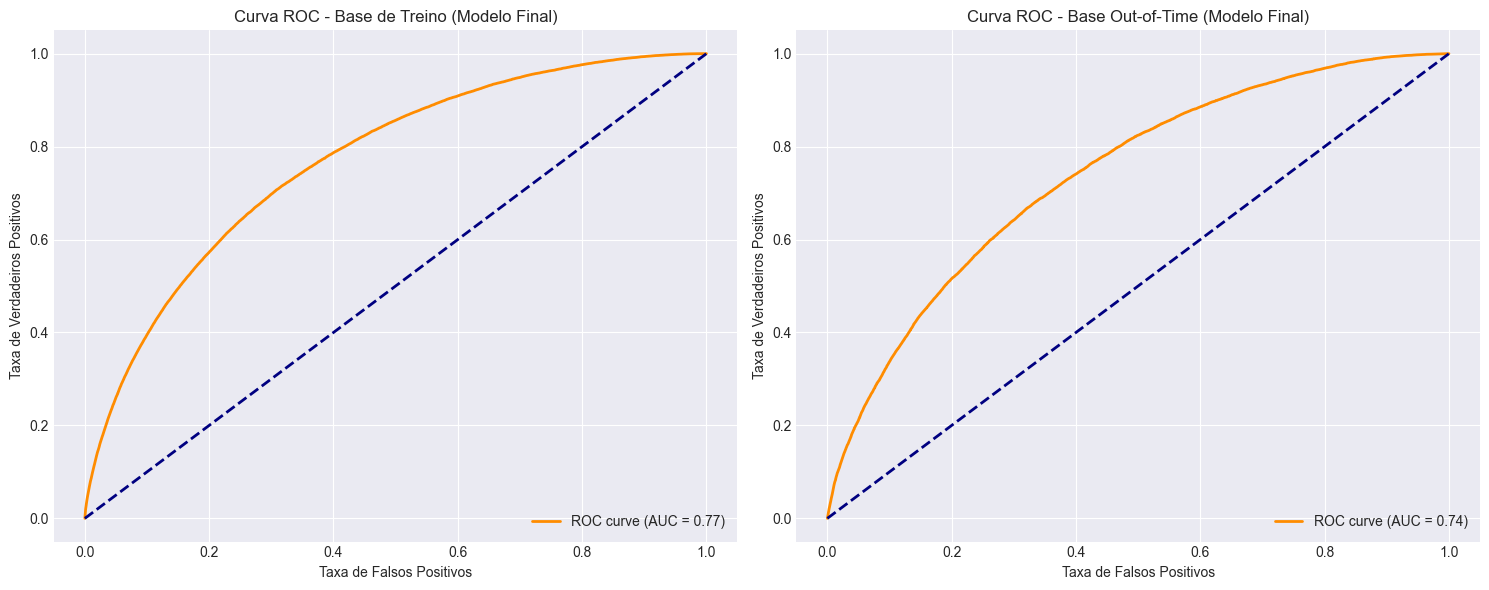

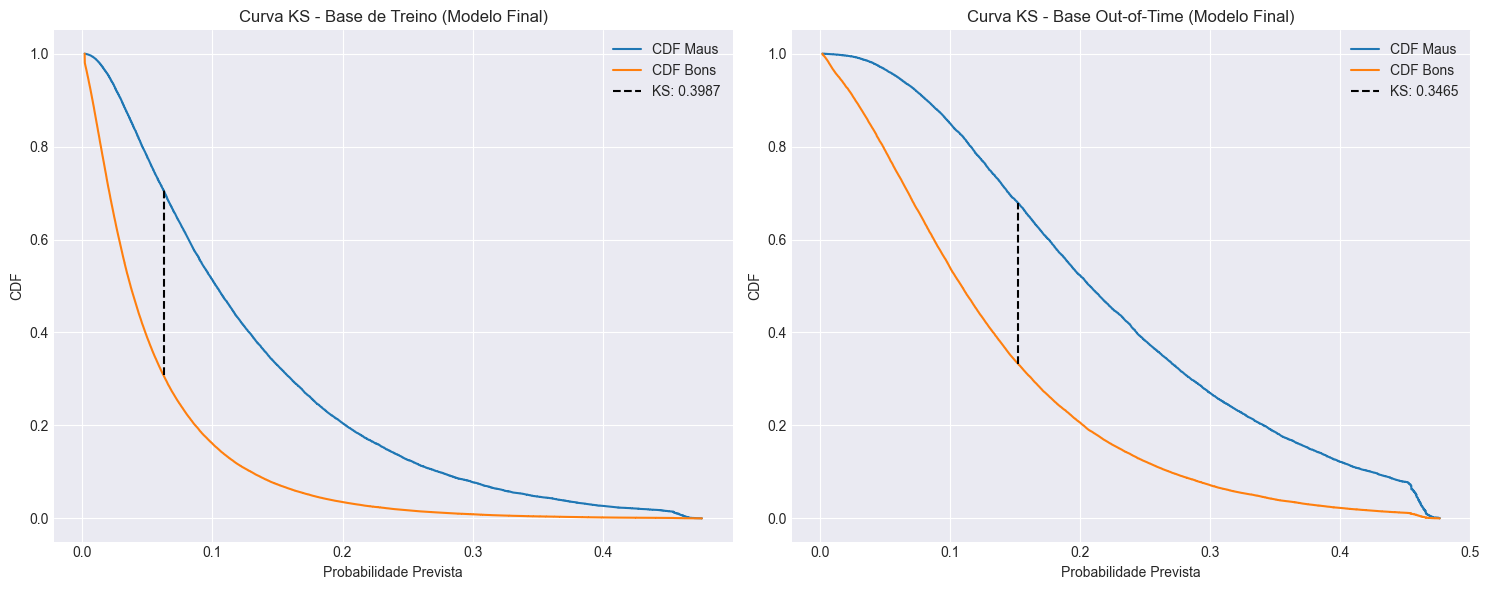


--- Seleção de Variáveis e Avaliação do Modelo Final Concluídas ---


In [11]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# --- Re-carregar e preparar os dados (garantir um ponto de partida limpo) ---
df = pd.read_feather('C:/Users/igors/OneDrive/Cursos/EBAC/03 - Profissão Cientista de Dados/03 - Cientista de Dados/Module 38 - Regressão Logística II/Exercício 2/credit_scoring.ftr')
df['data_ref'] = pd.to_datetime(df['data_ref'])

datas_unicas = df['data_ref'].sort_values().unique()
datas_oot = datas_unicas[-3:]
df_oot = df[df['data_ref'].isin(datas_oot)].copy()
df_train = df[~df['data_ref'].isin(datas_oot)].copy()

# --- Agrupamento de Categorias ---
df_train['educacao_agrupada'] = df_train['educacao'].replace({'Fundamental': 'Outros_Educacao', 'Pós graduação': 'Superior_Completo'})
df_oot['educacao_agrupada'] = df_oot['educacao'].replace({'Fundamental': 'Outros_Educacao', 'Pós graduação': 'Superior_Completo'})
df_train['estado_civil_agrupado'] = df_train['estado_civil'].replace({'União': 'Outros_Civil', 'Separado': 'Outros_Civil', 'Viúvo': 'Outros_Civil'})
df_oot['estado_civil_agrupado'] = df_oot['estado_civil'].replace({'União': 'Outros_Civil', 'Separado': 'Outros_Civil', 'Viúvo': 'Outros_Civil'})
df_train['tipo_residencia_agrupada'] = df_train['tipo_residencia'].replace({'Com os pais': 'Outros_Residencia', 'Governamental': 'Outros_Residencia', 'Aluguel': 'Outros_Residencia', 'Estúdio': 'Outros_Residencia', 'Comunitário': 'Outros_Residencia'})
df_oot['tipo_residencia_agrupada'] = df_oot['tipo_residencia'].replace({'Com os pais': 'Outros_Residencia', 'Governamental': 'Outros_Residencia', 'Aluguel': 'Outros_Residencia', 'Estúdio': 'Outros_Residencia', 'Comunitário': 'Outros_Residencia'})

# --- TRATAMENTO DE MISSINGS E LOG-TRANSFORMAÇÃO PARA RENDA ---
mediana_tempo_emprego_train = df_train['tempo_emprego'].median()
df_train['tempo_emprego'] = df_train['tempo_emprego'].fillna(mediana_tempo_emprego_train)
df_oot['tempo_emprego'] = df_oot['tempo_emprego'].fillna(mediana_tempo_emprego_train)

df_train['renda_log'] = df_train['renda'].apply(lambda x: np.log(x + 1))
df_oot['renda_log'] = df_oot['renda'].apply(lambda x: np.log(x + 1))

# --- Aplicação do Capping para 'renda_log' e 'tempo_emprego' ---
def get_iqr_limits(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return lower_bound, upper_bound

def apply_winsorization(series, lower_bound, upper_bound):
    return np.clip(series, lower_bound, upper_bound)

lower_bound_renda_log, upper_bound_renda_log = get_iqr_limits(df_train['renda_log'])
df_train['renda_log_capped'] = apply_winsorization(df_train['renda_log'], lower_bound_renda_log, upper_bound_renda_log)
df_oot['renda_log_capped'] = apply_winsorization(df_oot['renda_log'], lower_bound_renda_log, upper_bound_renda_log)

lower_bound_tempo_emprego, upper_bound_tempo_emprego = get_iqr_limits(df_train['tempo_emprego'])
df_train['tempo_emprego_capped'] = apply_winsorization(df_train['tempo_emprego'], lower_bound_tempo_emprego, upper_bound_tempo_emprego)
df_oot['tempo_emprego_capped'] = apply_winsorization(df_oot['tempo_emprego'], lower_bound_tempo_emprego, upper_bound_tempo_emprego)

# --- Definição de Variáveis para o Pipeline ---
numerical_cols_capped = ['tempo_emprego_capped', 'renda_log_capped', 'qtd_filhos', 'idade', 'qt_pessoas_residencia']
categorical_cols = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
    'educacao_agrupada', 'estado_civil_agrupado', 'tipo_residencia_agrupada'
]

# --- Criação do Pré-processador (ColumnTransformer) ---
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num_capped', 'passthrough', numerical_cols_capped)
    ],
    remainder='drop'
)

# Ajustar e transformar os dados de treino
X_train_processed = preprocessor.fit_transform(df_train)
X_oot_processed = preprocessor.transform(df_oot)

# Obter nomes das colunas após o pré-processamento
feature_names_cat = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
feature_names = feature_names_cat + numerical_cols_capped

X_train_final = pd.DataFrame(X_train_processed, columns=feature_names, index=df_train.index)
X_oot_final = pd.DataFrame(X_oot_processed, columns=feature_names, index=df_oot.index)

y_train = df_train['mau']
y_oot = df_oot['mau']

print("--- Dados Pré-processados para Seleção de Variáveis ---")
print(f"Dimensões Iniciais de X_train_final: {X_train_final.shape}")
print(f"Dimensões Iniciais de X_oot_final: {X_oot_final.shape}\n")


# --- Implementação da Seleção de Variáveis (Backward Elimination) ---

def backward_elimination(X_train, y_train, alpha=0.05):
    features = list(X_train.columns)
    significant_features = []
    
    while True:
        model = sm.GLM(y_train, sm.add_constant(X_train[features]), family=sm.families.Binomial())
        result = model.fit()
        p_values = result.pvalues
        
        # Encontrar o maior p-valor, excluindo a constante
        p_values_no_const = p_values.drop('const')
        max_p_value = p_values_no_const.max()
        
        if max_p_value > alpha:
            # Remover a variável com o maior p-valor
            feature_to_remove = p_values_no_const.idxmax()
            features.remove(feature_to_remove)
            print(f"Removendo: {feature_to_remove} (p-valor: {max_p_value:.4f})")
        else:
            # Todas as variáveis restantes são significativas
            significant_features = features
            print("\nTodas as variáveis restantes são significativas.")
            break
            
        if not features: # Caso todas as features sejam removidas
            print("\nTodas as features foram removidas.")
            break
            
    return significant_features

print("--- Iniciando Seleção de Variáveis por Backward Elimination ---")
selected_features = backward_elimination(X_train_final, y_train, alpha=0.05)

print(f"\nVariáveis Selecionadas para o Modelo Final: {selected_features}")

# --- Retreinando o Modelo com as Variáveis Selecionadas ---
X_train_selected = X_train_final[selected_features]
X_oot_selected = X_oot_final[selected_features]

X_train_sm_selected = sm.add_constant(X_train_selected)
X_oot_sm_selected = sm.add_constant(X_oot_selected)

modelo_final = sm.GLM(y_train, X_train_sm_selected, family=sm.families.Binomial())
resultado_final = modelo_final.fit()

print("\n--- Resumo do Modelo Final (Após Seleção de Variáveis) ---")
print(resultado_final.summary())


# --- Avaliação do Modelo Final ---
print("\n--- Avaliação do Poder Discriminante do Modelo Final ---")

y_pred_proba_train_final = resultado_final.predict(X_train_sm_selected)
y_pred_proba_oot_final = resultado_final.predict(X_oot_sm_selected)

# Acurácia
y_pred_class_train_final = (y_pred_proba_train_final > 0.5).astype(int)
y_pred_class_oot_final = (y_pred_proba_oot_final > 0.5).astype(int)
acuracia_train_final = accuracy_score(y_train, y_pred_class_train_final)
acuracia_oot_final = accuracy_score(y_oot, y_pred_class_oot_final)
print("--- Acurácia ---")
print(f"Acurácia (Base de Treino): {acuracia_train_final:.4f}")
print(f"Acurácia (Base Out-of-Time): {acuracia_oot_final:.4f}\n")

# Gini
fpr_train_final, tpr_train_final, _ = roc_curve(y_train, y_pred_proba_train_final)
roc_auc_train_final = auc(fpr_train_final, tpr_train_final)
gini_train_final = 2 * roc_auc_train_final - 1
fpr_oot_final, tpr_oot_final, _ = roc_curve(y_oot, y_pred_proba_oot_final)
roc_auc_oot_final = auc(fpr_oot_final, tpr_oot_final)
gini_oot_final = 2 * roc_auc_oot_final - 1
print("--- Coeficiente de Gini ---")
print(f"Gini (Base de Treino): {gini_train_final:.4f}")
print(f"Gini (Base Out-of-Time): {gini_oot_final:.4f}\n")

# KS
def calculate_ks(y_true, y_proba):
    df_results = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
    df_results.sort_values(by='y_proba', ascending=False, inplace=True)
    df_results.reset_index(drop=True, inplace=True)
    df_results['cum_bad'] = df_results['y_true'].cumsum()
    df_results['cum_good'] = (1 - df_results['y_true']).cumsum()
    total_bad = df_results['y_true'].sum()
    total_good = (1 - df_results['y_true']).sum()
    cdf_bad = df_results['cum_bad'] / total_bad if total_bad > 0 else 0
    cdf_good = df_results['cum_good'] / total_good if total_good > 0 else 0
    ks_value = np.max(np.abs(cdf_bad - cdf_good))
    return ks_value, cdf_bad, cdf_good, df_results['y_proba']

ks_train_final, cdf_bad_train_final, cdf_good_train_final, proba_sorted_train_final = calculate_ks(y_train, y_pred_proba_train_final)
ks_oot_final, cdf_bad_oot_final, cdf_good_oot_final, proba_sorted_oot_final = calculate_ks(y_oot, y_pred_proba_oot_final)
print("--- Kolmogorov-Smirnov (KS) ---")
print(f"KS (Base de Treino): {ks_train_final:.4f}")
print(f"KS (Base Out-of-Time): {ks_oot_final:.4f}\n")

# Plotagens Finais
plt.figure(figsize=(15, 6))
# ROC Treino
plt.subplot(1, 2, 1)
plt.plot(fpr_train_final, tpr_train_final, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_train_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base de Treino (Modelo Final)'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
# ROC OOT
plt.subplot(1, 2, 2)
plt.plot(fpr_oot_final, tpr_oot_final, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_oot_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base Out-of-Time (Modelo Final)'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
plt.tight_layout(); plt.show()

plt.figure(figsize=(15, 6))
# KS Treino
plt.subplot(1, 2, 1)
plt.plot(proba_sorted_train_final, cdf_bad_train_final, label='CDF Maus')
plt.plot(proba_sorted_train_final, cdf_good_train_final, label='CDF Bons')
max_ks_idx_train_final = np.argmax(np.abs(cdf_bad_train_final - cdf_good_train_final))
plt.plot([proba_sorted_train_final.iloc[max_ks_idx_train_final], proba_sorted_train_final.iloc[max_ks_idx_train_final]],
         [cdf_good_train_final.iloc[max_ks_idx_train_final], cdf_bad_train_final.iloc[max_ks_idx_train_final]], 'k--', label=f'KS: {ks_train_final:.4f}')
plt.title('Curva KS - Base de Treino (Modelo Final)'); plt.xlabel('Probabilidade Prevista'); plt.ylabel('CDF'); plt.legend()
# KS OOT
plt.subplot(1, 2, 2)
plt.plot(proba_sorted_oot_final, cdf_bad_oot_final, label='CDF Maus')
plt.plot(proba_sorted_oot_final, cdf_good_oot_final, label='CDF Bons')
max_ks_idx_oot_final = np.argmax(np.abs(cdf_bad_oot_final - cdf_good_oot_final))
plt.plot([proba_sorted_oot_final.iloc[max_ks_idx_oot_final], proba_sorted_oot_final.iloc[max_ks_idx_oot_final]],
         [cdf_good_oot_final.iloc[max_ks_idx_oot_final], cdf_bad_oot_final.iloc[max_ks_idx_oot_final]], 'k--', label=f'KS: {ks_oot_final:.4f}')
plt.title('Curva KS - Base Out-of-Time (Modelo Final)'); plt.xlabel('Probabilidade Prevista'); plt.ylabel('CDF'); plt.legend()
plt.tight_layout(); plt.show()

print("\n--- Seleção de Variáveis e Avaliação do Modelo Final Concluídas ---")

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

--- Aplicando Pré-processamento com PCA ---
Dimensões de X_train_final_pca após PCA: (600000, 26)
Dimensões de X_oot_final_pca após PCA: (150000, 26)
Primeiras 5 colunas de X_train_final_pca: ['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4']...

--- Variância Explicada por Componente Principal (PCA) ---
Componente 1: 0.4305 (43.05%)
Componente 2: 0.3232 (32.32%)
Componente 3: 0.1489 (14.89%)
Componente 4: 0.0757 (7.57%)
Componente 5: 0.0218 (2.18%)
Variância Cumulativa Explicada: 1.0000 (100.00%)

--- Desenvolvendo o Modelo de Regressão Logística (Após PCA) ---

--- Resumo do Modelo de Regressão Logística (Após PCA) ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    mau   No. Observations:               600000
Model:                            GLM   Df Residuals:                   599980
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:              

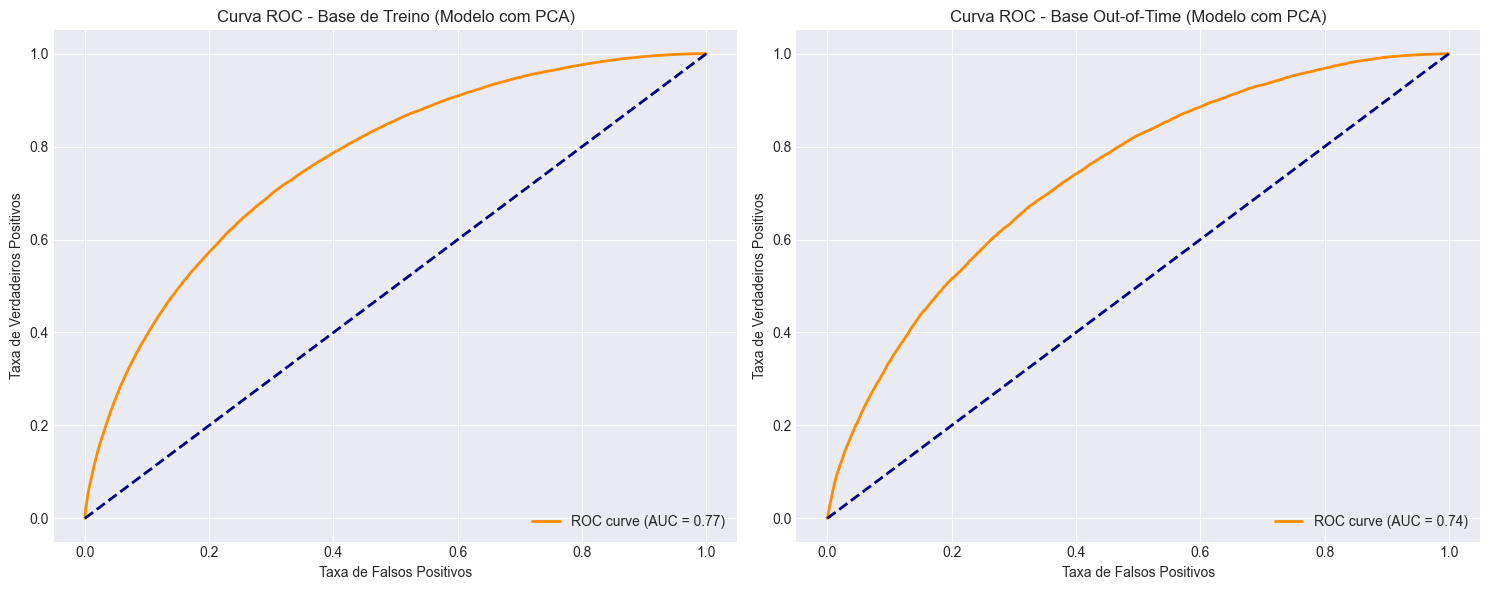

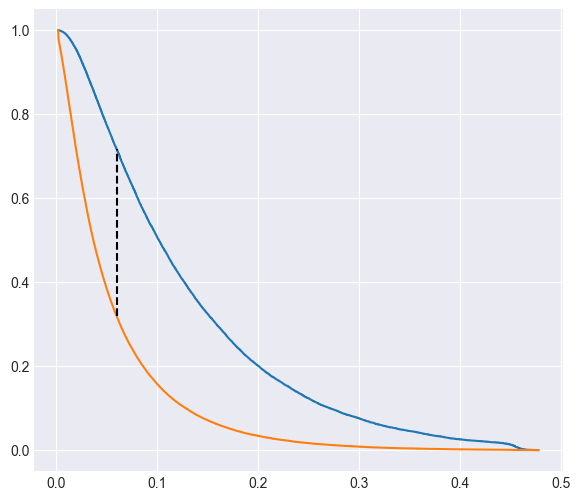

In [12]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA # Importar PCA
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# --- Re-carregar e preparar os dados (garantir um ponto de partida limpa) ---
df = pd.read_feather('C:/Users/igors/OneDrive/Cursos/EBAC/03 - Profissão Cientista de Dados/03 - Cientista de Dados/Module 38 - Regressão Logística II/Exercício 2/credit_scoring.ftr')
df['data_ref'] = pd.to_datetime(df['data_ref'])

datas_unicas = df['data_ref'].sort_values().unique()
datas_oot = datas_unicas[-3:]
df_oot = df[df['data_ref'].isin(datas_oot)].copy()
df_train = df[~df['data_ref'].isin(datas_oot)].copy()

# --- Agrupamento de Categorias ---
df_train['educacao_agrupada'] = df_train['educacao'].replace({'Fundamental': 'Outros_Educacao', 'Pós graduação': 'Superior_Completo'})
df_oot['educacao_agrupada'] = df_oot['educacao'].replace({'Fundamental': 'Outros_Educacao', 'Pós graduação': 'Superior_Completo'})
df_train['estado_civil_agrupado'] = df_train['estado_civil'].replace({'União': 'Outros_Civil', 'Separado': 'Outros_Civil', 'Viúvo': 'Outros_Civil'})
df_oot['estado_civil_agrupado'] = df_oot['estado_civil'].replace({'União': 'Outros_Civil', 'Separado': 'Outros_Civil', 'Viúvo': 'Outros_Civil'})
df_train['tipo_residencia_agrupada'] = df_train['tipo_residencia'].replace({'Com os pais': 'Outros_Residencia', 'Governamental': 'Outros_Residencia', 'Aluguel': 'Outros_Residencia', 'Estúdio': 'Outros_Residencia', 'Comunitário': 'Outros_Residencia'})
df_oot['tipo_residencia_agrupada'] = df_oot['tipo_residencia'].replace({'Com os pais': 'Outros_Residencia', 'Governamental': 'Outros_Residencia', 'Aluguel': 'Outros_Residencia', 'Estúdio': 'Outros_Residencia', 'Comunitário': 'Outros_Residencia'})

# --- TRATAMENTO DE MISSINGS E LOG-TRANSFORMAÇÃO PARA RENDA ---
mediana_tempo_emprego_train = df_train['tempo_emprego'].median()
df_train['tempo_emprego'] = df_train['tempo_emprego'].fillna(mediana_tempo_emprego_train)
df_oot['tempo_emprego'] = df_oot['tempo_emprego'].fillna(mediana_tempo_emprego_train)

df_train['renda_log'] = df_train['renda'].apply(lambda x: np.log(x + 1))
df_oot['renda_log'] = df_oot['renda'].apply(lambda x: np.log(x + 1))

# --- Aplicação do Capping para 'renda_log' e 'tempo_emprego' ---
def get_iqr_limits(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return lower_bound, upper_bound

def apply_winsorization(series, lower_bound, upper_bound):
    return np.clip(series, lower_bound, upper_bound)

lower_bound_renda_log, upper_bound_renda_log = get_iqr_limits(df_train['renda_log'])
df_train['renda_log_capped'] = apply_winsorization(df_train['renda_log'], lower_bound_renda_log, upper_bound_renda_log)
df_oot['renda_log_capped'] = apply_winsorization(df_oot['renda_log'], lower_bound_renda_log, upper_bound_renda_log)

lower_bound_tempo_emprego, upper_bound_tempo_emprego = get_iqr_limits(df_train['tempo_emprego'])
df_train['tempo_emprego_capped'] = apply_winsorization(df_train['tempo_emprego'], lower_bound_tempo_emprego, upper_bound_tempo_emprego)
df_oot['tempo_emprego_capped'] = apply_winsorization(df_oot['tempo_emprego'], lower_bound_tempo_emprego, upper_bound_tempo_emprego)


# --- Definição de Variáveis para o Pipeline com PCA ---
numerical_cols_for_pca = [
    'tempo_emprego_capped', 'renda_log_capped', 'qtd_filhos', 'idade', 'qt_pessoas_residencia'
]
categorical_cols = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
    'educacao_agrupada', 'estado_civil_agrupado', 'tipo_residencia_agrupada'
]

# --- Criação do Pré-processador (ColumnTransformer) Atualizado com PCA ---
numeric_transformer_pca = Pipeline(steps=[
    ('scaler', StandardScaler()), # Padronizar variáveis numéricas
    ('pca', PCA(n_components=5)) # Aplicar PCA para 5 componentes
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor_pca = ColumnTransformer(
    transformers=[
        ('num_pca', numeric_transformer_pca, numerical_cols_for_pca),
        ('cat_ohe', categorical_transformer, categorical_cols)
    ],
    remainder='drop' # Descarta colunas não especificadas
)

# --- Montando o Pipeline Completo (Pré-processamento com PCA + Modelo) ---

print("--- Aplicando Pré-processamento com PCA ---")
X_train_processed_pca = preprocessor_pca.fit_transform(df_train)
X_oot_processed_pca = preprocessor_pca.transform(df_oot)

pca_component_names = [f'pca_{i}' for i in range(preprocessor_pca.named_transformers_['num_pca'].named_steps['pca'].n_components_)]
ohe_feature_names = list(preprocessor_pca.named_transformers_['cat_ohe'].named_steps['onehot'].get_feature_names_out(categorical_cols))

final_feature_names_pca = pca_component_names + ohe_feature_names

X_train_final_pca = pd.DataFrame(X_train_processed_pca, columns=final_feature_names_pca, index=df_train.index)
X_oot_final_pca = pd.DataFrame(X_oot_processed_pca, columns=final_feature_names_pca, index=df_oot.index)

y_train = df_train['mau']
y_oot = df_oot['mau']

print(f"Dimensões de X_train_final_pca após PCA: {X_train_final_pca.shape}")
print(f"Dimensões de X_oot_final_pca após PCA: {X_oot_final_pca.shape}")
print(f"Primeiras 5 colunas de X_train_final_pca: {X_train_final_pca.columns.tolist()[:5]}...")


# --- Análise da Variância Explicada pelo PCA ---
pca_model = preprocessor_pca.named_transformers_['num_pca'].named_steps['pca']
explained_variance_ratio = pca_model.explained_variance_ratio_
print("\n--- Variância Explicada por Componente Principal (PCA) ---")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
print(f"Variância Cumulativa Explicada: {explained_variance_ratio.sum():.4f} ({explained_variance_ratio.sum()*100:.2f}%)")


# --- Desenvolvimento do Modelo de Regressão Logística (com dados do PCA) ---
print("\n--- Desenvolvendo o Modelo de Regressão Logística (Após PCA) ---")

X_train_sm_pca = sm.add_constant(X_train_final_pca)
X_oot_sm_pca = sm.add_constant(X_oot_final_pca)

modelo_pca = sm.GLM(y_train, X_train_sm_pca, family=sm.families.Binomial())
resultado_pca = modelo_pca.fit()

print("\n--- Resumo do Modelo de Regressão Logística (Após PCA) ---")
print(resultado_pca.summary())


# --- Avaliação do Modelo Após PCA ---
print("\n--- Avaliação do Poder Discriminante do Modelo (Após PCA) ---")

y_pred_proba_train_pca = resultado_pca.predict(X_train_sm_pca)
y_pred_proba_oot_pca = resultado_pca.predict(X_oot_sm_pca)

# Acurácia
y_pred_class_train_pca = (y_pred_proba_train_pca > 0.5).astype(int)
y_pred_class_oot_pca = (y_pred_proba_oot_pca > 0.5).astype(int)
acuracia_train_pca = accuracy_score(y_train, y_pred_class_train_pca)
acuracia_oot_pca = accuracy_score(y_oot, y_pred_class_oot_pca)
print("--- Acurácia ---")
print(f"Acurácia (Base de Treino): {acuracia_train_pca:.4f}")
print(f"Acurácia (Base Out-of-Time): {acuracia_oot_pca:.4f}\n")

# Gini
fpr_train_pca, tpr_train_pca, _ = roc_curve(y_train, y_pred_proba_train_pca)
roc_auc_train_pca = auc(fpr_train_pca, tpr_train_pca)
gini_train_pca = 2 * roc_auc_train_pca - 1
fpr_oot_pca, tpr_oot_pca, _ = roc_curve(y_oot, y_pred_proba_oot_pca)
roc_auc_oot_pca = auc(fpr_oot_pca, tpr_oot_pca)
gini_oot_pca = 2 * roc_auc_oot_pca - 1
print("--- Coeficiente de Gini ---")
print(f"Gini (Base de Treino): {gini_train_pca:.4f}")
print(f"Gini (Base Out-of-Time): {gini_oot_pca:.4f}\n")

# KS
def calculate_ks(y_true, y_proba):
    df_results = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
    df_results.sort_values(by='y_proba', ascending=False, inplace=True)
    df_results.reset_index(drop=True, inplace=True)
    
    df_results['cum_bad'] = df_results['y_true'].cumsum()
    df_results['cum_good'] = (1 - df_results['y_true']).cumsum()
    
    total_bad = df_results['y_true'].sum()
    total_good = (1 - df_results['y_true']).sum()
    
    # MODIFICAÇÃO AQUI: Garantir que CDFs sejam séries do mesmo tamanho
    cdf_bad = df_results['cum_bad'] / total_bad if total_bad > 0 else pd.Series(0.0, index=df_results.index)
    cdf_good = df_results['cum_good'] / total_good if total_good > 0 else pd.Series(0.0, index=df_results.index)
    
    ks_value = np.max(np.abs(cdf_bad - cdf_good))
    return ks_value, cdf_bad, cdf_good, df_results['y_proba']

ks_train_pca, cdf_bad_train_pca, cdf_good_train_pca, proba_sorted_train_pca = calculate_ks(y_train, y_pred_proba_train_pca)
ks_oot_pca, cdf_bad_oot_pca, cdf_good_oot_pca, proba_sorted_oot_pca = calculate_ks(y_oot, y_pred_proba_oot_pca)
print("--- Kolmogorov-Smirnov (KS) ---")
print(f"KS (Base de Treino): {ks_train_pca:.4f}")
print(f"KS (Base Out-of-Time): {ks_oot_pca:.4f}\n")

# Plotagens Finais
plt.figure(figsize=(15, 6))
# ROC Treino
plt.subplot(1, 2, 1)
plt.plot(fpr_train_pca, tpr_train_pca, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_train_pca:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base de Treino (Modelo com PCA)'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
# ROC OOT
plt.subplot(1, 2, 2)
plt.plot(fpr_oot_pca, tpr_oot_pca, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_oot_pca:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base Out-of-Time (Modelo com PCA)'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
plt.tight_layout(); plt.show()

plt.figure(figsize=(15, 6))
# KS Treino
plt.subplot(1, 2, 1)
plt.plot(proba_sorted_train_pca, cdf_bad_train_pca, label='CDF Maus')
plt.plot(proba_sorted_train_pca, cdf_good_train_pca, label='CDF Bons')
max_ks_idx_train_pca = np.argmax(np.abs(cdf_bad_train_pca - cdf_good_train_pca))
plt.plot([proba_sorted_train_pca.iloc[max_ks_idx_train_pca], proba_sorted_train_pca.iloc[max_ks_idx_train_pca]],
         [cdf_good_train_pca.iloc[max_ks_idx_train_pca], cdf_bad_train_pca.iloc[max_ks_idx_train_pca]], 'k--', label=f'KS: {ks_train_pca:.4f}')

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

--- Aplicando Pré-processamento com OneHotEncoder e PCA ---
Dimensões de X_train_final_pca após OneHotEncoder e PCA: (600000, 26)
Dimensões de X_oot_final_pca após OneHotEncoder e PCA: (150000, 26)

--- Inspecionando as colunas dummy criadas ---
Todas as colunas no X_train_final_pca:
['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'sexo_F', 'sexo_M', 'posse_de_veiculo_N', 'posse_de_veiculo_S', 'posse_de_imovel_N', 'posse_de_imovel_S', 'tipo_renda_Assalariado', 'tipo_renda_Bolsista', 'tipo_renda_Empresário', 'tipo_renda_Pensionista', 'tipo_renda_Servidor público', 'educacao_agrupada_Médio', 'educacao_agrupada_Outros_Educacao', 'educacao_agrupada_Superior completo', 'educacao_agrupada_Superior incompleto', 'educacao_agrupada_Superior_Completo', 'estado_civil_agrupado_Casado', 'estado_civil_agrupado_Outros_Civil', 'estado_civil_agrupado_Solteiro', 'tipo_residencia_agrupada_Casa', 'tipo_residencia_agrupada_Outros_Residencia']

Exemplo das primeiras 5 linhas de X_train_final_pca (com dummies 

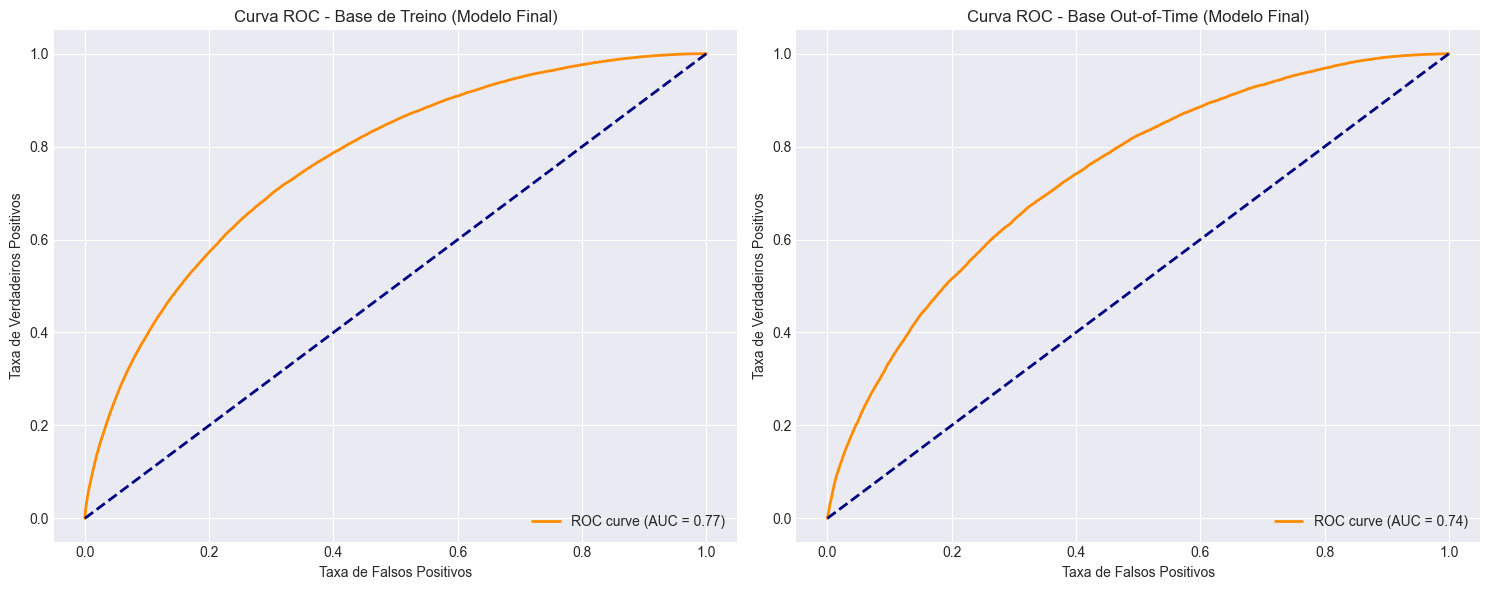

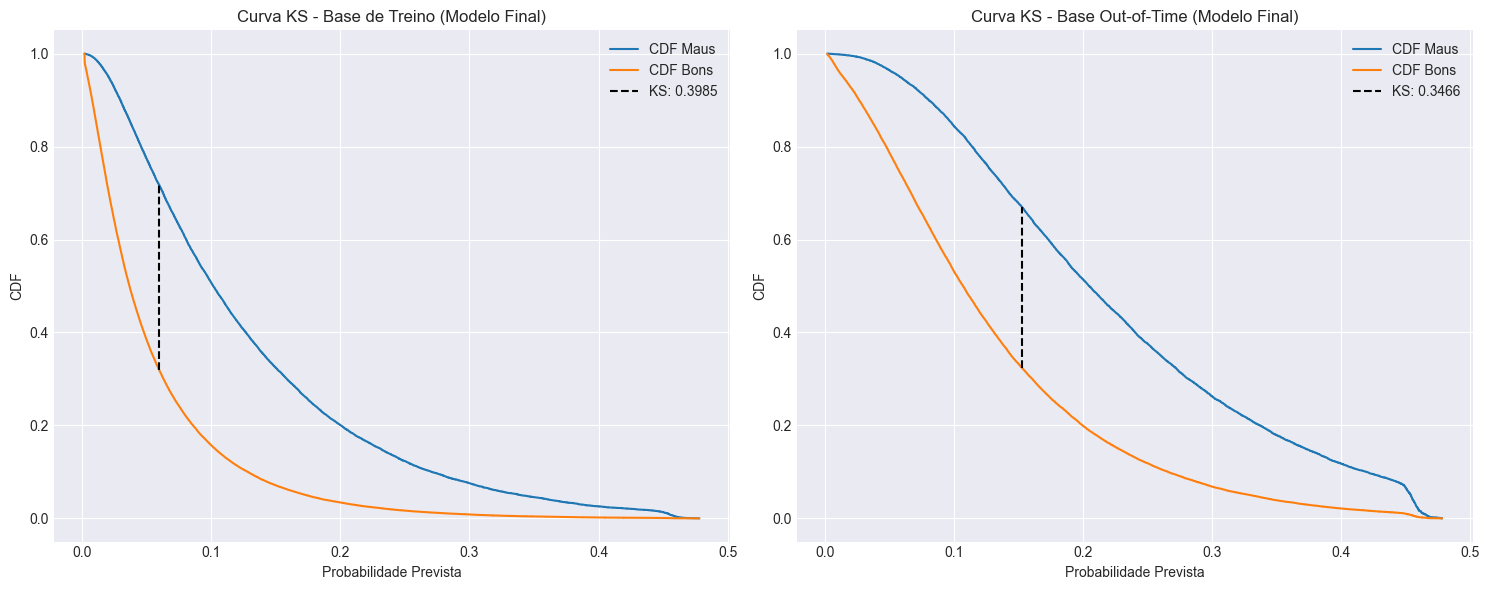


--- Processamento de Dados (OneHotEncoder e PCA) e Avaliação do Modelo Concluídas ---


In [13]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA # Importar PCA
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# --- Re-carregar e preparar os dados (garantir um ponto de partida limpo) ---
df = pd.read_feather('C:/Users/igors/OneDrive/Cursos/EBAC/03 - Profissão Cientista de Dados/03 - Cientista de Dados/Module 38 - Regressão Logística II/Exercício 2/credit_scoring.ftr')
df['data_ref'] = pd.to_datetime(df['data_ref'])

datas_unicas = df['data_ref'].sort_values().unique()
datas_oot = datas_unicas[-3:]
df_oot = df[df['data_ref'].isin(datas_oot)].copy()
df_train = df[~df['data_ref'].isin(datas_oot)].copy()

# --- Agrupamento de Categorias (mantendo as versões agrupadas para dummies) ---
df_train['educacao_agrupada'] = df_train['educacao'].replace({'Fundamental': 'Outros_Educacao', 'Pós graduação': 'Superior_Completo'})
df_oot['educacao_agrupada'] = df_oot['educacao'].replace({'Fundamental': 'Outros_Educacao', 'Pós graduação': 'Superior_Completo'})
df_train['estado_civil_agrupado'] = df_train['estado_civil'].replace({'União': 'Outros_Civil', 'Separado': 'Outros_Civil', 'Viúvo': 'Outros_Civil'})
df_oot['estado_civil_agrupado'] = df_oot['estado_civil'].replace({'União': 'Outros_Civil', 'Separado': 'Outros_Civil', 'Viúvo': 'Outros_Civil'})
df_train['tipo_residencia_agrupada'] = df_train['tipo_residencia'].replace({'Com os pais': 'Outros_Residencia', 'Governamental': 'Outros_Residencia', 'Aluguel': 'Outros_Residencia', 'Estúdio': 'Outros_Residencia', 'Comunitário': 'Outros_Residencia'})
df_oot['tipo_residencia_agrupada'] = df_oot['tipo_residencia'].replace({'Com os pais': 'Outros_Residencia', 'Governamental': 'Outros_Residencia', 'Aluguel': 'Outros_Residencia', 'Estúdio': 'Outros_Residencia', 'Comunitário': 'Outros_Residencia'})

# --- TRATAMENTO DE MISSINGS E LOG-TRANSFORMAÇÃO PARA RENDA ---
mediana_tempo_emprego_train = df_train['tempo_emprego'].median()
df_train['tempo_emprego'] = df_train['tempo_emprego'].fillna(mediana_tempo_emprego_train)
df_oot['tempo_emprego'] = df_oot['tempo_emprego'].fillna(mediana_tempo_emprego_train)

df_train['renda_log'] = df_train['renda'].apply(lambda x: np.log(x + 1))
df_oot['renda_log'] = df_oot['renda'].apply(lambda x: np.log(x + 1))

# --- Aplicação do Capping para 'renda_log' e 'tempo_emprego' ---
def get_iqr_limits(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return lower_bound, upper_bound

def apply_winsorization(series, lower_bound, upper_bound):
    return np.clip(series, lower_bound, upper_bound)

lower_bound_renda_log, upper_bound_renda_log = get_iqr_limits(df_train['renda_log'])
df_train['renda_log_capped'] = apply_winsorization(df_train['renda_log'], lower_bound_renda_log, upper_bound_renda_log)
df_oot['renda_log_capped'] = apply_winsorization(df_oot['renda_log'], lower_bound_renda_log, upper_bound_renda_log)

lower_bound_tempo_emprego, upper_bound_tempo_emprego = get_iqr_limits(df_train['tempo_emprego'])
df_train['tempo_emprego_capped'] = apply_winsorization(df_train['tempo_emprego'], lower_bound_tempo_emprego, upper_bound_tempo_emprego)
df_oot['tempo_emprego_capped'] = apply_winsorization(df_oot['tempo_emprego'], lower_bound_tempo_emprego, upper_bound_tempo_emprego)


# --- Definição de Variáveis para o Pipeline com PCA ---
# Colunas numéricas que serão alimentadas ao PCA
numerical_cols_for_pca = [
    'tempo_emprego_capped', 'renda_log_capped', 'qtd_filhos', 'idade', 'qt_pessoas_residencia'
]
# Colunas categóricas que serão transformadas em dummies
# Usamos as versões agrupadas que você já pré-processou
categorical_cols = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
    'educacao_agrupada',
    'estado_civil_agrupado',
    'tipo_residencia_agrupada'
]

# --- Criação do Pré-processador (ColumnTransformer) com OneHotEncoder e PCA ---
# Pipeline para as colunas numéricas: Padronização e PCA
numeric_transformer_pca = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5))
])

# Pipeline para as colunas categóricas: One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # <-- AQUI está o OneHotEncoder
])

# ColumnTransformer para aplicar as transformações a diferentes tipos de colunas
preprocessor_pca = ColumnTransformer(
    transformers=[
        ('num_pca', numeric_transformer_pca, numerical_cols_for_pca),
        ('cat_ohe', categorical_transformer, categorical_cols) # <-- Aplicando o OneHotEncoder às categóricas
    ],
    remainder='drop' # Descarta colunas que não foram especificadas acima
)

# --- Montando o Pipeline Completo (Pré-processamento com PCA + Modelo) ---

print("--- Aplicando Pré-processamento com OneHotEncoder e PCA ---")
# Ajustar e transformar os dados de treino
X_train_processed_pca = preprocessor_pca.fit_transform(df_train)
# Transformar os dados de validação (Out-of-Time) usando os transformadores ajustados no treino
X_oot_processed_pca = preprocessor_pca.transform(df_oot)

# Obter nomes das colunas após o pré-processamento
# Nomes das componentes PCA
pca_component_names = [f'pca_{i}' for i in range(preprocessor_pca.named_transformers_['num_pca'].named_steps['pca'].n_components_)]
# Nomes das colunas dummy criadas pelo OneHotEncoder
ohe_feature_names = list(preprocessor_pca.named_transformers_['cat_ohe'].named_steps['onehot'].get_feature_names_out(categorical_cols))

# Concatenar os nomes dos componentes PCA com os nomes das dummies
final_feature_names_pca = pca_component_names + ohe_feature_names

# Criar DataFrames processados com os nomes das colunas
X_train_final_pca = pd.DataFrame(X_train_processed_pca, columns=final_feature_names_pca, index=df_train.index)
X_oot_final_pca = pd.DataFrame(X_oot_processed_pca, columns=final_feature_names_pca, index=df_oot.index)

y_train = df_train['mau']
y_oot = df_oot['mau']

print(f"Dimensões de X_train_final_pca após OneHotEncoder e PCA: {X_train_final_pca.shape}")
print(f"Dimensões de X_oot_final_pca após OneHotEncoder e PCA: {X_oot_final_pca.shape}")

# --- INSPEÇÃO DAS COLUNAS DUMMY CRIADAS ---
print("\n--- Inspecionando as colunas dummy criadas ---")
# Mostra todas as colunas do DataFrame resultante
print("Todas as colunas no X_train_final_pca:")
print(X_train_final_pca.columns.tolist())

print("\nExemplo das primeiras 5 linhas de X_train_final_pca (com dummies e PCA):")
print(X_train_final_pca.head())

# Para ver as colunas que são claramente dummies (excluindo as PCA)
dummy_example_cols = [col for col in final_feature_names_pca if not col.startswith('pca_')]
print(f"\nNúmero de colunas dummy criadas: {len(dummy_example_cols)}")
print("Algumas das colunas dummy (primeiras 10):")
print(dummy_example_cols[:10])
print("\n--- Inspecionando as colunas dummy criadas (FIM) ---")


# --- Análise da Variância Explicada pelo PCA ---
pca_model = preprocessor_pca.named_transformers_['num_pca'].named_steps['pca']
explained_variance_ratio = pca_model.explained_variance_ratio_
print("\n--- Variância Explicada por Componente Principal (PCA) ---")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
print(f"Variância Cumulativa Explicada: {explained_variance_ratio.sum():.4f} ({explained_variance_ratio.sum()*100:.2f}%)")


# --- Desenvolvimento do Modelo de Regressão Logística (com dados do PCA e Dummies) ---
print("\n--- Desenvolvendo o Modelo de Regressão Logística (Após OneHotEncoder e PCA) ---")

X_train_sm_final = sm.add_constant(X_train_final_pca)
X_oot_sm_final = sm.add_constant(X_oot_final_pca)

modelo_final = sm.GLM(y_train, X_train_sm_final, family=sm.families.Binomial())
resultado_final = modelo_final.fit()

print("\n--- Resumo do Modelo de Regressão Logística (Após OneHotEncoder e PCA) ---")
print(resultado_final.summary())


# --- Avaliação do Modelo Final ---
print("\n--- Avaliação do Poder Discriminante do Modelo (Após OneHotEncoder e PCA) ---")

y_pred_proba_train_final = resultado_final.predict(X_train_sm_final)
y_pred_proba_oot_final = resultado_final.predict(X_oot_sm_final)

# Acurácia
y_pred_class_train_final = (y_pred_proba_train_final > 0.5).astype(int)
y_pred_class_oot_final = (y_pred_proba_oot_final > 0.5).astype(int)
acuracia_train_final = accuracy_score(y_train, y_pred_class_train_final)
acuracia_oot_final = accuracy_score(y_oot, y_pred_class_oot_final)
print("--- Acurácia ---")
print(f"Acurácia (Base de Treino): {acuracia_train_final:.4f}")
print(f"Acurácia (Base Out-of-Time): {acuracia_oot_final:.4f}\n")

# Gini
fpr_train_final, tpr_train_final, _ = roc_curve(y_train, y_pred_proba_train_final)
roc_auc_train_final = auc(fpr_train_final, tpr_train_final)
gini_train_final = 2 * roc_auc_train_final - 1
fpr_oot_final, tpr_oot_final, _ = roc_curve(y_oot, y_pred_proba_oot_final)
roc_auc_oot_final = auc(fpr_oot_final, tpr_oot_final)
gini_oot_final = 2 * roc_auc_oot_final - 1
print("--- Coeficiente de Gini ---")
print(f"Gini (Base de Treino): {gini_train_final:.4f}")
print(f"Gini (Base Out-of-Time): {gini_oot_final:.4f}\n")

# KS (função corrigida para robustez)
def calculate_ks(y_true, y_proba):
    df_results = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
    df_results.sort_values(by='y_proba', ascending=False, inplace=True)
    df_results.reset_index(drop=True, inplace=True)

    df_results['cum_bad'] = df_results['y_true'].cumsum()
    df_results['cum_good'] = (1 - df_results['y_true']).cumsum()

    total_bad = df_results['y_true'].sum()
    total_good = (1 - df_results['y_true']).sum()

    # Garantir que CDFs sejam séries do mesmo tamanho, mesmo se total_good/bad for 0
    cdf_bad = df_results['cum_bad'] / total_bad if total_bad > 0 else pd.Series(0.0, index=df_results.index)
    cdf_good = df_results['cum_good'] / total_good if total_good > 0 else pd.Series(0.0, index=df_results.index)

    ks_value = np.max(np.abs(cdf_bad - cdf_good))
    return ks_value, cdf_bad, cdf_good, df_results['y_proba']

ks_train_final, cdf_bad_train_final, cdf_good_train_final, proba_sorted_train_final = calculate_ks(y_train, y_pred_proba_train_final)
ks_oot_final, cdf_bad_oot_final, cdf_good_oot_final, proba_sorted_oot_final = calculate_ks(y_oot, y_pred_proba_oot_final)
print("--- Kolmogorov-Smirnov (KS) ---")
print(f"KS (Base de Treino): {ks_train_final:.4f}")
print(f"KS (Base Out-of-Time): {ks_oot_final:.4f}\n")

# Plotagens Finais
plt.figure(figsize=(15, 6))
# ROC Treino
plt.subplot(1, 2, 1)
plt.plot(fpr_train_final, tpr_train_final, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_train_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base de Treino (Modelo Final)'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
# ROC OOT
plt.subplot(1, 2, 2)
plt.plot(fpr_oot_final, tpr_oot_final, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_oot_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base Out-of-Time (Modelo Final)'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
plt.tight_layout(); plt.show()

plt.figure(figsize=(15, 6))
# KS Treino
plt.subplot(1, 2, 1)
plt.plot(proba_sorted_train_final, cdf_bad_train_final, label='CDF Maus')
plt.plot(proba_sorted_train_final, cdf_good_train_final, label='CDF Bons')
max_ks_idx_train_final = np.argmax(np.abs(cdf_bad_train_final - cdf_good_train_final))
plt.plot([proba_sorted_train_final.iloc[max_ks_idx_train_final], proba_sorted_train_final.iloc[max_ks_idx_train_final]],
         [cdf_good_train_final.iloc[max_ks_idx_train_final], cdf_bad_train_final.iloc[max_ks_idx_train_final]], 'k--', label=f'KS: {ks_train_final:.4f}')
plt.title('Curva KS - Base de Treino (Modelo Final)'); plt.xlabel('Probabilidade Prevista'); plt.ylabel('CDF'); plt.legend()
# KS OOT
plt.subplot(1, 2, 2)
plt.plot(proba_sorted_oot_final, cdf_bad_oot_final, label='CDF Maus')
plt.plot(proba_sorted_oot_final, cdf_good_oot_final, label='CDF Bons')
max_ks_idx_oot_final = np.argmax(np.abs(cdf_bad_oot_final - cdf_good_oot_final))
plt.plot([proba_sorted_oot_final.iloc[max_ks_idx_oot_final], proba_sorted_oot_final.iloc[max_ks_idx_oot_final]],
         [cdf_good_oot_final.iloc[max_ks_idx_oot_final], cdf_bad_oot_final.iloc[max_ks_idx_oot_final]], 'k--', label=f'KS: {ks_oot_final:.4f}')
plt.title('Curva KS - Base Out-of-Time (Modelo Final)'); plt.xlabel('Probabilidade Prevista'); plt.ylabel('CDF'); plt.legend()
plt.tight_layout(); plt.show()

print("\n--- Processamento de Dados (OneHotEncoder e PCA) e Avaliação do Modelo Concluídas ---")

### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

--- Criando e Aplicando o Pipeline de Pré-processamento ---
Dimensões de X_train_final após o Pipeline: (600000, 26)
Dimensões de X_oot_final após o Pipeline: (150000, 26)
Primeiras 5 colunas de X_train_final: ['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4']...

--- Exemplo das primeiras 5 linhas do X_train_final (com PCA e Dummies) ---
      pca_0     pca_1     pca_2     pca_3     pca_4  sexo_F  sexo_M  \
0 -0.928796 -1.254260 -0.356549  0.885182  0.524375     1.0     0.0   
1  0.103915 -1.259109 -0.680456  0.422449 -0.274844     1.0     0.0   
2  3.548512 -1.218976  0.508501  0.080811  0.081239     1.0     0.0   
3 -1.156337  0.874587  0.466494  0.677032 -0.218838     1.0     0.0   
4 -0.555823 -1.023192 -1.363607  1.129879  0.499634     1.0     0.0   

   posse_de_veiculo_N  posse_de_veiculo_S  posse_de_imovel_N  ...  \
0                 1.0                 0.0                1.0  ...   
1                 0.0                 1.0                0.0  ...   
2                 1.0         

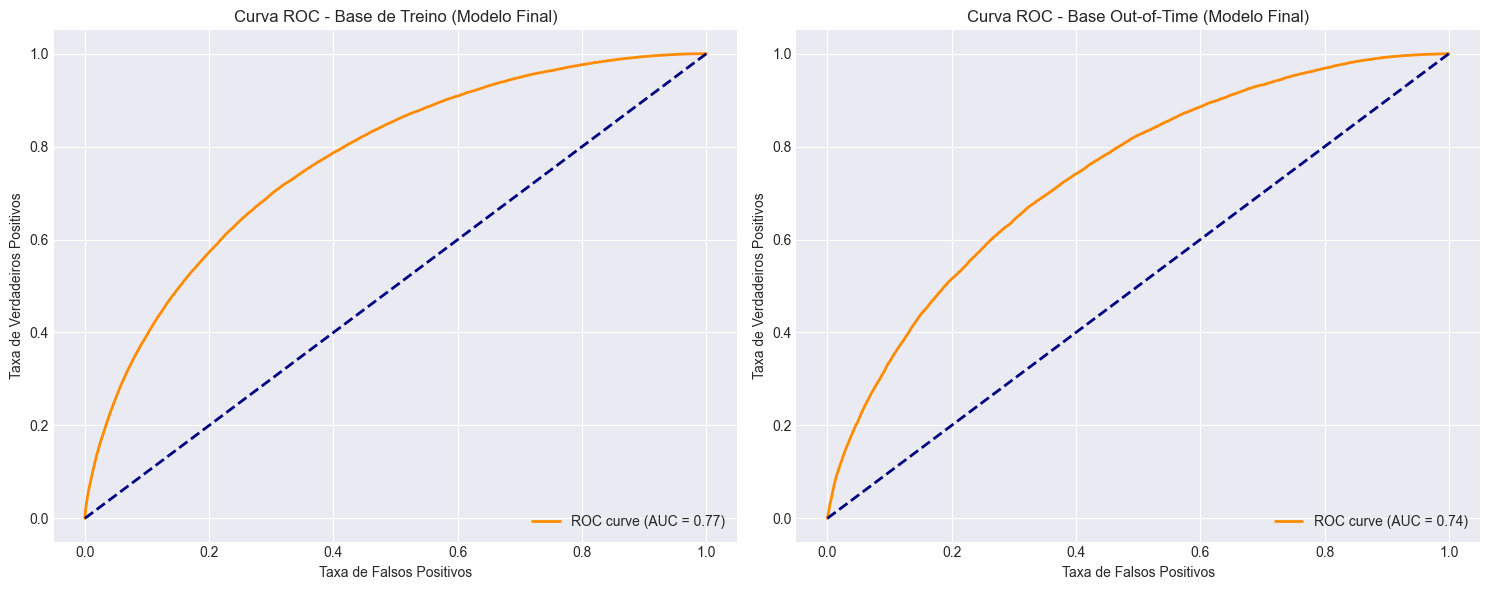

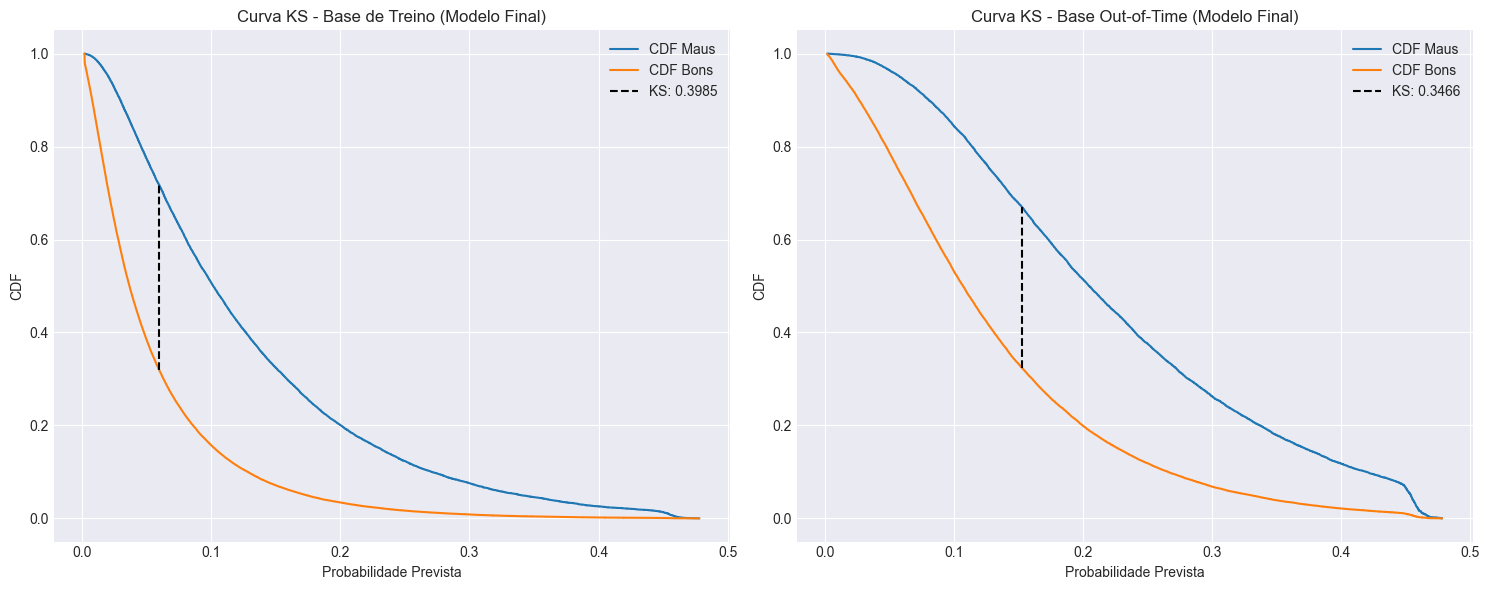


--- Pipeline de Pré-processamento e Avaliação do Modelo Concluídos ---


In [14]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# --- Carregamento e Divisão dos Dados (mantido como antes para consistência) ---
df = pd.read_feather('C:/Users/igors/OneDrive/Cursos/EBAC/03 - Profissão Cientista de Dados/03 - Cientista de Dados/Module 38 - Regressão Logística II/Exercício 2/credit_scoring.ftr')
df['data_ref'] = pd.to_datetime(df['data_ref'])

datas_unicas = df['data_ref'].sort_values().unique()
datas_oot = datas_unicas[-3:]
df_oot = df[df['data_ref'].isin(datas_oot)].copy()
df_train = df[~df['data_ref'].isin(datas_oot)].copy()

# --- Funções para Pré-processamento (mantidas para serem chamadas no Pipeline) ---

# 1. Agrupamento de Categorias (a ser aplicado antes do pipeline principal)
def apply_category_grouping(df):
    df['educacao_agrupada'] = df['educacao'].replace({'Fundamental': 'Outros_Educacao', 'Pós graduação': 'Superior_Completo'})
    df['estado_civil_agrupado'] = df['estado_civil'].replace({'União': 'Outros_Civil', 'Separado': 'Outros_Civil', 'Viúvo': 'Outros_Civil'})
    df['tipo_residencia_agrupada'] = df['tipo_residencia'].replace({'Com os pais': 'Outros_Residencia', 'Governamental': 'Outros_Residencia', 'Aluguel': 'Outros_Residencia', 'Estúdio': 'Outros_Residencia', 'Comunitário': 'Outros_Residencia'})
    return df

# 2. Log-transformação para Renda
def log_transform_renda(X):
    # X precisa ser um DataFrame para que possamos acessar 'renda' por nome
    # Adicionar 1 para evitar log(0) se houver valores zero
    X_copy = X.copy()
    if 'renda' in X_copy.columns:
        X_copy['renda_log'] = np.log(X_copy['renda'] + 1)
    else: # Se 'renda' já for 'renda_log' ou não existir no subset
        X_copy['renda_log'] = np.log(X_copy.iloc[:, 0] + 1) # Assumir que é a primeira coluna se for um array numpy
    return X_copy

# 3. Capping para Outliers
def get_iqr_limits(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return lower_bound, upper_bound

def apply_winsorization(X, col_name, lower_bound, upper_bound):
    # X pode ser um DataFrame ou array numpy (dependendo do ColumnTransformer)
    X_copy = X.copy()
    if isinstance(X_copy, pd.DataFrame):
        X_copy[col_name] = np.clip(X_copy[col_name], lower_bound, upper_bound)
    else: # Assumir que X é um array numpy e col_name é um índice de coluna
        # Esta parte é mais complexa e talvez precise de ajuste dependendo de como
        # o ColumnTransformer passa os dados para o FunctionTransformer
        # Para simplicidade, vamos focar no DataFrame aqui.
        pass # Por enquanto, deixamos para o pipeline lidar com dados tratados como Series ou arrays 1D.
    return X_copy


# --- Aplicar Agrupamento de Categorias antes de definir as colunas do pipeline ---
df_train = apply_category_grouping(df_train)
df_oot = apply_category_grouping(df_oot)

# --- TRATAMENTO DE MISSINGS EM 'tempo_emprego' (fora do pipeline para manter simplicidade) ---
# A mediana deve ser calculada APENAS no treino
mediana_tempo_emprego_train = df_train['tempo_emprego'].median()
df_train['tempo_emprego'] = df_train['tempo_emprego'].fillna(mediana_tempo_emprego_train)
df_oot['tempo_emprego'] = df_oot['tempo_emprego'].fillna(mediana_tempo_emprego_train)

# --- Aplicar Log-transformação (fora do pipeline para manter simplicidade) ---
# df_train['renda_log'] = df_train['renda'].apply(lambda x: np.log(x + 1))
# df_oot['renda_log'] = df_oot['renda'].apply(lambda x: np.log(x + 1))
# Para integrar no pipeline, 'renda' precisaria ser passada.
# Por enquanto, faremos o log-transform fora, já que o capping depende disso.
df_train['renda_log'] = np.log(df_train['renda'] + 1)
df_oot['renda_log'] = np.log(df_oot['renda'] + 1)


# --- Cálculo dos limites de Capping APENAS nos dados de TREINO ---
lower_bound_renda_log, upper_bound_renda_log = get_iqr_limits(df_train['renda_log'])
lower_bound_tempo_emprego, upper_bound_tempo_emprego = get_iqr_limits(df_train['tempo_emprego'])

# --- Funções de capping como FunctionTransformer para o Pipeline ---
# Precisamos de 'wrappers' que usem os limites calculados do treino
def capping_renda_log(X):
    return np.clip(X, lower_bound_renda_log, upper_bound_renda_log)

def capping_tempo_emprego(X):
    return np.clip(X, lower_bound_tempo_emprego, upper_bound_tempo_emprego)


# --- DEFINIÇÃO DO PIPELINE DE PRÉ-PROCESSAMENTO ---
def create_preprocessing_pipeline():

    # Colunas numéricas que serão processadas pelo pipeline numérico
    # 'renda_log' e 'tempo_emprego' já tiveram log/fillna e capping definido como funções.
    # Elas precisarão ser passadas para o pipeline já transformadas.
    numerical_cols_preprocessed = [
        'tempo_emprego', # Tempo de emprego já preenchido e será cappado
        'renda_log',     # Renda já log-transformada e será cappada
        'qtd_filhos',
        'idade',
        'qt_pessoas_residencia'
    ]

    # Colunas categóricas para One-Hot Encoding
    categorical_cols = [
        'sexo',
        'posse_de_veiculo', # Explicitamente mencionada para dummy
        'posse_de_imovel',
        'tipo_renda',
        'educacao_agrupada',
        'estado_civil_agrupado',
        'tipo_residencia_agrupada'
    ]

    # Pipeline para variáveis numéricas: Capping, Padronização, PCA
    # Note que 'qtd_filhos', 'idade', 'qt_pessoas_residencia' vão direto para o scaler
    # As funções de capping serão aplicadas ANTES da padronização e PCA.
    # O FunctionTransformer opera em cada coluna passada para ele.
    
    # Criaremos pipelines separadas para as colunas com capping
    # e depois juntamos tudo com o ColumnTransformer.
    
    # Pipeline para 'renda_log' (aplica capping, depois StandardScalar e PCA)
    renda_log_pipeline = Pipeline(steps=[
        ('capping_renda', FunctionTransformer(capping_renda_log, validate=False, feature_names_out='passthrough')),
        ('scaler_pca', StandardScaler()) # scaler para as 5 do PCA
    ])

    # Pipeline para 'tempo_emprego' (aplica capping, depois StandardScalar e PCA)
    tempo_emprego_pipeline = Pipeline(steps=[
        ('capping_tempo_emprego', FunctionTransformer(capping_tempo_emprego, validate=False, feature_names_out='passthrough')),
        ('scaler_pca', StandardScaler()) # scaler para as 5 do PCA
    ])

    # Pipeline para outras numéricas (apenas StandardScalar e PCA)
    other_numerical_pipeline = Pipeline(steps=[
        ('scaler_pca', StandardScaler())
    ])

    # O PCA será aplicado a TODAS as colunas numéricas após o scaling.
    # Para isso, o ColumnTransformer precisa passar todas elas para um único transformador que contenha o PCA.
    # A maneira mais limpa é ter um pipeline para TODAS as numéricas após o tratamento individual (capping/log).

    # Primeiro, preparamos as colunas numéricas antes de juntá-las no PCA
    # Definimos todas as colunas que serão passadas para o PCA
    numerical_cols_for_final_pca = [
        'tempo_emprego', 'renda_log', 'qtd_filhos', 'idade', 'qt_pessoas_residencia'
    ]
    
    # A etapa de capping será feita ANTES do ColumnTransformer ou o FunctionTransformer precisa de um wrapper mais complexo.
    # Por simplicidade e clareza, vamos manter o capping feito DIRETAMENTE nos DataFrames antes do pipeline,
    # assim como o log-transform e imputação de missings em tempo_emprego.
    # Isso significa que as colunas numéricas que entram no pipeline já estão tratadas para nulos/outliers.

    numerical_pipeline_final = Pipeline(steps=[
        ('scaler', StandardScaler()), # Padroniza todas as numéricas
        ('pca', PCA(n_components=5)) # Reduz para 5 componentes
    ])

    # Pipeline para as variáveis categóricas (One-Hot Encoding)
    categorical_pipeline = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # ColumnTransformer para combinar as transformações
    preprocessor = ColumnTransformer(
        transformers=[
            ('num_transform', numerical_pipeline_final, numerical_cols_for_final_pca),
            ('cat_transform', categorical_pipeline, categorical_cols)
        ],
        remainder='drop' # Descarta outras colunas não especificadas
    )

    return preprocessor, numerical_cols_for_final_pca, categorical_cols

# --- APLICAR AS TRANSFORMAÇÕES FORA DO PIPELINE (para simplificar a lógica do pipeline) ---
# Imputação de nulos (já feita para 'tempo_emprego')
# Log-transformação para renda (já feita para 'renda_log')
# Capping para outliers (aplicar agora nos dataframes)
df_train['renda_log'] = np.clip(df_train['renda_log'], lower_bound_renda_log, upper_bound_renda_log)
df_oot['renda_log'] = np.clip(df_oot['renda_log'], lower_bound_renda_log, upper_bound_renda_log)
df_train['tempo_emprego'] = np.clip(df_train['tempo_emprego'], lower_bound_tempo_emprego, upper_bound_tempo_emprego)
df_oot['tempo_emprego'] = np.clip(df_oot['tempo_emprego'], lower_bound_tempo_emprego, upper_bound_tempo_emprego)


# --- Montando e Executando o Pipeline Completo ---
print("--- Criando e Aplicando o Pipeline de Pré-processamento ---")

# Instanciar o pipeline
preprocessor_pipeline, numerical_input_cols, categorical_input_cols = create_preprocessing_pipeline()

# Ajustar e transformar os dados de treino
X_train_processed = preprocessor_pipeline.fit_transform(df_train[numerical_input_cols + categorical_input_cols])
# Transformar os dados de OOT
X_oot_processed = preprocessor_pipeline.transform(df_oot[numerical_input_cols + categorical_input_cols])

# Obter nomes das colunas após o pré-processamento
pca_component_names = [f'pca_{i}' for i in range(preprocessor_pipeline.named_transformers_['num_transform'].named_steps['pca'].n_components_)]
ohe_feature_names = list(preprocessor_pipeline.named_transformers_['cat_transform'].named_steps['onehot'].get_feature_names_out(categorical_input_cols))
final_feature_names = pca_component_names + ohe_feature_names

# Criar DataFrames processados com nomes de colunas
X_train_final = pd.DataFrame(X_train_processed, columns=final_feature_names, index=df_train.index)
X_oot_final = pd.DataFrame(X_oot_processed, columns=final_feature_names, index=df_oot.index)

y_train = df_train['mau']
y_oot = df_oot['mau']

print(f"Dimensões de X_train_final após o Pipeline: {X_train_final.shape}")
print(f"Dimensões de X_oot_final após o Pipeline: {X_oot_final.shape}")
print(f"Primeiras 5 colunas de X_train_final: {X_train_final.columns.tolist()[:5]}...")
print("\n--- Exemplo das primeiras 5 linhas do X_train_final (com PCA e Dummies) ---")
print(X_train_final.head())


# --- Análise da Variância Explicada pelo PCA (como parte do pipeline) ---
pca_model_in_pipeline = preprocessor_pipeline.named_transformers_['num_transform'].named_steps['pca']
explained_variance_ratio_pipeline = pca_model_in_pipeline.explained_variance_ratio_
print("\n--- Variância Explicada por Componente Principal (PCA no Pipeline) ---")
for i, ratio in enumerate(explained_variance_ratio_pipeline):
    print(f"Componente {i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
print(f"Variância Cumulativa Explicada: {explained_variance_ratio_pipeline.sum():.4f} ({explained_variance_ratio_pipeline.sum()*100:.2f}%)")


# --- Desenvolvimento do Modelo de Regressão Logística (com dados do Pipeline) ---
print("\n--- Desenvolvendo o Modelo de Regressão Logística (Dados do Pipeline) ---")

X_train_sm_final = sm.add_constant(X_train_final)
X_oot_sm_final = sm.add_constant(X_oot_final)

modelo_final = sm.GLM(y_train, X_train_sm_final, family=sm.families.Binomial())
resultado_final = modelo_final.fit()

print("\n--- Resumo do Modelo de Regressão Logística (Dados do Pipeline) ---")
print(resultado_final.summary())


# --- Avaliação do Modelo Final (Dados do Pipeline) ---
print("\n--- Avaliação do Poder Discriminante do Modelo (Dados do Pipeline) ---")

y_pred_proba_train_final = resultado_final.predict(X_train_sm_final)
y_pred_proba_oot_final = resultado_final.predict(X_oot_sm_final)

# Acurácia
y_pred_class_train_final = (y_pred_proba_train_final > 0.5).astype(int)
y_pred_class_oot_final = (y_pred_proba_oot_final > 0.5).astype(int)
acuracia_train_final = accuracy_score(y_train, y_pred_class_train_final)
acuracia_oot_final = accuracy_score(y_oot, y_pred_class_oot_final)
print("--- Acurácia ---")
print(f"Acurácia (Base de Treino): {acuracia_train_final:.4f}")
print(f"Acurácia (Base Out-of-Time): {acuracia_oot_final:.4f}\n")

# Gini
fpr_train_final, tpr_train_final, _ = roc_curve(y_train, y_pred_proba_train_final)
roc_auc_train_final = auc(fpr_train_final, tpr_train_final)
gini_train_final = 2 * roc_auc_train_final - 1
fpr_oot_final, tpr_oot_final, _ = roc_curve(y_oot, y_pred_proba_oot_final)
roc_auc_oot_final = auc(fpr_oot_final, tpr_oot_final)
gini_oot_final = 2 * roc_auc_oot_final - 1
print("--- Coeficiente de Gini ---")
print(f"Gini (Base de Treino): {gini_train_final:.4f}")
print(f"Gini (Base Out-of-Time): {gini_oot_final:.4f}\n")

# KS (função corrigida para robustez)
def calculate_ks(y_true, y_proba):
    df_results = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
    df_results.sort_values(by='y_proba', ascending=False, inplace=True)
    df_results.reset_index(drop=True, inplace=True)

    df_results['cum_bad'] = df_results['y_true'].cumsum()
    df_results['cum_good'] = (1 - df_results['y_true']).cumsum()

    total_bad = df_results['y_true'].sum()
    total_good = (1 - df_results['y_true']).sum()

    # Garantir que CDFs sejam séries do mesmo tamanho, mesmo se total_good/bad for 0
    cdf_bad = df_results['cum_bad'] / total_bad if total_bad > 0 else pd.Series(0.0, index=df_results.index)
    cdf_good = df_results['cum_good'] / total_good if total_good > 0 else pd.Series(0.0, index=df_results.index)

    ks_value = np.max(np.abs(cdf_bad - cdf_good))
    return ks_value, cdf_bad, cdf_good, df_results['y_proba']

ks_train_final, cdf_bad_train_final, cdf_good_train_final, proba_sorted_train_final = calculate_ks(y_train, y_pred_proba_train_final)
ks_oot_final, cdf_bad_oot_final, cdf_good_oot_final, proba_sorted_oot_final = calculate_ks(y_oot, y_pred_proba_oot_final)
print("--- Kolmogorov-Smirnov (KS) ---")
print(f"KS (Base de Treino): {ks_train_final:.4f}")
print(f"KS (Base Out-of-Time): {ks_oot_final:.4f}\n")

# Plotagens Finais
plt.figure(figsize=(15, 6))
# ROC Treino
plt.subplot(1, 2, 1)
plt.plot(fpr_train_final, tpr_train_final, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_train_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base de Treino (Modelo Final)'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
# ROC OOT
plt.subplot(1, 2, 2)
plt.plot(fpr_oot_final, tpr_oot_final, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_oot_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base Out-of-Time (Modelo Final)'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
plt.tight_layout(); plt.show()

plt.figure(figsize=(15, 6))
# KS Treino
plt.subplot(1, 2, 1)
plt.plot(proba_sorted_train_final, cdf_bad_train_final, label='CDF Maus')
plt.plot(proba_sorted_train_final, cdf_good_train_final, label='CDF Bons')
max_ks_idx_train_final = np.argmax(np.abs(cdf_bad_train_final - cdf_good_train_final))
plt.plot([proba_sorted_train_final.iloc[max_ks_idx_train_final], proba_sorted_train_final.iloc[max_ks_idx_train_final]],
         [cdf_good_train_final.iloc[max_ks_idx_train_final], cdf_bad_train_final.iloc[max_ks_idx_train_final]], 'k--', label=f'KS: {ks_train_final:.4f}')
plt.title('Curva KS - Base de Treino (Modelo Final)'); plt.xlabel('Probabilidade Prevista'); plt.ylabel('CDF'); plt.legend()
# KS OOT
plt.subplot(1, 2, 2)
plt.plot(proba_sorted_oot_final, cdf_bad_oot_final, label='CDF Maus')
plt.plot(proba_sorted_oot_final, cdf_good_oot_final, label='CDF Bons')
max_ks_idx_oot_final = np.argmax(np.abs(cdf_bad_oot_final - cdf_good_oot_final))
plt.plot([proba_sorted_oot_final.iloc[max_ks_idx_oot_final], proba_sorted_oot_final.iloc[max_ks_idx_oot_final]],
         [cdf_good_oot_final.iloc[max_ks_idx_oot_final], cdf_bad_oot_final.iloc[max_ks_idx_oot_final]], 'k--', label=f'KS: {ks_oot_final:.4f}')
plt.title('Curva KS - Base Out-of-Time (Modelo Final)'); plt.xlabel('Probabilidade Prevista'); plt.ylabel('CDF'); plt.legend()
plt.tight_layout(); plt.show()

print("\n--- Pipeline de Pré-processamento e Avaliação do Modelo Concluídos ---")

### Treinar um modelo de regressão logistica com o resultado

--- Criando e Aplicando o Pipeline de Pré-processamento ---
Dimensões de X_train_final após o Pipeline: (600000, 26)
Dimensões de X_oot_final após o Pipeline: (150000, 26)
Primeiras 5 colunas de X_train_final: ['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4']...

--- Exemplo das primeiras 5 linhas do X_train_final (com PCA e Dummies) ---
      pca_0     pca_1     pca_2     pca_3     pca_4  sexo_F  sexo_M  \
0 -0.928796 -1.254260 -0.356549  0.885182  0.524375     1.0     0.0   
1  0.103915 -1.259109 -0.680456  0.422449 -0.274844     1.0     0.0   
2  3.548512 -1.218976  0.508501  0.080811  0.081239     1.0     0.0   
3 -1.156337  0.874587  0.466494  0.677032 -0.218838     1.0     0.0   
4 -0.555823 -1.023192 -1.363607  1.129879  0.499634     1.0     0.0   

   posse_de_veiculo_N  posse_de_veiculo_S  posse_de_imovel_N  ...  \
0                 1.0                 0.0                1.0  ...   
1                 0.0                 1.0                0.0  ...   
2                 1.0         

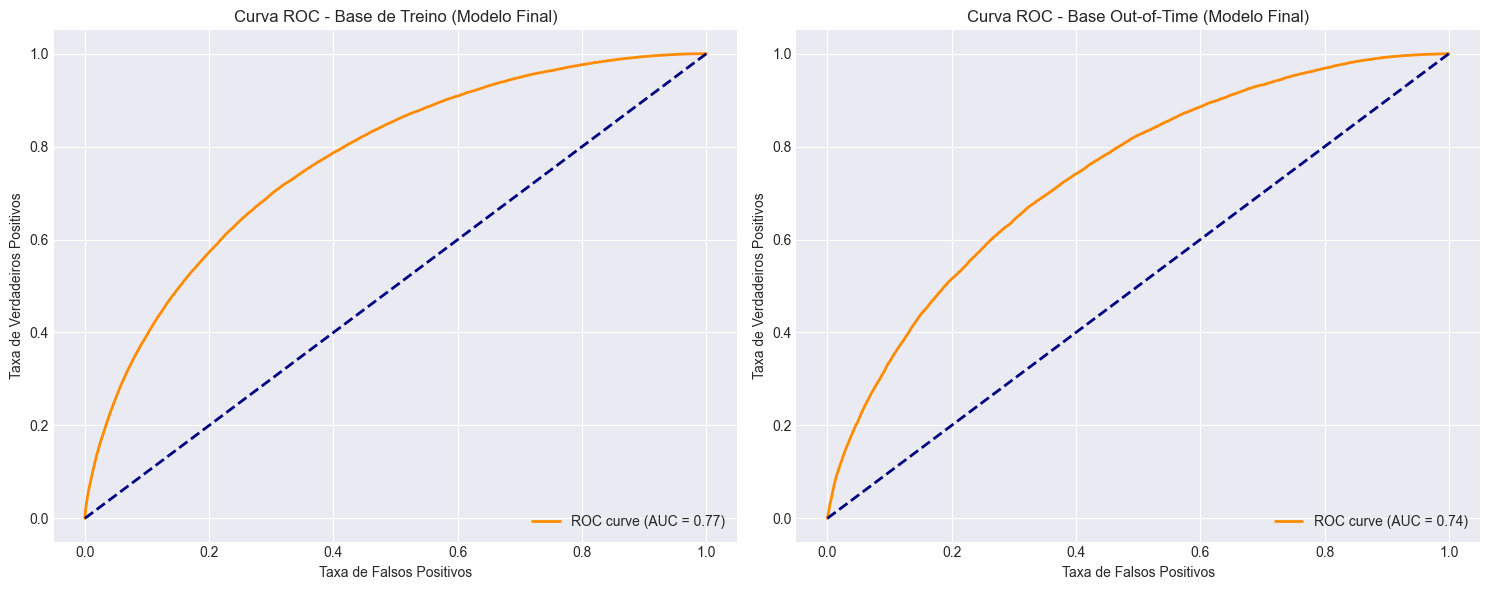

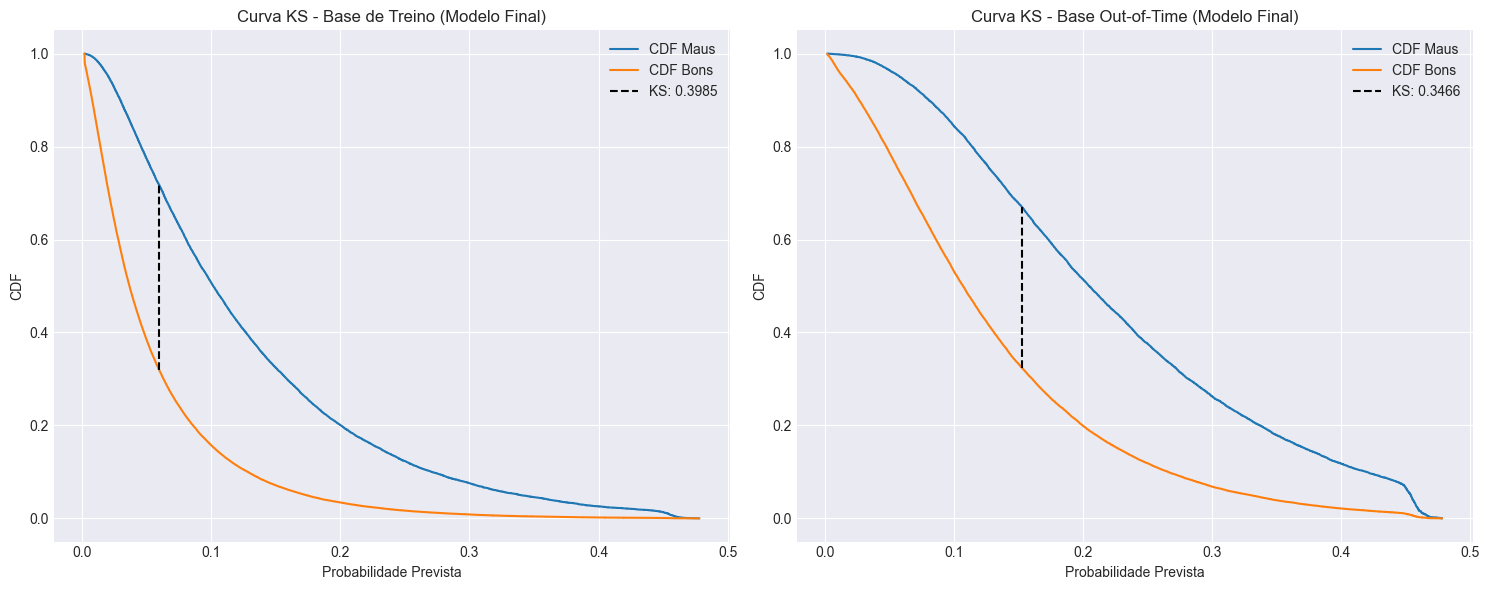


--- Pipeline de Pré-processamento e Avaliação do Modelo Concluídos ---

--- 9. Salvando o Modelo de Regressão Logística Treinado ---

--- 9. Salvando o Modelo de Regressão Logística Treinado ---
Modelo salvo com sucesso em 'model_final.pkl'

--- Testando o Carregamento do Modelo ---
Modelo carregado com sucesso!

--- Operação de Salvar e Testar Concluída ---


In [18]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# --- Carregamento e Divisão dos Dados (mantido como antes para consistência) ---
df = pd.read_feather('C:/Users/igors/OneDrive/Cursos/EBAC/03 - Profissão Cientista de Dados/03 - Cientista de Dados/Module 38 - Regressão Logística II/Exercício 2/credit_scoring.ftr')
df['data_ref'] = pd.to_datetime(df['data_ref'])

datas_unicas = df['data_ref'].sort_values().unique()
datas_oot = datas_unicas[-3:]
df_oot = df[df['data_ref'].isin(datas_oot)].copy()
df_train = df[~df['data_ref'].isin(datas_oot)].copy()

# --- Funções para Pré-processamento (mantidas para serem chamadas no Pipeline) ---

# 1. Agrupamento de Categorias (a ser aplicado antes do pipeline principal)
def apply_category_grouping(df):
    df['educacao_agrupada'] = df['educacao'].replace({'Fundamental': 'Outros_Educacao', 'Pós graduação': 'Superior_Completo'})
    df['estado_civil_agrupado'] = df['estado_civil'].replace({'União': 'Outros_Civil', 'Separado': 'Outros_Civil', 'Viúvo': 'Outros_Civil'})
    df['tipo_residencia_agrupada'] = df['tipo_residencia'].replace({'Com os pais': 'Outros_Residencia', 'Governamental': 'Outros_Residencia', 'Aluguel': 'Outros_Residencia', 'Estúdio': 'Outros_Residencia', 'Comunitário': 'Outros_Residencia'})
    return df

# 2. Log-transformação para Renda
def log_transform_renda(X):
    # X precisa ser um DataFrame para que possamos acessar 'renda' por nome
    # Adicionar 1 para evitar log(0) se houver valores zero
    X_copy = X.copy()
    if 'renda' in X_copy.columns:
        X_copy['renda_log'] = np.log(X_copy['renda'] + 1)
    else: # Se 'renda' já for 'renda_log' ou não existir no subset
        X_copy['renda_log'] = np.log(X_copy.iloc[:, 0] + 1) # Assumir que é a primeira coluna se for um array numpy
    return X_copy

# 3. Capping para Outliers
def get_iqr_limits(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return lower_bound, upper_bound

def apply_winsorization(X, col_name, lower_bound, upper_bound):
    # X pode ser um DataFrame ou array numpy (dependendo do ColumnTransformer)
    X_copy = X.copy()
    if isinstance(X_copy, pd.DataFrame):
        X_copy[col_name] = np.clip(X_copy[col_name], lower_bound, upper_bound)
    else: # Assumir que X é um array numpy e col_name é um índice de coluna
        # Esta parte é mais complexa e talvez precise de ajuste dependendo de como
        # o ColumnTransformer passa os dados para o FunctionTransformer
        # Para simplicidade, vamos focar no DataFrame aqui.
        pass # Por enquanto, deixamos para o pipeline lidar com dados tratados como Series ou arrays 1D.
    return X_copy


# --- Aplicar Agrupamento de Categorias antes de definir as colunas do pipeline ---
df_train = apply_category_grouping(df_train)
df_oot = apply_category_grouping(df_oot)

# --- TRATAMENTO DE MISSINGS EM 'tempo_emprego' (fora do pipeline para manter simplicidade) ---
# A mediana deve ser calculada APENAS no treino
mediana_tempo_emprego_train = df_train['tempo_emprego'].median()
df_train['tempo_emprego'] = df_train['tempo_emprego'].fillna(mediana_tempo_emprego_train)
df_oot['tempo_emprego'] = df_oot['tempo_emprego'].fillna(mediana_tempo_emprego_train)

# --- Aplicar Log-transformação (fora do pipeline para manter simplicidade) ---
# df_train['renda_log'] = df_train['renda'].apply(lambda x: np.log(x + 1))
# df_oot['renda_log'] = df_oot['renda'].apply(lambda x: np.log(x + 1))
# Para integrar no pipeline, 'renda' precisaria ser passada.
# Por enquanto, faremos o log-transform fora, já que o capping depende disso.
df_train['renda_log'] = np.log(df_train['renda'] + 1)
df_oot['renda_log'] = np.log(df_oot['renda'] + 1)


# --- Cálculo dos limites de Capping APENAS nos dados de TREINO ---
lower_bound_renda_log, upper_bound_renda_log = get_iqr_limits(df_train['renda_log'])
lower_bound_tempo_emprego, upper_bound_tempo_emprego = get_iqr_limits(df_train['tempo_emprego'])

# --- Funções de capping como FunctionTransformer para o Pipeline ---
# Precisamos de 'wrappers' que usem os limites calculados do treino
def capping_renda_log(X):
    return np.clip(X, lower_bound_renda_log, upper_bound_renda_log)

def capping_tempo_emprego(X):
    return np.clip(X, lower_bound_tempo_emprego, upper_bound_tempo_emprego)


# --- DEFINIÇÃO DO PIPELINE DE PRÉ-PROCESSAMENTO ---
def create_preprocessing_pipeline():

    # Colunas numéricas que serão processadas pelo pipeline numérico
    # 'renda_log' e 'tempo_emprego' já tiveram log/fillna e capping definido como funções.
    # Elas precisarão ser passadas para o pipeline já transformadas.
    numerical_cols_preprocessed = [
        'tempo_emprego', # Tempo de emprego já preenchido e será cappado
        'renda_log',     # Renda já log-transformada e será cappada
        'qtd_filhos',
        'idade',
        'qt_pessoas_residencia'
    ]

    # Colunas categóricas para One-Hot Encoding
    categorical_cols = [
        'sexo',
        'posse_de_veiculo', # Explicitamente mencionada para dummy
        'posse_de_imovel',
        'tipo_renda',
        'educacao_agrupada',
        'estado_civil_agrupado',
        'tipo_residencia_agrupada'
    ]

    # Pipeline para variáveis numéricas: Capping, Padronização, PCA
    # Note que 'qtd_filhos', 'idade', 'qt_pessoas_residencia' vão direto para o scaler
    # As funções de capping serão aplicadas ANTES da padronização e PCA.
    # O FunctionTransformer opera em cada coluna passada para ele.
    
    # Criaremos pipelines separadas para as colunas com capping
    # e depois juntamos tudo com o ColumnTransformer.
    
    # Pipeline para 'renda_log' (aplica capping, depois StandardScalar e PCA)
    renda_log_pipeline = Pipeline(steps=[
        ('capping_renda', FunctionTransformer(capping_renda_log, validate=False, feature_names_out='passthrough')),
        ('scaler_pca', StandardScaler()) # scaler para as 5 do PCA
    ])

    # Pipeline para 'tempo_emprego' (aplica capping, depois StandardScalar e PCA)
    tempo_emprego_pipeline = Pipeline(steps=[
        ('capping_tempo_emprego', FunctionTransformer(capping_tempo_emprego, validate=False, feature_names_out='passthrough')),
        ('scaler_pca', StandardScaler()) # scaler para as 5 do PCA
    ])

    # Pipeline para outras numéricas (apenas StandardScalar e PCA)
    other_numerical_pipeline = Pipeline(steps=[
        ('scaler_pca', StandardScaler())
    ])

    # O PCA será aplicado a TODAS as colunas numéricas após o scaling.
    # Para isso, o ColumnTransformer precisa passar todas elas para um único transformador que contenha o PCA.
    # A maneira mais limpa é ter um pipeline para TODAS as numéricas após o tratamento individual (capping/log).

    # Primeiro, preparamos as colunas numéricas antes de juntá-las no PCA
    # Definimos todas as colunas que serão passadas para o PCA
    numerical_cols_for_final_pca = [
        'tempo_emprego', 'renda_log', 'qtd_filhos', 'idade', 'qt_pessoas_residencia'
    ]
    
    # A etapa de capping será feita ANTES do ColumnTransformer ou o FunctionTransformer precisa de um wrapper mais complexo.
    # Por simplicidade e clareza, vamos manter o capping feito DIRETAMENTE nos DataFrames antes do pipeline,
    # assim como o log-transform e imputação de missings em tempo_emprego.
    # Isso significa que as colunas numéricas que entram no pipeline já estão tratadas para nulos/outliers.

    numerical_pipeline_final = Pipeline(steps=[
        ('scaler', StandardScaler()), # Padroniza todas as numéricas
        ('pca', PCA(n_components=5)) # Reduz para 5 componentes
    ])

    # Pipeline para as variáveis categóricas (One-Hot Encoding)
    categorical_pipeline = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # ColumnTransformer para combinar as transformações
    preprocessor = ColumnTransformer(
        transformers=[
            ('num_transform', numerical_pipeline_final, numerical_cols_for_final_pca),
            ('cat_transform', categorical_pipeline, categorical_cols)
        ],
        remainder='drop' # Descarta outras colunas não especificadas
    )

    return preprocessor, numerical_cols_for_final_pca, categorical_cols

# --- APLICAR AS TRANSFORMAÇÕES FORA DO PIPELINE (para simplificar a lógica do pipeline) ---
# Imputação de nulos (já feita para 'tempo_emprego')
# Log-transformação para renda (já feita para 'renda_log')
# Capping para outliers (aplicar agora nos dataframes)
df_train['renda_log'] = np.clip(df_train['renda_log'], lower_bound_renda_log, upper_bound_renda_log)
df_oot['renda_log'] = np.clip(df_oot['renda_log'], lower_bound_renda_log, upper_bound_renda_log)
df_train['tempo_emprego'] = np.clip(df_train['tempo_emprego'], lower_bound_tempo_emprego, upper_bound_tempo_emprego)
df_oot['tempo_emprego'] = np.clip(df_oot['tempo_emprego'], lower_bound_tempo_emprego, upper_bound_tempo_emprego)


# --- Montando e Executando o Pipeline Completo ---
print("--- Criando e Aplicando o Pipeline de Pré-processamento ---")

# Instanciar o pipeline
preprocessor_pipeline, numerical_input_cols, categorical_input_cols = create_preprocessing_pipeline()

# Ajustar e transformar os dados de treino
X_train_processed = preprocessor_pipeline.fit_transform(df_train[numerical_input_cols + categorical_input_cols])
# Transformar os dados de OOT
X_oot_processed = preprocessor_pipeline.transform(df_oot[numerical_input_cols + categorical_input_cols])

# Obter nomes das colunas após o pré-processamento
pca_component_names = [f'pca_{i}' for i in range(preprocessor_pipeline.named_transformers_['num_transform'].named_steps['pca'].n_components_)]
ohe_feature_names = list(preprocessor_pipeline.named_transformers_['cat_transform'].named_steps['onehot'].get_feature_names_out(categorical_input_cols))
final_feature_names = pca_component_names + ohe_feature_names

# Criar DataFrames processados com nomes de colunas
X_train_final = pd.DataFrame(X_train_processed, columns=final_feature_names, index=df_train.index)
X_oot_final = pd.DataFrame(X_oot_processed, columns=final_feature_names, index=df_oot.index)

y_train = df_train['mau']
y_oot = df_oot['mau']

print(f"Dimensões de X_train_final após o Pipeline: {X_train_final.shape}")
print(f"Dimensões de X_oot_final após o Pipeline: {X_oot_final.shape}")
print(f"Primeiras 5 colunas de X_train_final: {X_train_final.columns.tolist()[:5]}...")
print("\n--- Exemplo das primeiras 5 linhas do X_train_final (com PCA e Dummies) ---")
print(X_train_final.head())


# --- Análise da Variância Explicada pelo PCA (como parte do pipeline) ---
pca_model_in_pipeline = preprocessor_pipeline.named_transformers_['num_transform'].named_steps['pca']
explained_variance_ratio_pipeline = pca_model_in_pipeline.explained_variance_ratio_
print("\n--- Variância Explicada por Componente Principal (PCA no Pipeline) ---")
for i, ratio in enumerate(explained_variance_ratio_pipeline):
    print(f"Componente {i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
print(f"Variância Cumulativa Explicada: {explained_variance_ratio_pipeline.sum():.4f} ({explained_variance_ratio_pipeline.sum()*100:.2f}%)")


# --- Desenvolvimento do Modelo de Regressão Logística (com dados do Pipeline) ---
print("\n--- Desenvolvendo o Modelo de Regressão Logística (Dados do Pipeline) ---")

X_train_sm_final = sm.add_constant(X_train_final)
X_oot_sm_final = sm.add_constant(X_oot_final)

modelo_final = sm.GLM(y_train, X_train_sm_final, family=sm.families.Binomial())
resultado_final = modelo_final.fit()

print("\n--- Resumo do Modelo de Regressão Logística (Dados do Pipeline) ---")
print(resultado_final.summary())


# --- Avaliação do Modelo Final (Dados do Pipeline) ---
print("\n--- Avaliação do Poder Discriminante do Modelo (Dados do Pipeline) ---")

y_pred_proba_train_final = resultado_final.predict(X_train_sm_final)
y_pred_proba_oot_final = resultado_final.predict(X_oot_sm_final)

# Acurácia
y_pred_class_train_final = (y_pred_proba_train_final > 0.5).astype(int)
y_pred_class_oot_final = (y_pred_proba_oot_final > 0.5).astype(int)
acuracia_train_final = accuracy_score(y_train, y_pred_class_train_final)
acuracia_oot_final = accuracy_score(y_oot, y_pred_class_oot_final)
print("--- Acurácia ---")
print(f"Acurácia (Base de Treino): {acuracia_train_final:.4f}")
print(f"Acurácia (Base Out-of-Time): {acuracia_oot_final:.4f}\n")

# Gini
fpr_train_final, tpr_train_final, _ = roc_curve(y_train, y_pred_proba_train_final)
roc_auc_train_final = auc(fpr_train_final, tpr_train_final)
gini_train_final = 2 * roc_auc_train_final - 1
fpr_oot_final, tpr_oot_final, _ = roc_curve(y_oot, y_pred_proba_oot_final)
roc_auc_oot_final = auc(fpr_oot_final, tpr_oot_final)
gini_oot_final = 2 * roc_auc_oot_final - 1
print("--- Coeficiente de Gini ---")
print(f"Gini (Base de Treino): {gini_train_final:.4f}")
print(f"Gini (Base Out-of-Time): {gini_oot_final:.4f}\n")

# KS (função corrigida para robustez)
def calculate_ks(y_true, y_proba):
    df_results = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
    df_results.sort_values(by='y_proba', ascending=False, inplace=True)
    df_results.reset_index(drop=True, inplace=True)

    df_results['cum_bad'] = df_results['y_true'].cumsum()
    df_results['cum_good'] = (1 - df_results['y_true']).cumsum()

    total_bad = df_results['y_true'].sum()
    total_good = (1 - df_results['y_true']).sum()

    # Garantir que CDFs sejam séries do mesmo tamanho, mesmo se total_good/bad for 0
    cdf_bad = df_results['cum_bad'] / total_bad if total_bad > 0 else pd.Series(0.0, index=df_results.index)
    cdf_good = df_results['cum_good'] / total_good if total_good > 0 else pd.Series(0.0, index=df_results.index)

    ks_value = np.max(np.abs(cdf_bad - cdf_good))
    return ks_value, cdf_bad, cdf_good, df_results['y_proba']

ks_train_final, cdf_bad_train_final, cdf_good_train_final, proba_sorted_train_final = calculate_ks(y_train, y_pred_proba_train_final)
ks_oot_final, cdf_bad_oot_final, cdf_good_oot_final, proba_sorted_oot_final = calculate_ks(y_oot, y_pred_proba_oot_final)
print("--- Kolmogorov-Smirnov (KS) ---")
print(f"KS (Base de Treino): {ks_train_final:.4f}")
print(f"KS (Base Out-of-Time): {ks_oot_final:.4f}\n")

# Plotagens Finais
plt.figure(figsize=(15, 6))
# ROC Treino
plt.subplot(1, 2, 1)
plt.plot(fpr_train_final, tpr_train_final, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_train_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base de Treino (Modelo Final)'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
# ROC OOT
plt.subplot(1, 2, 2)
plt.plot(fpr_oot_final, tpr_oot_final, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_oot_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC - Base Out-of-Time (Modelo Final)'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend(loc="lower right")
plt.tight_layout(); plt.show()

plt.figure(figsize=(15, 6))
# KS Treino
plt.subplot(1, 2, 1)
plt.plot(proba_sorted_train_final, cdf_bad_train_final, label='CDF Maus')
plt.plot(proba_sorted_train_final, cdf_good_train_final, label='CDF Bons')
max_ks_idx_train_final = np.argmax(np.abs(cdf_bad_train_final - cdf_good_train_final))
plt.plot([proba_sorted_train_final.iloc[max_ks_idx_train_final], proba_sorted_train_final.iloc[max_ks_idx_train_final]],
         [cdf_good_train_final.iloc[max_ks_idx_train_final], cdf_bad_train_final.iloc[max_ks_idx_train_final]], 'k--', label=f'KS: {ks_train_final:.4f}')
plt.title('Curva KS - Base de Treino (Modelo Final)'); plt.xlabel('Probabilidade Prevista'); plt.ylabel('CDF'); plt.legend()
# KS OOT
plt.subplot(1, 2, 2)
plt.plot(proba_sorted_oot_final, cdf_bad_oot_final, label='CDF Maus')
plt.plot(proba_sorted_oot_final, cdf_good_oot_final, label='CDF Bons')
max_ks_idx_oot_final = np.argmax(np.abs(cdf_bad_oot_final - cdf_good_oot_final))
plt.plot([proba_sorted_oot_final.iloc[max_ks_idx_oot_final], proba_sorted_oot_final.iloc[max_ks_idx_oot_final]],
         [cdf_good_oot_final.iloc[max_ks_idx_oot_final], cdf_bad_oot_final.iloc[max_ks_idx_oot_final]], 'k--', label=f'KS: {ks_oot_final:.4f}')
plt.title('Curva KS - Base Out-of-Time (Modelo Final)'); plt.xlabel('Probabilidade Prevista'); plt.ylabel('CDF'); plt.legend()
plt.tight_layout(); plt.show()

print("\n--- Pipeline de Pré-processamento e Avaliação do Modelo Concluídos ---")

# --- 9. Salvar o Modelo Treinado ---
print("\n--- 9. Salvando o Modelo de Regressão Logística Treinado ---")

# --- 9. Salvando o Modelo de Regressão Logística Treinado ---
print("\n--- 9. Salvando o Modelo de Regressão Logística Treinado ---")

# O nome do arquivo .pkl
model_filename = 'model_final.pkl' # <<< ALTERADO AQUI

try:
    joblib.dump(resultado_final, model_filename)
    print(f"Modelo salvo com sucesso em '{model_filename}'")

except Exception as e:
    print(f"Erro ao salvar o modelo: {e}")

# --- Opcional: Carregar o Modelo para Teste (apenas para verificar) ---
print("\n--- Testando o Carregamento do Modelo ---")
try:
    loaded_model = joblib.load(model_filename)
    # Ou se salvou com pickle:
    # with open(model_filename, 'rb') as file:
    #     loaded_model = pickle.load(file)
    print("Modelo carregado com sucesso!")
    # Você pode até fazer uma previsão de teste com ele
    # test_proba = loaded_model.predict(X_oot_sm_final.iloc[0:1])
    # print(f"Previsão de teste com modelo carregado: {test_proba.iloc[0]:.4f}")
except Exception as e:
    print(f"Erro ao carregar o modelo: {e}")

print("\n--- Operação de Salvar e Testar Concluída ---")

### Salvar o pickle file do modelo treinado

In [24]:
import pickle

nome_arquivo = 'model_final.pkl'

try:
    # Troque 'resultado_final' pelo nome da sua variável que contém o modelo treinado
    pickle.dump(resultado_final, open(nome_arquivo, 'wb'))
    print(f"✅ Sucesso! O modelo foi salvo em '{nome_arquivo}'")
except NameError:
    print("❌ Erro: A variável 'resultado_final' não está definida ou o modelo ainda não foi treinado.")
except FileNotFoundError:
    print(f"❌ Erro: O diretório para salvar '{nome_arquivo}' não existe.")
except Exception as e:
    print(f"❌ Erro inesperado ao salvar o modelo: {e}")

✅ Sucesso! O modelo foi salvo em 'model_final.pkl'


# Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [25]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


Dados carregados com sucesso!

Primeiras 5 linhas dos dados:
    data_ref  index sexo posse_de_veiculo posse_de_imovel  qtd_filhos  \
0 2015-01-01   5733    F                N               N           0   
1 2015-01-01    727    F                S               S           0   
2 2015-01-01   6374    F                N               N           2   
3 2015-01-01   9566    F                N               N           0   
4 2015-01-01   9502    F                S               N           0   

    tipo_renda             educacao estado_civil tipo_residencia  idade  \
0   Empresário                Médio     Solteiro            Casa     43   
1  Assalariado                Médio       Casado            Casa     35   
2  Assalariado                Médio       Casado            Casa     31   
3  Assalariado                Médio       Casado            Casa     54   
4  Assalariado  Superior incompleto     Solteiro            Casa     31   

   tempo_emprego  qt_pessoas_residencia     renda

  File "C:\Users\igors\anaconda3\envs\pycaret_final_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\igors\anaconda3\envs\pycaret_final_env\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\igors\anaconda3\envs\pycaret_final_env\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\igors\anaconda3\envs\pycaret_final_env\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



Configuração do PyCaret concluída. O pipeline de pré-processamento foi definido.

--- 2. Comparando Modelos (PULANDO PARA VELOCIDADE MÁXIMA) ---
Etapa 'compare_models' pulada para execução super rápida.

--- 3. Criando e Treinando o Modelo LightGBM (SUPER RÁPIDO) ---


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9219,0.7799,0.0258,0.5141,0.0492,0.0420,0.1019
1,0.9221,0.7785,0.0250,0.5422,0.0479,0.0413,0.1041
Mean,0.9220,0.7792,0.0254,0.5281,0.0485,0.0416,0.1030
Std,0.0001,0.0007,0.0004,0.0141,0.0007,0.0004,0.0011



Modelo LightGBM treinado com sucesso!
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

--- 4. Otimizando o Modelo LightGBM (SUPER RÁPIDO) ---


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9222,0.7812,0.0289,0.5445,0.0549,0.0474,0.1121
1,0.9221,0.7800,0.0259,0.5445,0.0495,0.0427,0.1062
Mean,0.9222,0.7806,0.0274,0.5445,0.0522,0.0450,0.1091
Std,0.0000,0.0006,0.0015,0.0000,0.0027,0.0023,0.0030


Fitting 2 folds for each of 5 candidates, totalling 10 fits

Modelo LightGBM otimizado:
LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

--- 5. Gerando Gráficos de Avaliação para LightGBM Otimizado ---


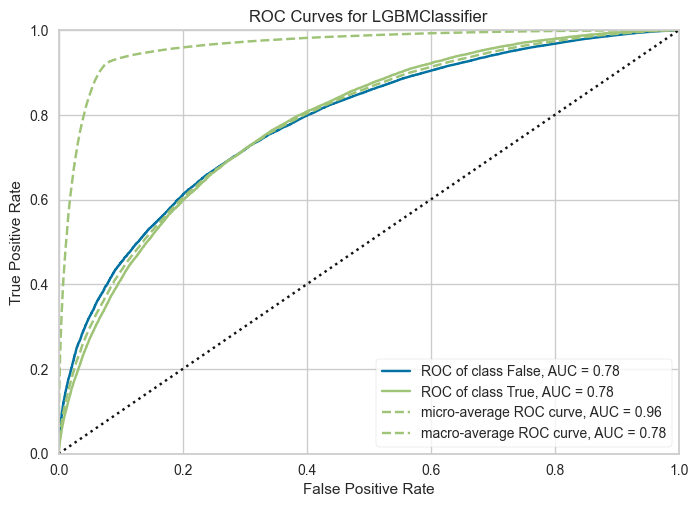

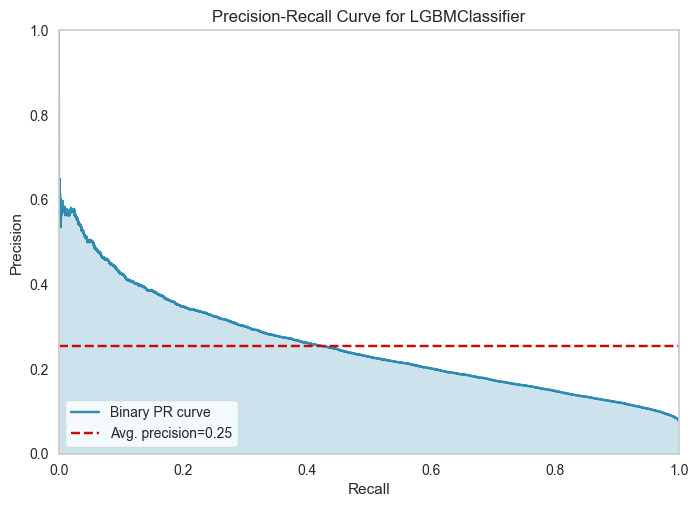

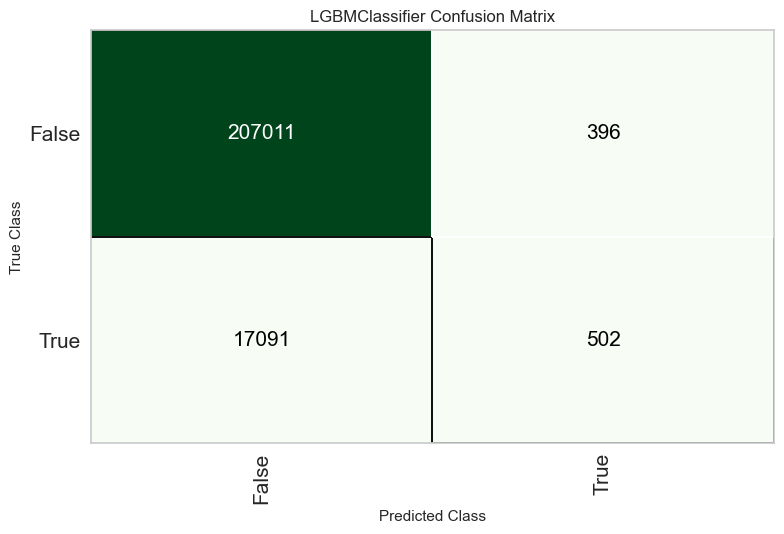

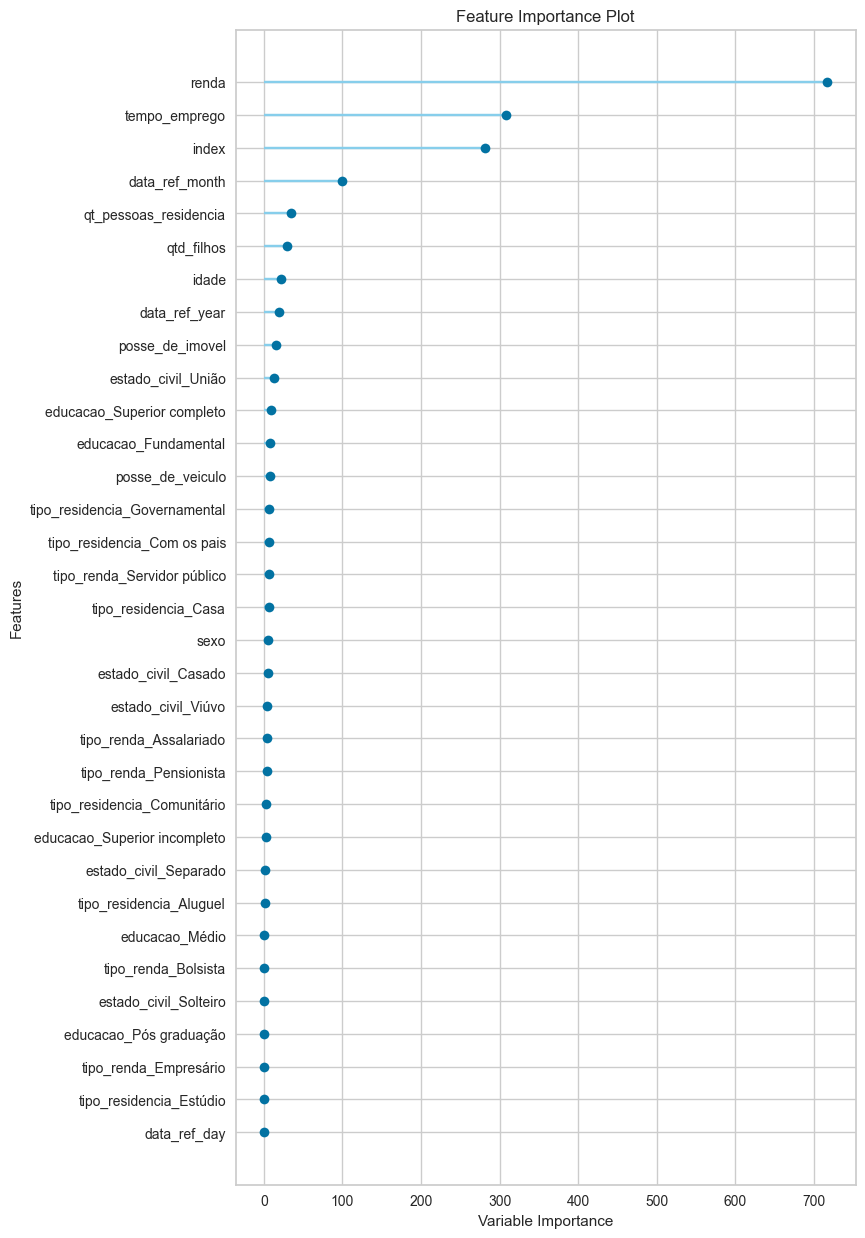

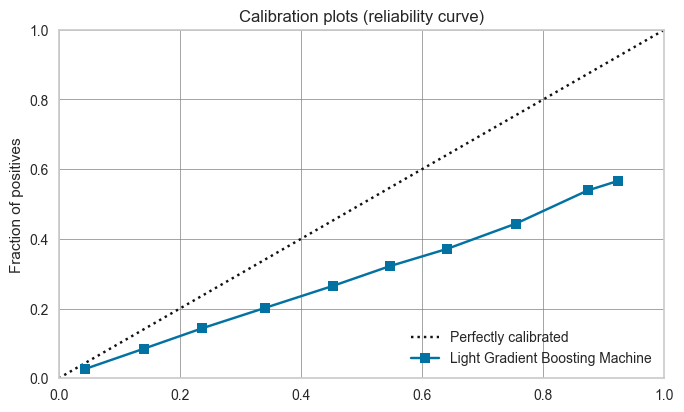


--- 6. Finalizando o Modelo LightGBM (treinando em todos os dados) ---

Modelo LightGBM finalizado:
Pipeline(memory=Memory(location=None),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['data_ref'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['index', 'qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pessoas_residencia', 'renda'],
                                    transformer=Sim...
                                boosting_type='gbdt', class_weight=None,
                                cols

In [1]:
# --- Importar bibliotecas essenciais ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importar PyCaret para classificação
from pycaret.classification import *

# --- Re-carregar e preparar os dados ---
try:
    df = pd.read_feather('C:/Users/igors/OneDrive/Cursos/EBAC/03 - Profissão Cientista de Dados/03 - Cientista de Dados/Module 38 - Regressão Logística II/Exercício 2/credit_scoring.ftr')
    print("Dados carregados com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'credit_scoring.ftr' não foi encontrado. Verifique o caminho.")
    df = None

if df is not None:
    # --- Opcional: Se o dataset for MUITO grande, use uma amostra menor para acelerar ainda mais ---
    # df = df.sample(frac=0.2, random_state=123).reset_index(drop=True) # Exemplo: usar 20% dos dados
    # print(f"\nUsando uma amostra de {len(df)} linhas para execução super rápida.")

    print("\nPrimeiras 5 linhas dos dados:")
    print(df.head())
    print("\nInformações sobre os dados:")
    df.info()
    print("\nValores nulos antes do pré-processamento do PyCaret:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

    # --- 1. Configuração do Ambiente PyCaret (SUPER RÁPIDA) ---
    print("\n--- 1. Configurando o Ambiente PyCaret (Otimizado para Velocidade Extrema) ---")
    s = setup(
        data=df,
        target='mau',
        session_id=123, # Para reprodutibilidade
        normalize=True, # Normalização de dados numéricos (ex: Z-score)
        transformation=True, # Transformação para tornar dados mais Gaussianos (ex: Box-Cox)
        bin_numeric_features=['idade'], # Exemplo: Binarizar a coluna 'idade'
        log_experiment=False, # Desativado para evitar o erro do MLflow e acelerar
        experiment_name='credit_scoring_lgbm',
        n_jobs=-1, # Usar todos os núcleos da CPU para paralelização máxima
        verbose=False, # Reduzir a saída para o console para um pouco mais de velocidade
        # use_gpu=True, # DESCOMENTE SE TIVER GPU NVIDIA E DRIVERS/LIBS CONFIGURADOS
    )
    print("\nConfiguração do PyCaret concluída. O pipeline de pré-processamento foi definido.")

    # --- 2. Comparar Modelos (DESATIVADO PARA VELOCIDADE MÁXIMA) ---
    print("\n--- 2. Comparando Modelos (PULANDO PARA VELOCIDADE MÁXIMA) ---")
    print("Etapa 'compare_models' pulada para execução super rápida.")

    # --- 3. Criar e Treinar o Modelo LightGBM (SUPER RÁPIDO) ---
    print("\n--- 3. Criando e Treinando o Modelo LightGBM (SUPER RÁPIDO) ---")
    lgbm_model = create_model('lightgbm', fold=2)
    print("\nModelo LightGBM treinado com sucesso!")
    print(lgbm_model)

    # --- 4. Otimizar o Modelo (Tune Model - SUPER RÁPIDO) ---
    print("\n--- 4. Otimizando o Modelo LightGBM (SUPER RÁPIDO) ---")
    tuned_lgbm = tune_model(
        lgbm_model,
        fold=2, # Reduzido para 2-fold cross-validation
        optimize='AUC',
        n_iter=5 # APENAS 5 ITERAÇÕES DE OTIMIZAÇÃO (MUITO RÁPIDO, MENOS ROBUSTO)
    )
    print("\nModelo LightGBM otimizado:")
    print(tuned_lgbm)

    # --- 5. Plotar Gráficos de Avaliação (COM CORREÇÕES PARA EXIBIÇÃO) ---
    print("\n--- 5. Gerando Gráficos de Avaliação para LightGBM Otimizado ---")

    # Curva ROC
    # Removendo display_format='inline'
    plot_model(tuned_lgbm, plot='auc', save=False)

    # Curva Precision-Recall
    plot_model(tuned_lgbm, plot='pr', save=False)


    # Matriz de Confusão
    plot_model(tuned_lgbm, plot='confusion_matrix', save=False)


    # Importância das Features (global)
    plot_model(tuned_lgbm, plot='feature_all', save=False)


    # Calibração do Modelo
    plot_model(tuned_lgbm, plot='calibration', save=False)


    # --- 6. Finalizar o Modelo ---
    print("\n--- 6. Finalizando o Modelo LightGBM (treinando em todos os dados) ---")
    final_lgbm = finalize_model(tuned_lgbm)
    print("\nModelo LightGBM finalizado:")
    print(final_lgbm)

    # --- 7. Inspecionar o Pipeline de Transformação ---
    print("\n--- 7. Pipeline Completo de Pré-processamento e Modelo ---")
    print(s.pipeline) # O pipeline de pré-processamento
    print(final_lgbm) # O modelo final

    # --- 8. Salvar o Modelo ---
    print("\n--- 8. Salvando o Modelo e Pipeline Completos ---")
    save_model(final_lgbm, model_name='final_lightgbm_model_pycaret')
    print("Modelo e pipeline salvos como 'final_lightgbm_model_pycaret.pkl'")


# Projeto Final

1. Subir no GITHUB todos os jupyter notebooks/códigos que você desenvolveu nesse ultimo módulo
1. Gerar um arquivo python (.py) com todas as funções necessárias para rodar no streamlit a escoragem do arquivo de treino
    - Criar um .py
    - Criar um carregador de csv no streamlit 
    - Subir um csv no streamlit 
    - Criar um pipeline de pré processamento dos dados
    - Utilizar o modelo treinado para escorar a base 
        - nome_arquivo = 'model_final.pkl'
1. Gravar um vídeo da tela do streamlit em funcionamento (usando o próprio streamlit (temos aula disso) ou qlqr outra forma de gravação).
1. Subir no Github o vídeo de funcionamento da ferramenta como README.md.
1. Subir no Github os códigos desenvolvidos. 
1. Enviar links do github para o tutor corrigir.